****
# **Business Understanding (Pemahaman Bisnis)**
****

**Tujuan : Menjelaskan masalah yang ingin diselesaikan, tujuan dari proyek ini, dan bagaimana solusi yang kita bangun akan digunakan.**

****
## **Context**
****

Sebuah perusahaan asuransi perjalanan perlu mengelola risiko finansialnya secara efektif. Salah satu tantangan terbesar adalah ketidakpastian dalam jumlah klaim yang harus dibayarkan. Klaim yang tidak terduga dalam jumlah besar dapat mengganggu stabilitas keuangan dan perencanaan anggaran perusahaan.

****
## **Pernyataan Masalah (Problem Statement)**
****

Perusahaan asuransi perjalanan menghadapi risiko finansial karena belum mampu memprediksi dengan baik pemegang polis mana yang berpotensi mengajukan klaim. Mayoritas pelanggan tidak mengajukan klaim, sementara persentase kecil yang bisa menyebabkan beban biaya besar.

**Intinya: kita butuh alat prediksi yang membantu perusahaan menyiapkan cadangan biaya dan strategi yang lebih akurat.**

****
## **Tujuan (Goals)**
****

Membangun model prediktif yang andal untuk mengidentifikasi pemegang polis yang kemungkinan mengajukan klaim. Targetnya :

- Mengurangi kerugian finansial dari klaim tak terprediksi
- Membantu alokasi sumber daya (cadangan klaim) secara lebih tepat
- Memberi wawasan pola apa yang membedakan pelanggan “klaim” vs “tidak klaim”

****
## **Pendekatan Analisis (Analytic Approach)**
****

- EDA & Pembersihan Data: cek tipe fitur (numerik/kategorikal/target), nilai kosong, duplikat, nilai tak masuk akal (mis. durasi negatif), dan pencilan.

- Rekayasa Fitur & Pra-proses: encoding variabel kategorikal, scaling fitur numerik (jika perlu), serta resampling karena target sangat tidak seimbang (metode seperti ROS, RUS, SMOTE, NearMiss).

- Pemilihan Fitur (opsional): menggunakan teknik seperti RFE untuk menyaring fitur yang paling informatif.

- Pembangunan Model: uji beberapa algoritma (contoh: Logistic Regression, KNN, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost).

- Evaluasi: gunakan cross-validation dengan beragam metrik (accuracy, precision, recall, F1, ROC-AUC), lalu bandingkan stabilitas skor.

- Interpretasi & Dampak Bisnis: analisis fitur penting, contoh prediksi benar/salah, dan simulasi dampak biaya dengan/atau tanpa model.

****
# **Data Understanding**
****

Proses ini mencakup beberapa langkah fundamental seperti memuat data, melihat struktur dan informasi dasarnya, memeriksa kualitas data (apakah ada nilai yang hilang atau data duplikat), serta melihat ringkasan statistik dari setiap kolom.

Tujuan dari bab ini adalah untuk mendapatkan gambaran umum yang faktual mengenai dataset sebelum kita melangkah ke tahap analisis eksplorasi yang lebih mendalam di bab berikutnya.

****
## **Import Library**
****

In [63]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

****
## **Load Dataset**
****

In [64]:
# Membaca file .csv dan menyimpannya dalam variabel 'df'
df = pd.read_csv('data_travel_insurance.csv')
df

Agency    Agency Type Distribution Channel  \
0        C2B       Airlines               Online   
1        EPX  Travel Agency               Online   
2        JZI       Airlines               Online   
3        EPX  Travel Agency               Online   
4        C2B       Airlines               Online   
...      ...            ...                  ...   
44323    EPX  Travel Agency               Online   
44324    CWT  Travel Agency               Online   
44325    TST  Travel Agency              Offline   
44326    EPX  Travel Agency               Online   
44327    CWT  Travel Agency               Online   

                          Product Name Gender  Duration    Destination  \
0                   Annual Silver Plan      F       365      SINGAPORE   
1                    Cancellation Plan    NaN         4       MALAYSIA   
2                           Basic Plan      M        19          INDIA   
3             2 way Comprehensive Plan    NaN        20  UNITED STATES   
4                          Bronze Plan      M         8      SINGAPORE   
...                                ...    ...       ...            ...   
44323         2 way Comprehensive Plan    NaN        14          CHINA   
44324  Rental Vehicle Excess Insurance    NaN        17      AUSTRALIA   
44325            Travel Cruise Protect      M        64       THAILAND   
44326         2 way Comprehensive Plan    NaN        51          CHINA   
44327  Rental Vehicle Excess Insurance    NaN       172      SINGAPORE   

       Net Sales  Commision (in value)  Age Claim  
0          216.0                 54.00   57    No  
1           10.0                  0.00   33    No  
2           22.0                  7.70   26    No  
3          112.0                  0.00   59    No  
4           16.0                  4.00   28    No  
...          ...                   ...  ...   ...  
44323       30.0                  0.00   36   Yes  
44324       79.2                 47.52   47    No  
44325       30.0                 10.50   50    No  
44326       36.0                  0.00   36    No  
44327        0.0                 17.82   31    No  

[44328 rows x 11 columns]

****
## **Numerical, Categorical, and Target Features**
****

| No | Numerical Features Name    | Description                                                      |
|----|----------------------------|------------------------------------------------------------------|
| 1  | Age                        | Age of insured                                                   |
| 2  | Commission (in value)      | Commission received for travel insurance agency                  |
| 3  | Net Sales                  | Amount of sales of travel insurance policies                     |
| 4  | Duration                   | Duration of travel                                               |

<br>
<br>

| No | Categorical Features Name  | Description                                                      |
|----|----------------------------|------------------------------------------------------------------|
| 1  | Agency                     | Name of agency                                                   |
| 2  | Agency Type                | Type of travel insurance agencies                                |
| 3  | Distribution Channel       | Channel of travel insurance agencies                             |
| 4  | Product Name               | Name of the travel insurance products                            |
| 5  | Gender                     | Gender of insured                                                |
| 6  | Destination                | Destination of travel                                            | 

<br>
<br>

| Target Feature Name             | Description                                                      |
|---------------------------------|------------------------------------------------------------------|
| Claim                           | Claim status (Yes/No)                                            |

****
## **Data Summary**
****

In [65]:
# dataframe information
print(f'Total Rows           :', df.shape[0])
print(f'Total Columns        :', df.shape[1])

print('-----------------------------\nData Types Count     :')
print(df.dtypes.value_counts())

def format_percentage(value):
    return f"{value:.2f}%"

pd.DataFrame({
    'Features': df.columns.values,
    'Data Type': df.dtypes.values,
    'Data Count': df.count().values,
    'Negative Value Count': [(df[col] < 0).sum() if df[col].dtype in [int, float] else 0 for col in df.columns],
    'Negative Value Percentage': [format_percentage((df[col] < 0).sum() / len(df) * 100) if df[col].dtype in [int, float] else '0.00%' for col in df.columns],
    'Null Value Count': df.isnull().sum().values,
    'Null Value Percentage': [format_percentage(val / len(df) * 100) for val in df.isnull().sum().values],
    'Number of Unique Value': df.nunique().values,
    'Unique Value': [df[col].unique() for col in df.columns]
})

Total Rows           : 44328
Total Columns        : 11
-----------------------------
Data Types Count     :
object     7
int64      2
float64    2
Name: count, dtype: int64


Features Data Type  Data Count  Negative Value Count  \
0                 Agency    object       44328                     0   
1            Agency Type    object       44328                     0   
2   Distribution Channel    object       44328                     0   
3           Product Name    object       44328                     0   
4                 Gender    object       12681                     0   
5               Duration     int64       44328                     2   
6            Destination    object       44328                     0   
7              Net Sales   float64       44328                   483   
8   Commision (in value)   float64       44328                     0   
9                    Age     int64       44328                     0   
10                 Claim    object       44328                     0   

   Negative Value Percentage  Null Value Count Null Value Percentage  \
0                      0.00%                 0                 0.00%   
1                      0.00%                 0                 0.00%   
2                      0.00%                 0                 0.00%   
3                      0.00%                 0                 0.00%   
4                      0.00%             31647                71.39%   
5                      0.00%                 0                 0.00%   
6                      0.00%                 0                 0.00%   
7                      1.09%                 0                 0.00%   
8                      0.00%                 0                 0.00%   
9                      0.00%                 0                 0.00%   
10                     0.00%                 0                 0.00%   

    Number of Unique Value                                       Unique Value  
0                       16  [C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ...  
1                        2                          [Airlines, Travel Agency]  
2                        2                                  [Online, Offline]  
3                       26  [Annual Silver Plan, Cancellation Plan, Basic ...  
4                        2                                        [F, nan, M]  
5                      437  [365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37...  
6                      138  [SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO...  
7                     1006  [216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8...  
8                      915  [54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,...  
9                       89  [57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5...  
10                       2                                          [No, Yes]

****
## **Statistical Description for Numerical and Categorical Features**
****

Tujuan:
Mengetahui gambaran statistik dasar dari setiap fitur numerik dan kategorikal. Ini membantu kita memahami distribusi data, mendeteksi nilai yang mencurigakan, serta mengetahui sebaran kategori.

In [66]:
# Statistik deskriptif untuk fitur numerik
df.describe().T

count       mean         std    min   25%   50%  \
Duration              44328.0  49.424292  109.153961   -1.0   9.0  22.0   
Net Sales             44328.0  40.550948   48.661970 -357.5  18.0  26.5   
Commision (in value)  44328.0   9.707692   19.625637    0.0   0.0   0.0   
Age                   44328.0  39.925600   13.954926    0.0  35.0  36.0   

                        75%     max  
Duration              53.00  4881.0  
Net Sales             48.00   810.0  
Commision (in value)  11.55   283.5  
Age                   43.00   118.0

Keterangan output :

- count → jumlah data valid (tidak termasuk missing value).
- mean → nilai rata-rata.
- std → standar deviasi, mengukur penyebaran data.
- min → nilai terkecil.
- 25%, 50%, 75% → kuartil distribusi data.
- max → nilai terbesar.

In [67]:
# Statistik deskriptif untuk fitur kategorikal
df.describe(include='object')

Agency    Agency Type Distribution Channel       Product Name Gender  \
count   44328          44328                44328              44328  12681   
unique     16              2                    2                 26      2   
top       EPX  Travel Agency               Online  Cancellation Plan      M   
freq    24656          32113                43572              12979   6504   

       Destination  Claim  
count        44328  44328  
unique         138      2  
top      SINGAPORE     No  
freq          9267  43651

Keterangan output :

- count → jumlah data valid.
- unique → jumlah kategori unik.
- top → kategori yang paling sering muncul.
- freq → frekuensi kemunculan kategori tersebut.

****
## **Missing Values**
****

In [68]:
# Mengecek jumlah missing value di setiap kolom
missing_values = df.isna().sum()
print(f"{missing_values}\n")

# Menampilkan berapa persentase missing value di setiap kolom
miss = df.Gender.isna().sum()
percentage = df.Gender.isna().sum()/len(df)*100

print(f'Total Null Values     : {miss}\nNull Values Percentage: {percentage:.2f}%')

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

Total Null Values     : 31647
Null Values Percentage: 71.39%


****
## **Data Duplicates**
****

In [69]:
# checking duplicate data
duplicated = df.duplicated().sum()
print(f"{duplicated}\n")

# Menampilkan berapa persentase duplicate data
dup = df.duplicated().sum()
percentage = df.duplicated().sum()/len(df)*100

print(f'Total Data Duplicates     : {dup}\nData Duplicates Percentage: {percentage:.2f}%')

4667

Total Data Duplicates     : 4667
Data Duplicates Percentage: 10.53%


****
## **Identify Invalid Data**
****

In [70]:
# Contoh pemeriksaan nilai tidak wajar pada fitur numerik
invalid_age = df[(df['Age'] <= 0) | (df['Age'] > 100)]
invalid_duration = df[df['Duration'] <= 0]
invalid_sales = df[df['Net Sales'] < 0]
invalid_commission = df[df['Commision (in value)'] < 0]

print("Usia tidak valid:\n", invalid_age)
print("\nDurasi perjalanan tidak valid:\n", invalid_duration)
print("\nNet Sales negatif:\n", invalid_sales)
print("\nCommission negatif:\n", invalid_commission)

Usia tidak valid:
       Agency    Agency Type Distribution Channel           Product Name  \
99       ART       Airlines               Online             Value Plan   
105      JZI       Airlines              Offline             Basic Plan   
363      JWT       Airlines               Online             Value Plan   
373      JWT       Airlines               Online             Value Plan   
727      JWT       Airlines               Online             Value Plan   
...      ...            ...                  ...                    ...   
44140    JWT       Airlines               Online             Value Plan   
44150    JWT       Airlines               Online             Value Plan   
44160    JWT       Airlines               Online             Value Plan   
44219    JWT       Airlines               Online             Value Plan   
44319    TST  Travel Agency              Offline  Travel Cruise Protect   

      Gender  Duration Destination  Net Sales  Commision (in value)  Age Claim  

In [71]:
# Melihat kategori unik pada kolom kategorikal untuk mendeteksi anomali
for col in ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']:
    print(f"\nKolom: {col}")
    print(df[col].unique())


Kolom: Agency
['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'SSI' 'RAB' 'KML' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Kolom: Agency Type
['Airlines' 'Travel Agency']

Kolom: Distribution Channel
['Online' 'Offline']

Kolom: Product Name
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan' 'Premier Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan'
 'Travel Cruise Protect Family']

Kolom: Gender
['F' nan 'M']

Kolom: Destination
['SINGAPORE' 'MALAYSIA' 'INDIA' 'UNITED STATES' 'KOREA, REPUBLIC OF'
 

***
**Rangkuman**
***

- Dataset ini memiliki :
    - 4 fitur numerik: `Age`, `Commision (in value)`, `Net Sales`, dan `Duration`
    - 6 fitur kategorikal: `Agency`, `Agency Type`, `Distribution Channel`, `Product Name`, `Gender`, dan `Destination`
    - `Claim` sebagai variabel target

- Dataset berisi 11 kolom dan 44.328 baris.

- **Fitur Numerik :**
  - Ditemukan nilai yang mencurigakan:
    - `Duration` memiliki nilai negatif dan nilai maksimum 4.881 hari, keduanya tidak realistis.
    - `Net Sales` mengandung nilai negatif dan `Commision (in value)` berisi nilai nol, keduanya perlu analisis lebih lanjut.
    - `Age` memiliki nilai maksimum 118 tahun, yang jarang terjadi untuk usia manusia.

- **Fitur Kategorikal :**
  - Nilai dominan :
    - `Agency`: EPX
    - `Agency Type`: Travel Agency
    - `Distribution Channel`: Online
    - `Product Name`: Cancellation Plan
    - `Gender`: Male (M)
    - `Destination`: Singapore
    - `Claim`: No Claim

- **Missing Values**:
  - Fitur `Gender` memiliki persentase missing value yang tinggi, yaitu 71,39% (31.647 baris).

- **Data Duplicates**:
  - 10,53% (4.667 baris) data terdeteksi sebagai duplikat.

- **Invalid Data**:
  - `Duration` mengandung nilai -1 yang tidak masuk akal untuk durasi perjalanan.

****
## **Numerical Features Analysis**
****

> ### **Distribusi Data**

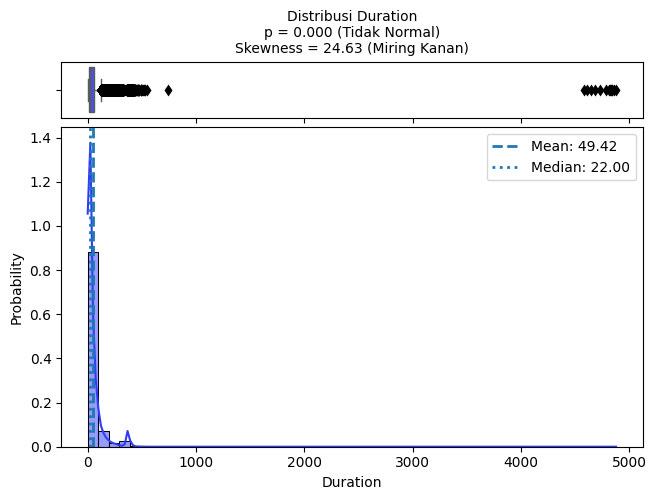

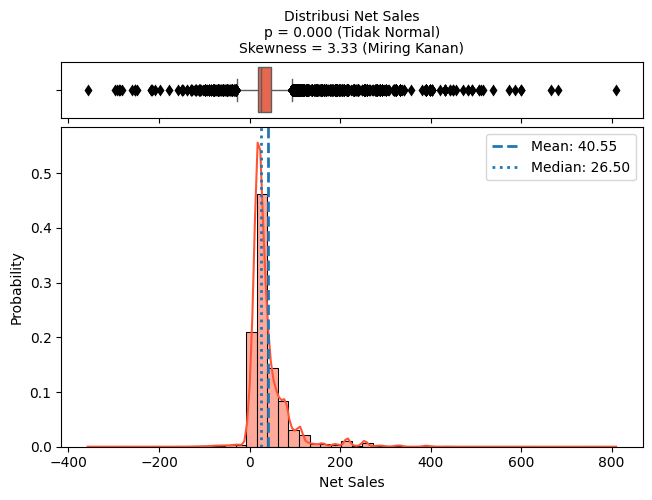

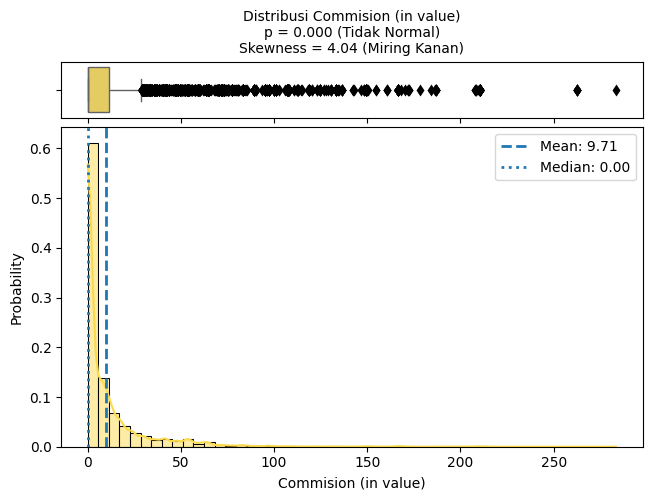

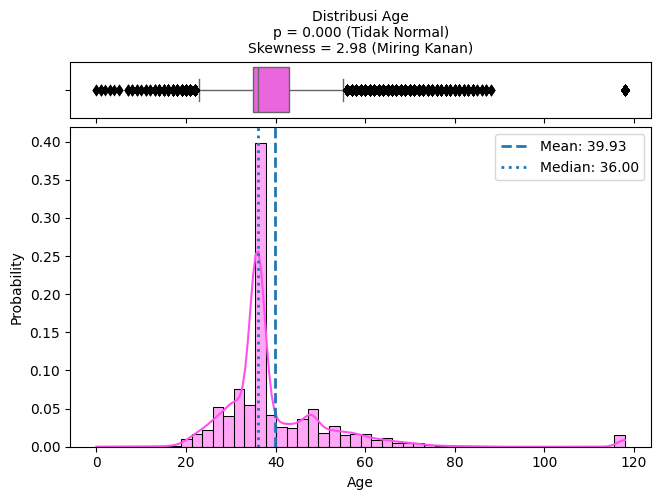

In [72]:
from scipy.stats import normaltest, skew
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Tentukan kolom numerik (pakai describe agar hanya numerik yang masuk)
num_cols = df.describe().columns.tolist()

# 2) Peta warna per fitur 
palette_num = {
    'Duration': "#313BFA",
    'Net Sales': "#FF5537",
    'Commision (in value)': "#FADA4C",   
    'Age': "#FF50EE"
}

for col in num_cols:
    # Siapkan kanvas: 2 baris (atas boxplot, bawah histogram)
    fig, (ax_top, ax_bottom) = plt.subplots(
        2, 1, sharex=True, figsize=(7.5, 5),
        gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05}
    )

    x = df[col].dropna()

    # 3) Hitung p-value normalitas & skewness (normaltest butuh n>=8)
    if len(x) >= 8:
        k2_stat, p_value = normaltest(x)
    else:
        k2_stat, p_value = np.nan, np.nan  # data terlalu sedikit

    skw = skew(x) if len(x) > 0 else np.nan
    skew_type = ("Miring Kanan" if skw > 0 else ("Miring Kiri" if skw < 0 else "Simetris"))

    # 4) Atur teks ringkas untuk judul + pilih warna
    hist_color = palette_num.get(col, "#85C1E9")
    box_color = "white"

    if np.isnan(p_value):
        info_txt = f"p = N/A (n < 8)\nSkewness = {skw:.2f}" if not np.isnan(skw) else "p = N/A (n < 8)\nSkewness = N/A"
    elif p_value > 0.05:
        info_txt = f"p = {p_value:.3f} (≈ Normal)\nSkewness = {skw:.2f}"
    else:
        info_txt = f"p = {p_value:.3f} (Tidak Normal)\nSkewness = {skw:.2f} ({skew_type})"
        box_color = hist_color  # tonjolkan boxplot saat tidak normal

    # 5) BOXPLOT (atas)
    ax_top.set_title(f"Distribusi {col}\n{info_txt}", fontsize=10, color="black")
    sns.boxplot(
        x=x, ax=ax_top, color=box_color,
        flierprops=dict(marker='d', markersize=6, markeredgecolor='None', markerfacecolor='black')
    )
    ax_top.set(xlabel="")

    # 6) HISTOGRAM + KDE (bawah) + garis mean/median agar mudah melihat kemiringan
    sns.histplot(x, ax=ax_bottom, stat="probability", kde=True, bins=50, color=hist_color)
    if len(x) > 0:
        mean_v, med_v = x.mean(), x.median()
        ax_bottom.axvline(mean_v, linestyle='--', linewidth=2, label=f"Mean: {mean_v:.2f}")
        ax_bottom.axvline(med_v, linestyle=':', linewidth=2, label=f"Median: {med_v:.2f}")
        ax_bottom.legend()

    plt.show()


***
**Rangkuman**
***
| Fitur                     | Skewness                        | p-value Normalitas | Bentuk Distribusi              | Catatan Penting                                                    |
| ------------------------- | ------------------------------- | ------------------ | ------------------------------ | ------------------------------------------------------------------ |
| **Age**                   | +2.98 *(slightly right-skewed)* | < 0.05             | Tidak normal, condong ke kanan | Mayoritas usia 25–45 tahun, max 118 tahun (outlier)                |
| **Commission (in value)** | +4.04 *(right-skewed)*          | < 0.05             | Tidak normal, condong ke kanan | Banyak nilai 0, outlier komisi sangat tinggi                       |
| **Net Sales**             | +3.33 *(high right-skew)*       | < 0.05             | Tidak normal, condong ke kanan | Banyak nilai rendah, ada nilai negatif, outlier sangat besar       |
| **Duration**              | +24.63 *(extreme right-skew)*    | < 0.05             | Tidak normal, condong ke kanan | Banyak durasi < 50 hari, ada -1 & max 4.881 hari (tidak realistis) |

> ### **Identify Outliers**

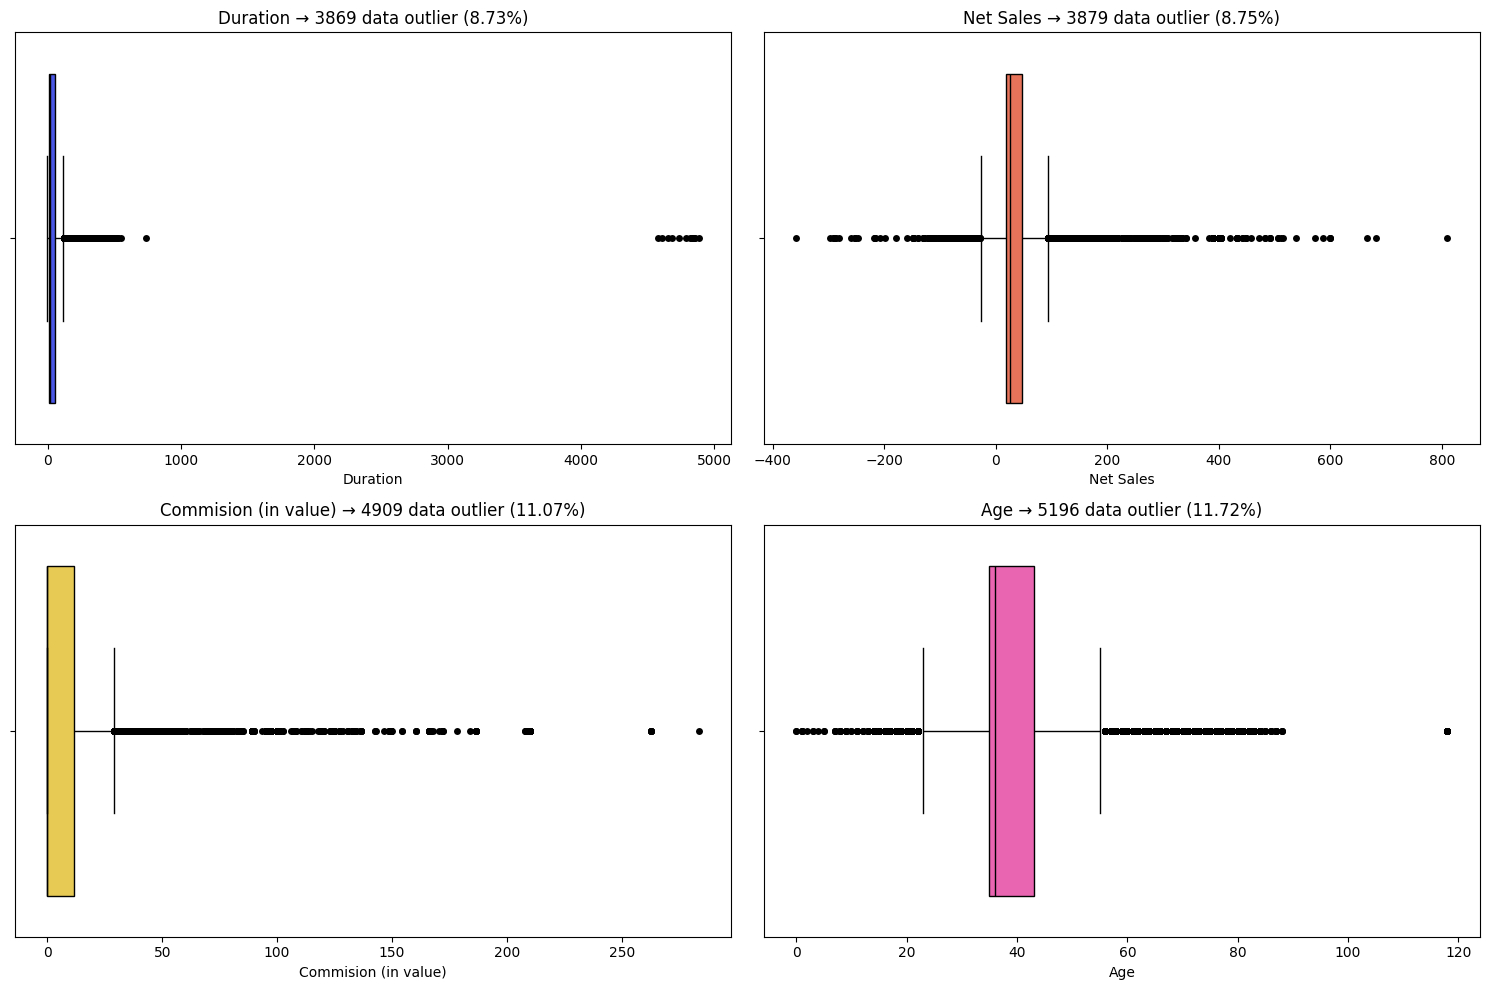

In [73]:
# Fungsi untuk menghitung jumlah & persentase outlier menggunakan metode IQR
def hitung_outlier(seri):
    q1 = seri.quantile(0.25)
    q3 = seri.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    data_outlier = seri[(seri < batas_bawah) | (seri > batas_atas)]
    jumlah_outlier = len(data_outlier)
    persentase_outlier = (jumlah_outlier / len(seri)) * 100
    return jumlah_outlier, persentase_outlier

# Warna untuk setiap fitur numerik
warna_box = ['#3142FF', '#FF6542', '#FFD93B', '#FF4FB6']

# Siapkan figure untuk 4 fitur numerik dalam 2 baris × 2 kolom
fig, sumbu = plt.subplots(2, 2, figsize=(15, 10))
sumbu = sumbu.flatten()

# Loop setiap fitur numerik dari df.describe()
for idx, kolom in enumerate(df.describe().columns):
    jml_out, pct_out = hitung_outlier(df[kolom])
    sns.boxplot(
        x=df[kolom],
        color=warna_box[idx],
        ax=sumbu[idx],
        orient='h',
        linecolor='black',
        flierprops=dict(marker='o', markersize=5, markerfacecolor='black', markeredgecolor='none')
    )
    sumbu[idx].set_title(
        f"{kolom} → {jml_out} data outlier ({pct_out:.2f}%)",
        fontsize=12
    )

plt.tight_layout()
plt.show()

***
**Rangkuman**
***
| Fitur                     | Jumlah Outlier    | Persentase (%)    | Catatan Penting                                                                                         |
| ------------------------- | ----------------- | ----------------- | ------------------------------------------------------------------------------------------------------- |
| **Age**                   | *5196* | *11.72%* | Outlier berada di usia yang sangat tinggi (di atas 80–100 tahun) yang jarang terjadi untuk tertanggung. |
| **Commission (in value)** | *4909* | *11.07%* | Banyak nilai 0 dan beberapa komisi yang sangat tinggi → potensi pencilan signifikan.                    |
| **Net Sales**             | *3879* | *8.75%* | Distribusi sangat miring ke kanan; terdapat nilai negatif dan penjualan yang sangat besar.              |
| **Duration**              | *3869* | *8.73%* | Banyak perjalanan dengan durasi singkat, tetapi ada nilai -1 (tidak valid) dan durasi ribuan hari.      |


****
## **Target Data Proportion**
****

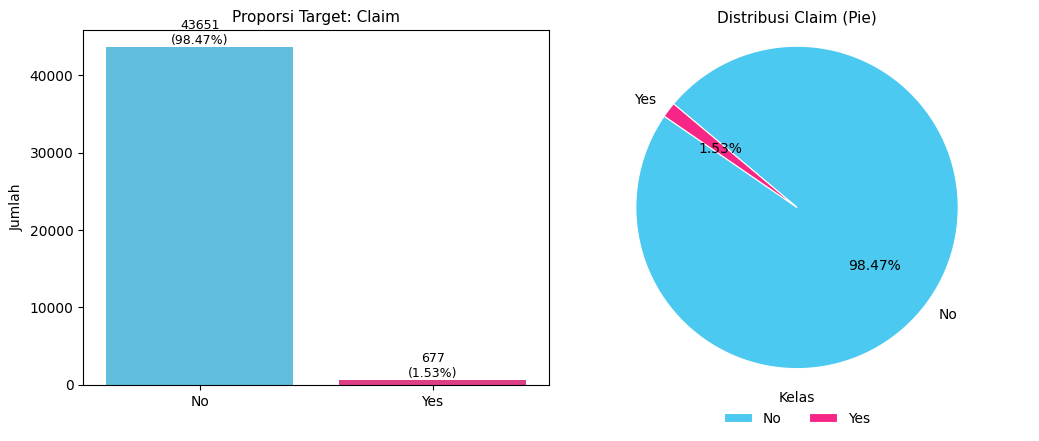

In [74]:
# --- Siapkan data target (rapikan spasi/tipe dulu) ---
target = df['Claim'].astype(str).str.strip()
urutan = target.value_counts().index.tolist()          # urut dari yang terbanyak

# Hitung ringkasannya
hitung = target.value_counts().reindex(urutan)
persen = (hitung / hitung.sum() * 100).round(2)

# Palet warna baru agar tidak sama persis
warna = ['#4CC9F0', '#F72585']   

# --- Buat kanvas side-by-side ---
fig, (ax_bar, ax_pie) = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4.5))

# ===== Panel 1: Countplot dengan label jumlah & persen =====
sns.countplot(x=target, order=urutan, palette=warna,hue=target , ax=ax_bar)
ax_bar.set_title('Proporsi Target: Claim', fontsize=11)
ax_bar.set_xlabel('')
ax_bar.set_ylabel('Jumlah')

# Tambahkan label di atas tiap bar (jumlah dan persentase)
for patch, pr in zip(ax_bar.patches, persen):
    tinggi = patch.get_height()
    ax_bar.annotate(
        f'{int(tinggi)}\n({pr:.2f}%)',
        (patch.get_x() + patch.get_width() / 2, tinggi),
        ha='center', va='bottom', fontsize=9
    )

# ===== Panel 2: Pie chart =====
ax_pie.pie(
    hitung.values,
    labels=urutan,
    colors=warna,
    autopct='%1.2f%%',
    startangle=140,
    counterclock=False,
    wedgeprops=dict(linewidth=0.8, edgecolor='white')
)
ax_pie.set_title('Distribusi Claim (Pie)', fontsize=11)
ax_pie.axis('equal')  # agar pie menjadi bulat

# Legend opsional (di bawah pie)
ax_pie.legend(title='Kelas', loc='lower center', bbox_to_anchor=(0.5, -0.15),
              ncol=len(urutan), frameon=False)

plt.tight_layout()
plt.show()


| Kelas        | Jumlah Data       | Persentase (%)    | Catatan                                                                            |
| ------------ | ----------------- | ----------------- | ---------------------------------------------------------------------------------- |
| **No Claim** | *43651* | *98.47%* | Kelas mayoritas, menunjukkan sebagian besar pemegang polis tidak mengajukan klaim. |
| **Claim**    | *677* | *1.53%* | Kelas minoritas, hanya sebagian kecil pemegang polis yang mengajukan klaim.        |

***
**Rangkuman**
***
- Distribusi kelas tidak seimbang, dengan kelas No Claim jauh lebih besar dibanding Claim.
- Perlu penanganan ketidakseimbangan saat membangun model agar performa pada kelas minoritas tetap baik.

****
# **Data Preparation**
****

****
## **Data Cleaning**
****

> ### **Handling Missing Values**

In [75]:
# Jangan pakai nama variabel 'sum' agar tidak menimpa fungsi bawaan
jml_kosong_gender = df['Gender'].isna().sum()
persen_kosong_gender = (jml_kosong_gender / len(df)) * 100
print(f"Gender - Missing: {jml_kosong_gender} baris ({persen_kosong_gender:.2f}%)")

Gender - Missing: 31647 baris (71.39%)


In [76]:
# Isi nilai Gender yang kosong
df['Gender'].fillna('Prefer Not to Say', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3472\1723990708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Prefer Not to Say', inplace=True)


In [77]:
# Cek apakah masih ada missing value
df.isna().sum()

# Hitung berapa baris yang kini berisi label imputasi
n_pnts = (df['Gender'] == 'Prefer Not to Say').sum()
print("Jumlah 'Prefer Not to Say' pada Gender:", n_pnts)


Jumlah 'Prefer Not to Say' pada Gender: 31647


***
**Rangkuman**
***
Karena proporsi missing pada Gender sangat besar, menghapus baris akan membuang terlalu banyak data; maka dipilih imputasi kategori khusus `Prefer Not to Say`

> ### **Handling Data Duplicates**

In [78]:
print(f"Dimensi sebelum penanganan duplikat: {df.shape[0]} baris, {df.shape[1]} kolom")

dup_count = df.duplicated(keep='first').sum()
dup_pct = (dup_count / len(df)) * 100
print(f"Jumlah duplikat: {dup_count} baris ({dup_pct:.2f}%)")

Dimensi sebelum penanganan duplikat: 44328 baris, 11 kolom
Jumlah duplikat: 4667 baris (10.53%)


In [79]:
# Hapus duplikat, simpan baris pertama
df.drop_duplicates(keep='first', inplace=True)

# Reset index dengan cara yang lebih ringkas
df.reset_index(drop=True, inplace=True)

print(f"Dimensi setelah hapus duplikat: {df.shape[0]} baris, {df.shape[1]} kolom")
print("Sisa duplikat:", df.duplicated(keep='first').sum())

Dimensi setelah hapus duplikat: 39661 baris, 11 kolom
Sisa duplikat: 0


***
**Rangkuman**
***
Setelah menghapus ~4.667 baris duplikat (±10.53%), data menjadi ±39.661 baris

> ### **Handling Invalid Data**

In [80]:
neg_duration = df[df['Duration'] < 0]
print("Jumlah Duration negatif:", neg_duration.shape[0])
neg_duration.head()

Jumlah Duration negatif: 2


Agency Agency Type Distribution Channel Product Name             Gender  \
24153    JZI    Airlines               Online   Basic Plan  Prefer Not to Say   
24388    JZI    Airlines               Online   Basic Plan  Prefer Not to Say   

       Duration        Destination  Net Sales  Commision (in value)  Age Claim  
24153        -1           MALAYSIA       18.0                   6.3  118    No  
24388        -1  BRUNEI DARUSSALAM       18.0                   6.3  118    No

In [81]:
# Ganti nilai -1 menjadi 1 (durasi tak mungkin negatif)
df['Duration'] = df['Duration'].replace(-1, 1)

# Verifikasi tidak ada lagi nilai negatif
print("Duration negatif setelah perbaikan:", (df['Duration'] < 0).sum())

Duration negatif setelah perbaikan: 0


In [82]:
# Deskripsi statistik untuk melihat nilai ekstrim sebagai pengantar
df.describe().T

count       mean         std    min   25%   50%  \
Duration              39661.0  52.397922  113.542778    0.0  11.0  25.0   
Net Sales             39661.0  42.342794   50.025244 -357.5  19.0  29.0   
Commision (in value)  39661.0  10.442622   20.355921    0.0   0.0   0.0   
Age                   39661.0  39.930284   13.526346    0.0  34.0  36.0   

                        75%     max  
Duration              57.00  4881.0  
Net Sales             50.00   810.0  
Commision (in value)  11.88   283.5  
Age                   45.00   118.0

Selanjutnya, kita akan menangani outlier dalam dataset, yaitu nilai-nilai yang berada jauh di luar rentang normal. Berdasarkan analisis fitur numerik pada ringkasan statistik sebelumnya, terutama pada kolom `Duration` dan `Age`, ditemukan beberapa nilai yang tampak tidak masuk akal atau sangat jarang, seperti durasi maksimum mencapai 4.881 hari dan usia maksimum 118 tahun. Nilai-nilai ekstrem ini perlu ditinjau lebih lanjut untuk menentukan cara penanganan yang paling tepat. Selain itu, kita juga akan mengevaluasi dan menangani pencilan pada dua fitur lainnya, yaitu `Net Sales` dan `Comision (in value)`

****
### **Duration**
****

In [83]:
max_durasi_wajar = 540

- Kita tetapkan batas durasi perjalanan maksimal 540 hari (18 Bulan).
- Alasannya: mayoritas asuransi perjalanan dibuat untuk perjalanan singkat, sangat jarang ada yang lebih dari 1 tahun lebih 6 bulan.

In [84]:
jumlah_durasi_ekstrem = (df['Duration'] > max_durasi_wajar).sum()
persentase_durasi_ekstrem = jumlah_durasi_ekstrem / len(df) * 100

- Kita cek berapa banyak data yang melampaui batas tersebut.
- Kita hitung juga persentasenya terhadap seluruh dataset.

In [85]:
print(f"Jumlah durasi ekstrem (> {max_durasi_wajar} hari): {jumlah_durasi_ekstrem} baris")
print(f"Persentase durasi ekstrem: {persentase_durasi_ekstrem:.2f}% dari total data")

Jumlah durasi ekstrem (> 540 hari): 15 baris
Persentase durasi ekstrem: 0.04% dari total data


- Output ini membantu kita menilai tingkat masalah.
- Misal: jika cuma 0.5%, maka aman dihapus tanpa memengaruhi distribusi data secara signifikan.

In [86]:
df = df[df['Duration'] <= max_durasi_wajar].reset_index(drop=True)

- Semua baris dengan durasi perjalanan lebih dari 540 hari dihapus.
- reset_index(drop=True) membuat indeks kembali dari 0 supaya rapi.

***
**Kesimpulan**
***

- Tujuan : Menghapus nilai yang tidak masuk akal atau terlalu jarang (outlier ekstrem) pada kolom Duration.

- Manfaat :

    - Menghindari hasil analisis yang bias akibat data ekstrem.
    - Model machine learning nantinya akan lebih stabil karena tidak dipengaruhi data yang aneh.

- Hasil akhir : Dataset lebih bersih, semua durasi berada dalam rentang wajar.

****
### **Age**
****

In [87]:
max_usia_wajar = 100

- Kita tetapkan batas maksimal usia tertanggung 100 tahun.
- Alasannya: usia >100 tahun sangat jarang dan biasanya tidak relevan untuk polis asuransi perjalanan.

In [88]:
jumlah_usia_ekstrem = (df['Age'] > max_usia_wajar).sum()
persentase_usia_ekstrem = jumlah_usia_ekstrem / len(df) * 100

- Menghitung berapa baris data yang usianya melebihi 100 tahun.
- Menghitung persentasenya agar tahu seberapa banyak data yang terdampak.

In [89]:
print(f"Jumlah usia ekstrem (> {max_usia_wajar} tahun): {jumlah_usia_ekstrem} baris")
print(f"Persentase usia ekstrem: {persentase_usia_ekstrem:.2f}% dari total data")

Jumlah usia ekstrem (> 100 tahun): 479 baris
Persentase usia ekstrem: 1.21% dari total data


- Jika persentase kecil (misalnya <1%), data ekstrem aman untuk dihapus.

In [90]:
df = df[df['Age'] <= max_usia_wajar].reset_index(drop=True)

- Menghapus baris dengan usia >100 tahun.
- Reset index supaya rapi.

***
**Kesimpulan**
***

- Tujuan: Menghapus nilai usia yang tidak realistis atau sangat jarang ditemukan.

- Manfaat :

    - Mengurangi noise pada data.
    - Membuat distribusi data lebih wajar untuk pemodelan.

- Hasil akhir : Semua baris dalam kolom Age berada di rentang 0–100 tahun.

****
### **Net Sales and Commision**
****

In [91]:
# Kolom yang akan dianalisis outliernya
kolom_outlier = ['Net Sales', 'Commision (in value)']

- Kita pakai list karena mau melakukan proses yang sama di dua kolom sekaligus.

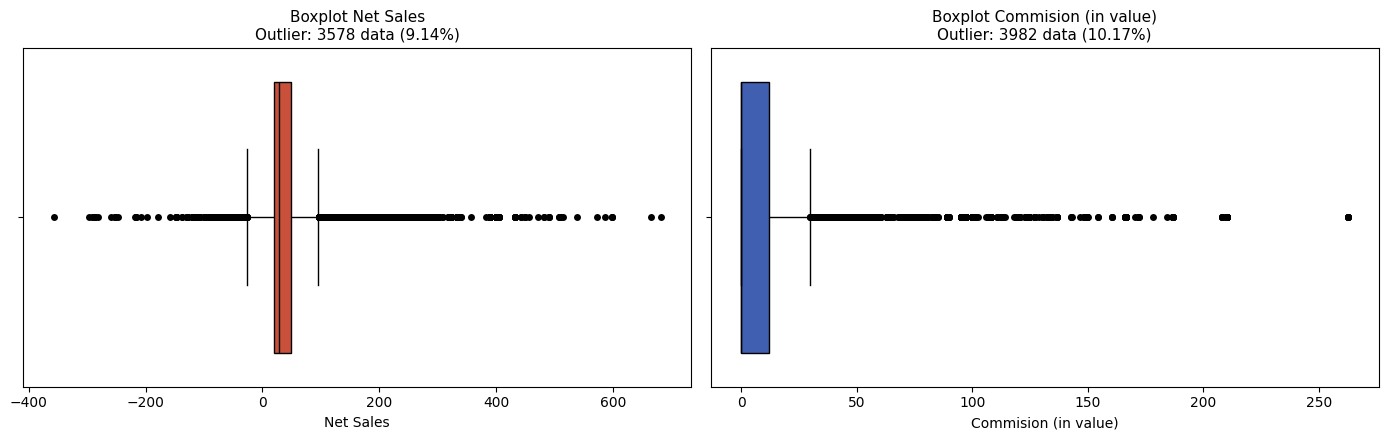

In [92]:
warna = ["#E14024", "#2E56C4"]   # kuning-oranye & teal
kolom_target = ['Net Sales', 'Commision (in value)']  # biarkan ejaan sesuai kolom di dataset

# Kanvas 1 baris 2 kolom
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.5))

for j, kol in enumerate(kolom_target):
    jml_out, pct_out = hitung_outlier(df[kol])

    sns.boxplot(
        x=df[kol].dropna(),
        ax=axs[j],
        color=warna[j % len(warna)],
        orient='h',
        linecolor='black',
        flierprops=dict(marker='o', markersize=5, markeredgecolor='none', markerfacecolor='black')
    )

    # Judul & label dalam Bahasa Indonesia
    axs[j].set_title(f"Boxplot {kol}\nOutlier: {jml_out} data ({pct_out:.2f}%)", fontsize=11)
    axs[j].set_xlabel(kol)

plt.tight_layout()
plt.show()

Hasil boxplot menunjukkan banyak outlier pada net sales dan commission (>5%). Data ini tetap dipertahankan agar dapat dianalisis penyebab dan hubungannya, termasuk kemungkinan nilai net sales negatif.

> ### **Convert Target Data to Binary Format**

In [93]:
display(df.head(), df.tail())

Agency    Agency Type Distribution Channel              Product Name  \
0    C2B       Airlines               Online        Annual Silver Plan   
1    EPX  Travel Agency               Online         Cancellation Plan   
2    JZI       Airlines               Online                Basic Plan   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan   
4    C2B       Airlines               Online               Bronze Plan   

              Gender  Duration    Destination  Net Sales  \
0                  F       365      SINGAPORE      216.0   
1  Prefer Not to Say         4       MALAYSIA       10.0   
2                  M        19          INDIA       22.0   
3  Prefer Not to Say        20  UNITED STATES      112.0   
4                  M         8      SINGAPORE       16.0   

   Commision (in value)  Age Claim  
0                  54.0   57    No  
1                   0.0   33    No  
2                   7.7   26    No  
3                   0.0   59    No  
4                   4.0   28    No

Agency    Agency Type Distribution Channel  \
39162    EPX  Travel Agency               Online   
39163    CWT  Travel Agency               Online   
39164    TST  Travel Agency              Offline   
39165    EPX  Travel Agency               Online   
39166    CWT  Travel Agency               Online   

                          Product Name             Gender  Duration  \
39162         2 way Comprehensive Plan  Prefer Not to Say        14   
39163  Rental Vehicle Excess Insurance  Prefer Not to Say        17   
39164            Travel Cruise Protect                  M        64   
39165         2 way Comprehensive Plan  Prefer Not to Say        51   
39166  Rental Vehicle Excess Insurance  Prefer Not to Say       172   

      Destination  Net Sales  Commision (in value)  Age Claim  
39162       CHINA       30.0                  0.00   36   Yes  
39163   AUSTRALIA       79.2                 47.52   47    No  
39164    THAILAND       30.0                 10.50   50    No  
39165       CHINA       36.0                  0.00   36    No  
39166   SINGAPORE        0.0                 17.82   31    No

In [94]:
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)

In [95]:
display(df.head(), df.tail())

Agency    Agency Type Distribution Channel              Product Name  \
0    C2B       Airlines               Online        Annual Silver Plan   
1    EPX  Travel Agency               Online         Cancellation Plan   
2    JZI       Airlines               Online                Basic Plan   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan   
4    C2B       Airlines               Online               Bronze Plan   

              Gender  Duration    Destination  Net Sales  \
0                  F       365      SINGAPORE      216.0   
1  Prefer Not to Say         4       MALAYSIA       10.0   
2                  M        19          INDIA       22.0   
3  Prefer Not to Say        20  UNITED STATES      112.0   
4                  M         8      SINGAPORE       16.0   

   Commision (in value)  Age  Claim  
0                  54.0   57      0  
1                   0.0   33      0  
2                   7.7   26      0  
3                   0.0   59      0  
4                   4.0   28      0

Agency    Agency Type Distribution Channel  \
39162    EPX  Travel Agency               Online   
39163    CWT  Travel Agency               Online   
39164    TST  Travel Agency              Offline   
39165    EPX  Travel Agency               Online   
39166    CWT  Travel Agency               Online   

                          Product Name             Gender  Duration  \
39162         2 way Comprehensive Plan  Prefer Not to Say        14   
39163  Rental Vehicle Excess Insurance  Prefer Not to Say        17   
39164            Travel Cruise Protect                  M        64   
39165         2 way Comprehensive Plan  Prefer Not to Say        51   
39166  Rental Vehicle Excess Insurance  Prefer Not to Say       172   

      Destination  Net Sales  Commision (in value)  Age  Claim  
39162       CHINA       30.0                  0.00   36      1  
39163   AUSTRALIA       79.2                 47.52   47      0  
39164    THAILAND       30.0                 10.50   50      0  
39165       CHINA       36.0                  0.00   36      0  
39166   SINGAPORE        0.0                 17.82   31      0

Untuk mempermudah pemodelan, fitur target `Claim` diubah menjadi format biner: 1 untuk klaim (Yes) dan 0 untuk tanpa klaim (No). Perubahan ini membuat analisis dan pelatihan model lebih efisien

In [96]:
# Mengecek jumlah baris dan kolom pada dataset
print('Jumlah Baris   :', df.shape[0])   # Menampilkan total baris data
print('Jumlah Kolom   :', df.shape[1])   # Menampilkan total kolom data

Jumlah Baris   : 39167
Jumlah Kolom   : 11


Hasil pengecekan menunjukkan jumlah baris dan kolom tetap sama setelah konversi, sehingga dimensi data tidak berubah. Dataset akhir berisi 39.167 baris dan 11 kolom.

****
## **Exploratory Data Analysis (EDA)**
****

Pada tahap ini dilakukan Exploratory Data Analysis (EDA) untuk memahami dataset secara menyeluruh, meliputi :

- Analisis fitur numerik beserta distribusi, hubungan, dan correlation heatmap.
- Analisis fitur kategorikal berdasarkan frekuensi kemunculan.
- Kajian pola dan hubungan pada net sales serta commission.
- Pemeriksaan proporsi data target setelah pembersihan.
- Hubungan fitur numerik terhadap variabel target.
- Hubungan fitur kategorikal terhadap variabel target.

Hasil EDA akan membantu mengungkap pola penting dan menjadi dasar langkah feature engineering serta pengembangan model.

> ### **Numerical Features Analysis**

Langkah ini membuat `correlation heatmap` untuk melihat keterkaitan antar fitur numerik. Visualisasi ini membantu mengidentifikasi hubungan yang kuat antar fitur, sehingga dapat menjadi acuan dalam pemilihan dan rekayasa fitur pada proses pemodelan.

****
### **Korelasi Heatmap**
****

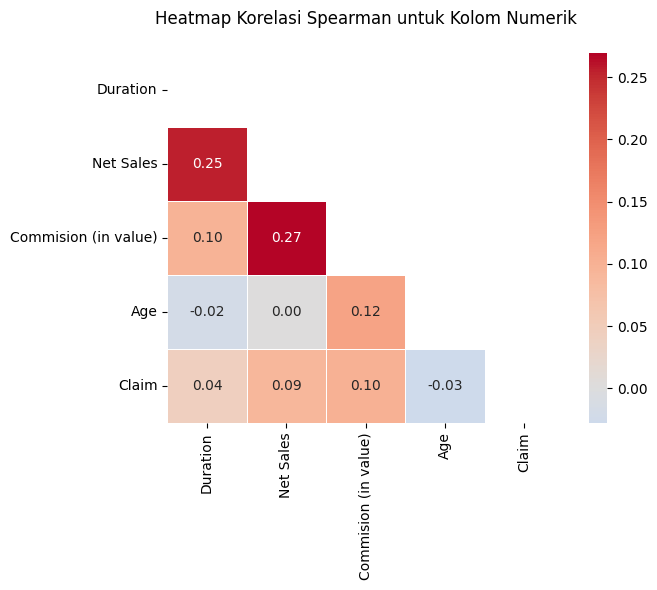

In [97]:
# Memilih hanya kolom numerik (tipe float64 dan int64)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi antar kolom numerik dengan metode Spearman
corr_spearman = numeric_df.corr(method='spearman')

# Membuat mask segitiga atas untuk menghindari duplikasi visualisasi korelasi
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Membuat heatmap korelasi Spearman
sns.heatmap(
    corr_spearman,
    cmap='coolwarm',      # Skema warna
    annot=True,           # Menampilkan nilai korelasi di dalam kotak
    fmt=".2f",            # Format angka dengan 2 desimal
    center=0,             # Pusatkan warna pada 0
    linewidths=0.5,       # Ketebalan garis pemisah
    mask=mask             # Mask untuk hanya menampilkan bagian bawah matriks
)

# Judul plot
plt.title('Heatmap Korelasi Spearman untuk Kolom Numerik\n')

# Tampilkan plot
plt.show()

***
**Kesimpulan**
***

- `Net Sales` vs `Commision (in value)`: Korelasi positif sedang (0,27) menunjukkan bahwa penjualan bersih yang lebih tinggi cenderung menghasilkan komisi lebih besar, meski hubungannya tidak terlalu kuat
- `Duration` vs `Net Sales`: Korelasi positif sedang (0,25) mengindikasikan bahwa durasi perjalanan yang lebih lama umumnya diikuti kenaikan penjualan bersih, namun kekuatannya terbatas
- `Age` vs `Commission (in value)`: Korelasi positif lemah (0,12) memperlihatkan kecenderungan kecil bahwa pemegang polis yang lebih tua terkait dengan komisi yang sedikit lebih tinggi.
- `Duration` vs `Commision (in value)`: Korelasi positif lemah (0,10) menandakan bahwa durasi yang lebih lama sedikit berkaitan dengan komisi lebih besar.

> ### **Categorical Features Analysis**

Pada tahap ini dilakukan peninjauan distribusi fitur kategorikal dalam dataset dengan melihat frekuensi tiap kategori. Tujuannya untuk mengetahui kategori yang paling dominan serta memahami potensi pengaruhnya terhadap analisis dan proses pemodelan

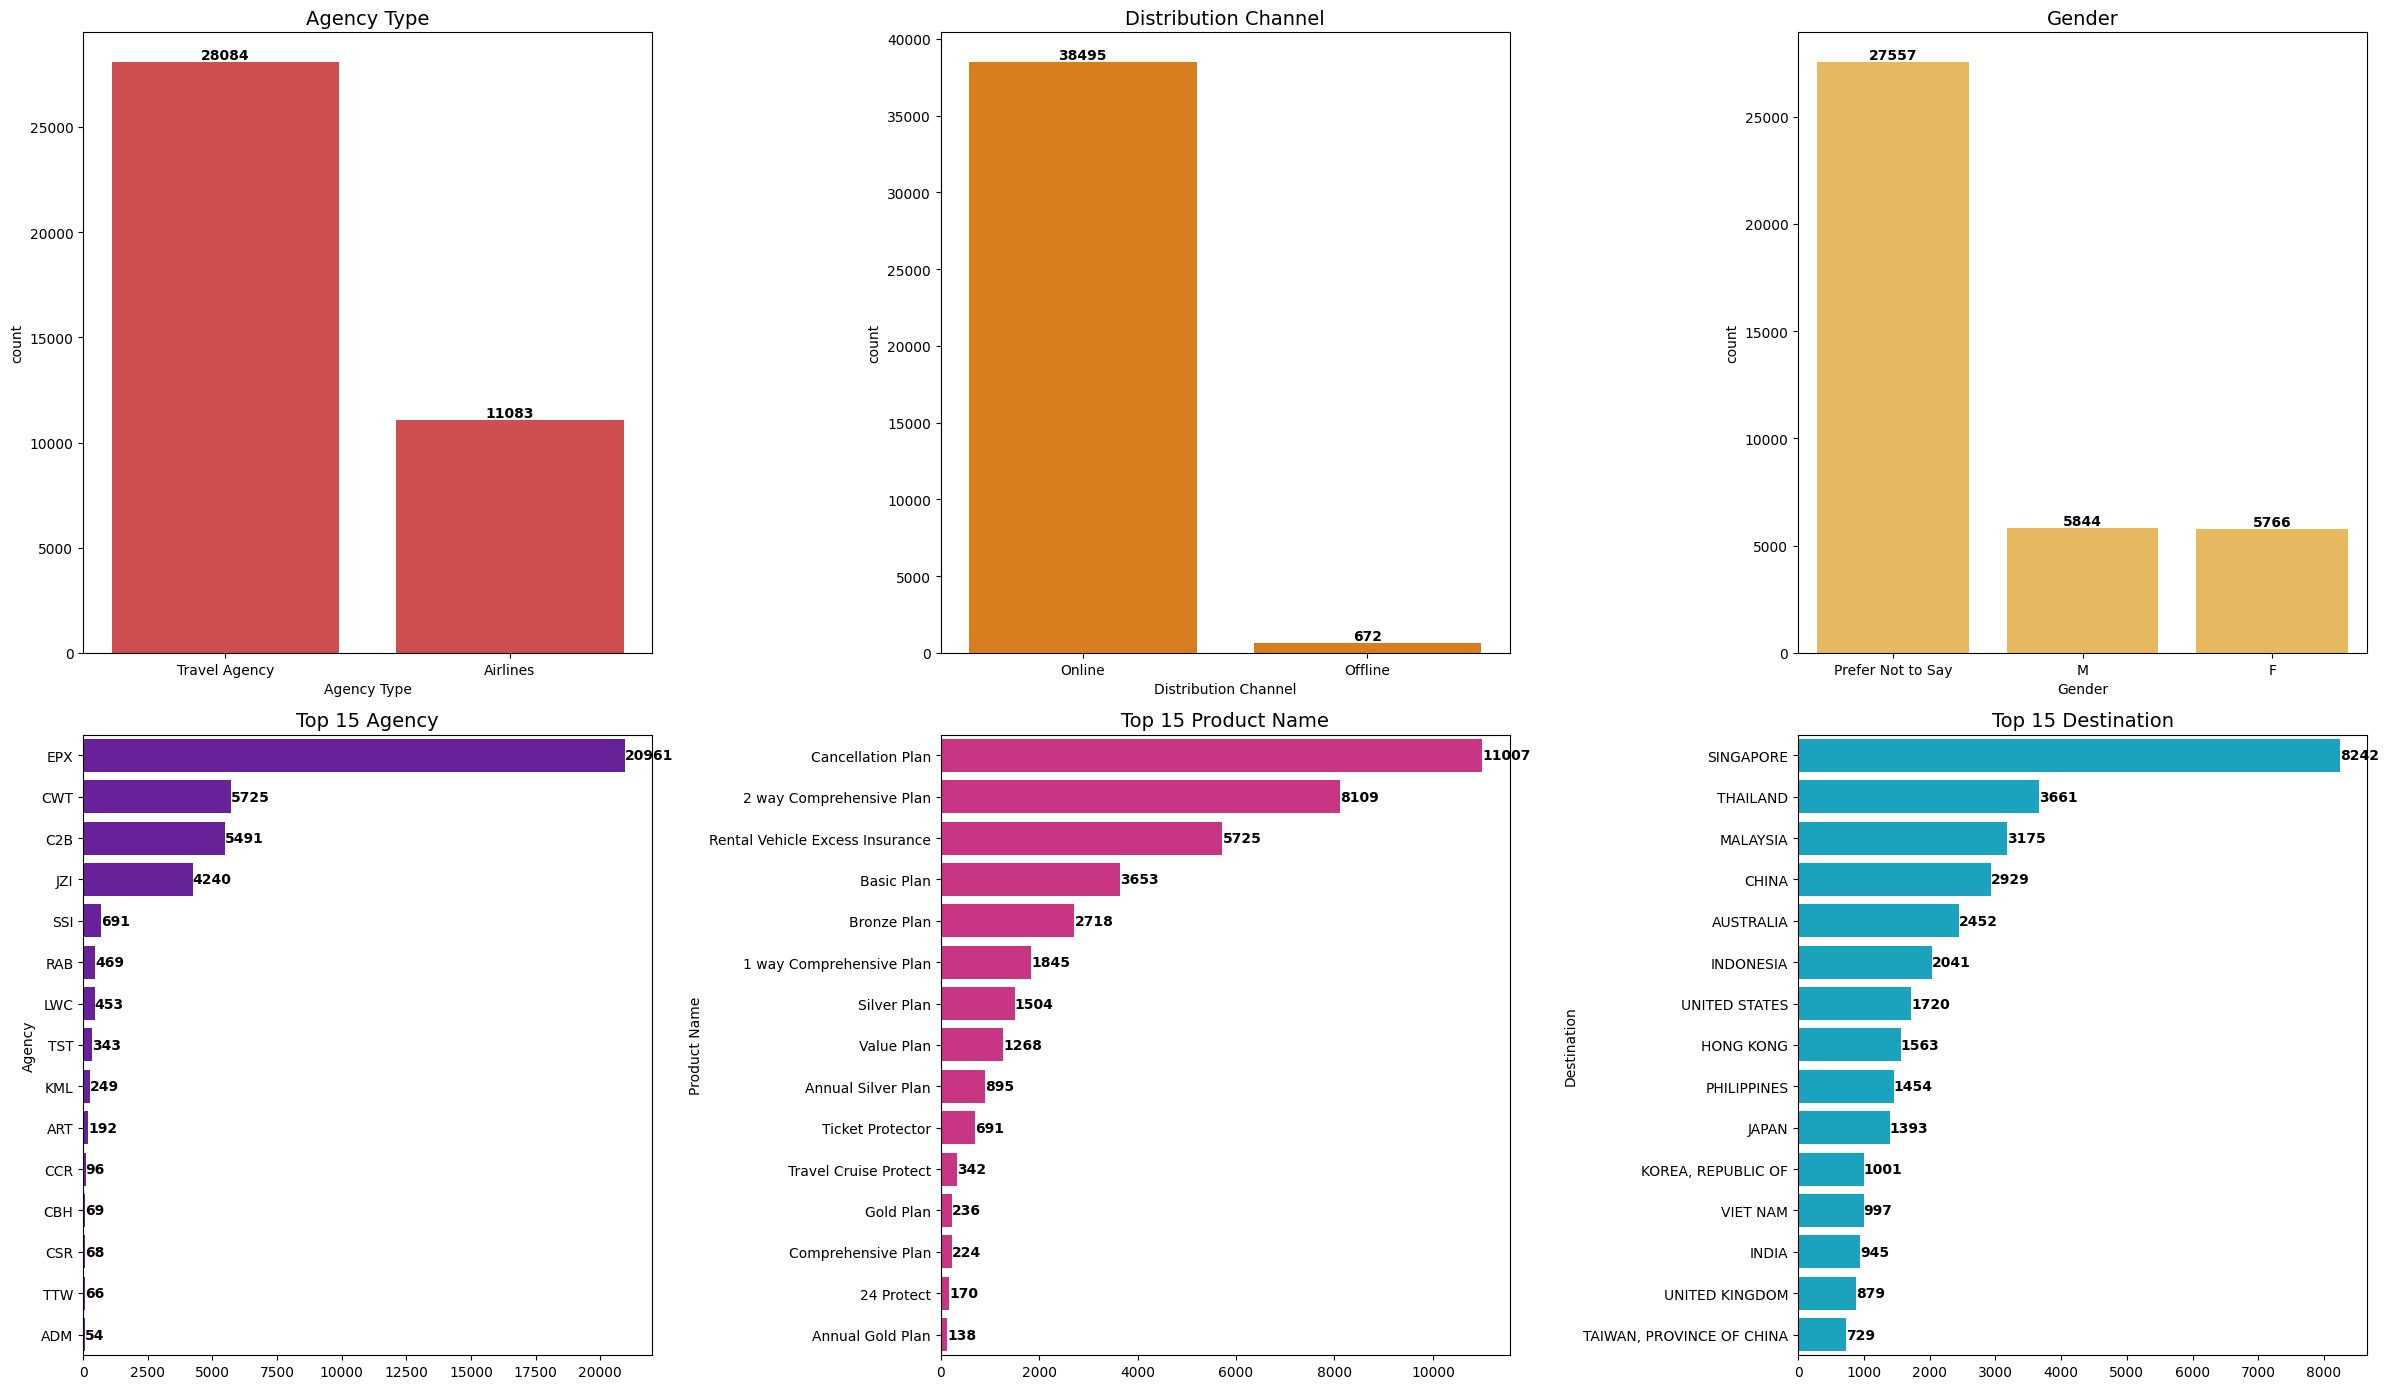

In [98]:
categorical_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']

vertical_features = ['Agency Type', 'Distribution Channel', 'Gender']
horizontal_features = ['Agency', 'Product Name', 'Destination']

vertical_colors = ['#e5383b', '#f77f00', '#fcbf49']
horizontal_colors = ['#6a0dad', '#e01e84', '#00b4d8']

fig, axes = plt.subplots(2, 3, figsize=(24, 14))

# --- Vertical Plots (countplot) ---
for i, feature in enumerate(vertical_features):
    ax = sns.countplot(
        data=df,
        x=feature,
        ax=axes[0, i],
        color=vertical_colors[i],  # Corrected argument
        order=df[feature].value_counts().index
    )
    ax.set_title(f'{feature}', size=14)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='bold')

# --- Horizontal Plots (barplot) ---
for i, feature in enumerate(horizontal_features):
    top_15 = df[feature].value_counts().nlargest(15)
    ax = sns.barplot(
        x=top_15.values,
        y=top_15.index,
        ax=axes[1, i],
        color=horizontal_colors[i]  # Corrected argument
    )
    ax.set_title(f'Top 15 {feature}', size=14)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='bold')

plt.tight_layout()
plt.show()

***
**Kesimpulan**
***

- `Agency`: EPX mendominasi dengan sekitar 47% dari total data, diikuti oleh CWT dan C2B.
- `Agency Type`: Travel Agency mencakup mayoritas (~72%), sementara Airlines sekitar 28%.
- `Distribution Channel`: Penjualan didominasi oleh kanal Online (~98%).
- `Product Name`: Cancellation Plan menjadi produk terpopuler (>11 ribu pemilihan), diikuti paket asuransi lainnya.
- `Gender`: Pemegang polis laki-laki dan perempuan hampir seimbang jumlahnya.
- `Destination`: Singapura menjadi tujuan terbanyak, unggul jauh dibanding destinasi lainnya.

> ### **Analysis of Net Sales and Commission**

Berdasarkan heatmap korelasi fitur numerik, terdapat korelasi positif sedang (0,27) antara `Net Sales` dan `Commision (in value)`. Artinya, peningkatan net sales umumnya diikuti oleh kenaikan komisi. Karena itu, korelasi ini akan dianalisis lebih lanjut.

1. `Net Sales` adalah total pendapatan bersih penjualan asuransi. Nilai negatif menandakan kerugian dari penjualan kotor, setelah dikurangi retur, potongan, dan diskon.

2. `Commision` adalah kompensasi tambahan dari perusahaan asuransi kepada agen, biasanya diberikan jika pendapatan memenuhi atau melampaui target (net sales positif). Jika terjadi kerugian (net sales negatif), komisi bisa tidak dibayarkan (komisi = 0), meskipun hal ini bergantung pada kesepakatan antara perusahaan asuransi dan agen.

Analisis akan mencakup :
- Jumlah data dengan net sales negatif
- Agen yang tidak menerima komisi saat net sales negatif
- Agen yang tetap menerima komisi meski net sales negatif
- Agen yang tidak menerima komisi saat net sales positif
- Agen yang menerima komisi saat net sales positif
- Jumlah pemegang polis pada tiap agen

****
### **Jumlah Rekaman dengan Net Sales Negatif**
****

In [99]:
# Menampilkan seluruh baris dengan Net Sales bernilai negatif
df[df['Net Sales'] < 0]

Agency    Agency Type Distribution Channel  \
93       C2B       Airlines               Online   
113      CWT  Travel Agency               Online   
118      CWT  Travel Agency               Online   
196      EPX  Travel Agency               Online   
238      CWT  Travel Agency               Online   
...      ...            ...                  ...   
38636    EPX  Travel Agency               Online   
38679    CWT  Travel Agency               Online   
38687    EPX  Travel Agency               Online   
38773    EPX  Travel Agency               Online   
38831    CWT  Travel Agency               Online   

                          Product Name             Gender  Duration  \
93                  Annual Silver Plan                  M       365   
113    Rental Vehicle Excess Insurance  Prefer Not to Say       430   
118    Rental Vehicle Excess Insurance  Prefer Not to Say        77   
196                  Cancellation Plan  Prefer Not to Say        29   
238    Rental Vehicle Excess Insurance  Prefer Not to Say        57   
...                                ...                ...       ...   
38636         2 way Comprehensive Plan  Prefer Not to Say       140   
38679  Rental Vehicle Excess Insurance  Prefer Not to Say        23   
38687         2 way Comprehensive Plan  Prefer Not to Say       147   
38773                Cancellation Plan  Prefer Not to Say        49   
38831  Rental Vehicle Excess Insurance  Prefer Not to Say       186   

          Destination  Net Sales  Commision (in value)  Age  Claim  
93          SINGAPORE    -216.75                 54.19   36      0  
113         AUSTRALIA     -59.40                 35.64   41      0  
118             JAPAN     -29.70                 17.82   59      0  
196         HONG KONG     -12.00                  0.00   36      0  
238         AUSTRALIA     -59.40                 35.64   28      0  
...               ...        ...                   ...  ...    ...  
38636   UNITED STATES     -98.00                  0.00   29      0  
38679        MALAYSIA     -29.70                 17.82   29      0  
38687           SPAIN     -68.00                  0.00   36      0  
38773  UNITED KINGDOM     -68.00                  0.00   36      0  
38831       AUSTRALIA     -99.00                 59.40   34      0  

[469 rows x 11 columns]

Terdapat 469 baris dengan nilai Net Sales negatif.

****
### **Agen yang Tidak Menerima Komisi Saat Net Sales Negatif**
****

In [100]:
# Filter data untuk Net Sales negatif dan Commission = 0
neg_net_no_comm = df[(df['Net Sales'] < 0) & (df['Commision (in value)'] == 0)]
neg_net_no_comm['Agency'].value_counts()

Agency
EPX    133
Name: count, dtype: int64

Beberapa agen tidak menerima komisi saat Net Sales negatif, sesuai dengan aturan pembayaran komisi yang berlaku di perusahaan asuransi.

****
### **Agen yang Tetap Menerima Komisi meski Net Sales Negatif**
****

In [101]:
# Filter data: Net Sales negatif & komisi > 0
neg_net_with_comm = df[(df['Net Sales'] < 0) & (df['Commision (in value)'] > 0)]

# Ringkasan cepat: jumlah baris & jumlah agen unik
total_barIs = len(neg_net_with_comm)
total_agen  = neg_net_with_comm['Agency'].nunique()

print("Total baris:", total_barIs)
print("Total agen unik:", total_agen)

# Daftar agen dan frekuensi kemunculannya
neg_net_with_comm['Agency'].value_counts()

# (Opsional) Agregasi tambahan per agen
# - jumlah baris
# - total komisi dibayarkan
# - total net sales (negatif)
# - komisi rata-rata
neg_net_with_comm.groupby('Agency').agg(
    jumlah_baris=('Agency', 'size'),
    total_komisi=('Commision (in value)', 'sum'),
    total_net_sales=('Net Sales', 'sum'),
    rata2_komisi=('Commision (in value)', 'mean')
).sort_values('jumlah_baris', ascending=False)

Total baris: 336
Total agen unik: 9


jumlah_baris  total_komisi  total_net_sales  rata2_komisi
Agency                                                           
CWT              268       9563.40        -15939.00     35.684328
C2B               29        959.75         -3838.90     33.094828
JZI               17        299.60          -856.00     17.623529
ADM               11        378.48          -996.00     34.407273
LWC                4         91.66          -141.00     22.915000
ART                3         21.72           -62.07      7.240000
TST                2         21.00           -60.00     10.500000
KML                1         49.40          -130.00     49.400000
RAB                1          6.00           -15.00      6.000000

Ada kasus di mana komisi tetap dibayar walau Net Sales bernilai negatif, kemungkinan karena ketentuan kontrak / insentif tertentu pada agen terkait.

****
### **Agen yang Tidak Menerima Komisi saat Net Sales Positif**
****

In [102]:
# Filter data: Net Sales positif & komisi = 0
pos_net_no_comm = df[(df['Net Sales'] > 0) & (df['Commision (in value)'] == 0)]

# Ringkasan cepat: jumlah baris & jumlah agen unik
total_baris = len(pos_net_no_comm)
total_agen  = pos_net_no_comm['Agency'].nunique()

print("Total baris:", total_baris)
print("Total agen unik:", total_agen)

# Daftar agen dan frekuensi kemunculannya
pos_net_no_comm['Agency'].value_counts()

# (Opsional) Agregasi tambahan per agen
pos_net_no_comm.groupby('Agency').agg(
    jumlah_baris=('Agency', 'size'),
    total_net_sales=('Net Sales', 'sum')
).sort_values('jumlah_baris', ascending=False)


Total baris: 20552
Total agen unik: 2


jumlah_baris  total_net_sales
Agency                               
EPX            20486         734788.0
TTW               66           6098.0

Terdapat agen yang tidak menerima komisi meskipun Net Sales positif. Hal ini kemungkinan terkait dengan persyaratan tertentu untuk pencairan komisi.

****
### **Agen yang Menerima Komisi saat Net Sales Positif**
****

In [103]:
# Filter data: Net Sales positif & komisi > 0
pos_net_with_comm = df[(df['Net Sales'] > 0) & (df['Commision (in value)'] > 0)]

# Ringkasan cepat: jumlah baris & jumlah agen unik
total_baris = len(pos_net_with_comm)
total_agen  = pos_net_with_comm['Agency'].nunique()

print("Total baris:", total_baris)
print("Total agen unik:", total_agen)

# Daftar agen dan frekuensi kemunculannya
pos_net_with_comm['Agency'].value_counts()

# (Opsional) Agregasi tambahan per agen
pos_net_with_comm.groupby('Agency').agg(
    jumlah_baris=('Agency', 'size'),
    total_komisi=('Commision (in value)', 'sum'),
    rata2_komisi=('Commision (in value)', 'mean'),
    total_net_sales=('Net Sales', 'sum')
).sort_values('jumlah_baris', ascending=False)


Total baris: 16909
Total agen unik: 13


jumlah_baris  total_komisi  rata2_komisi  total_net_sales
Agency                                                           
C2B             5369     108677.21     20.241611        434675.76
CWT             4779     157196.16     32.893107        261993.60
JZI             4144      48650.00     11.739865        139000.00
SSI              691       1258.75      1.821635          4489.73
RAB              464       3389.20      7.304310          8473.00
LWC              434      32793.69     75.561498         50467.20
TST              335       3517.50     10.500000         10050.00
KML              247       5749.02     23.275385         15129.00
ART              185       1791.64      9.684541          5119.03
CCR               94        970.86     10.328298          2942.00
CSR               68        710.82     10.453235          2154.00
CBH               64        622.05      9.719531          1885.00
ADM               35       1409.80     40.280000          3710.00

Mayoritas agen menerima komisi saat Net Sales positif, sesuai praktik umum penjualan asuransi. Nilai komisi bervariasi tergantung perjanjian dengan masing-masing agen.

****
### **Jumlah Pemegang Polis per Agen**
****

Agency
EPX    20961
CWT     5725
C2B     5491
JZI     4240
SSI      691
RAB      469
LWC      453
TST      343
KML      249
ART      192
CCR       96
CBH       69
CSR       68
TTW       66
ADM       54
dtype: int64


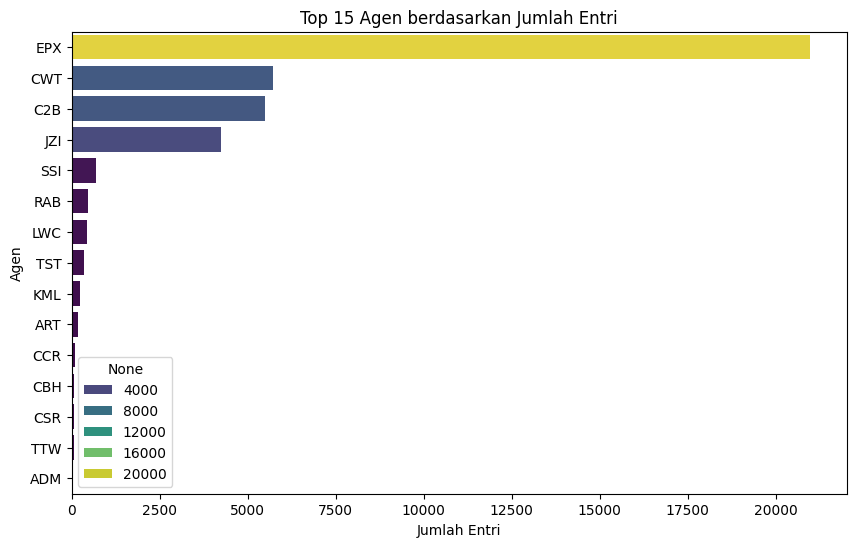

In [104]:
# Menghitung jumlah entri (baris data) per agen
policyholders_per_agency = df.groupby('Agency').size().sort_values(ascending=False)

# Tampilkan hasil
print(policyholders_per_agency)

# Visualisasi top 15 agen dengan jumlah entri terbanyak
top15_policyholders = policyholders_per_agency.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top15_policyholders.values,
    y=top15_policyholders.index,
    palette='viridis',
    hue=top15_policyholders
)
plt.title('Top 15 Agen berdasarkan Jumlah Entri')
plt.xlabel('Jumlah Entri')
plt.ylabel('Agen')
plt.show()

| No | Kesimpulan                                                                                                                                                                                      |
| -- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | **`Net Sales` & `Commission (in value)`**: Korelasi positif sedang (0,27) – penjualan bersih lebih tinggi cenderung diikuti komisi yang lebih besar, meski hubungan ini tidak terlalu kuat. |
| 2  | **`Duration` & `Net Sales`**: Korelasi positif sedang (0,25) – durasi perjalanan yang lebih lama umumnya diikuti peningkatan penjualan bersih, namun kekuatannya terbatas.                  |
| 3  | **`Age` & `Commission (in value)`**: Korelasi positif lemah (0,12) – pemegang polis yang lebih tua sedikit cenderung terkait komisi lebih tinggi, tapi hubungan ini relatif lemah.          |
| 4  | **`Duration` & `Commission (in value)`**: Korelasi positif lemah (0,10) – durasi perjalanan yang lebih lama sedikit berkaitan dengan komisi lebih besar.                                    |


> ### **Target Data Proportion After Cleaning**

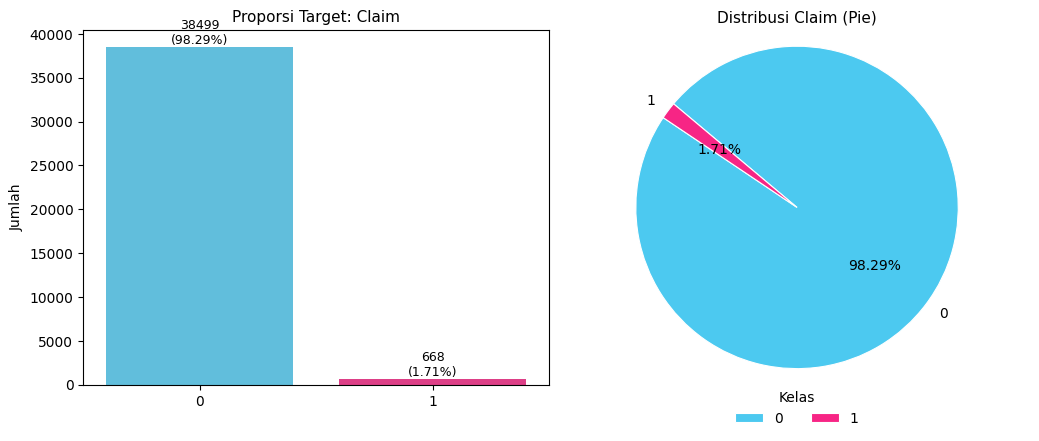

In [105]:
# --- Siapkan data target (rapikan spasi/tipe dulu) ---
target = df['Claim'].astype(str).str.strip()
urutan = target.value_counts().index.tolist()          # urut dari yang terbanyak

# Hitung ringkasannya
hitung = target.value_counts().reindex(urutan)
persen = (hitung / hitung.sum() * 100).round(2)

# Palet warna baru agar tidak sama persis
warna = ['#4CC9F0', '#F72585']   

# --- Buat kanvas side-by-side ---
fig, (ax_bar, ax_pie) = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4.5))

# ===== Panel 1: Countplot dengan label jumlah & persen =====
sns.countplot(x=target, order=urutan, palette=warna,hue=target , ax=ax_bar)
ax_bar.set_title('Proporsi Target: Claim', fontsize=11)
ax_bar.set_xlabel('')
ax_bar.set_ylabel('Jumlah')

# Tambahkan label di atas tiap bar (jumlah dan persentase)
for patch, pr in zip(ax_bar.patches, persen):
    tinggi = patch.get_height()
    ax_bar.annotate(
        f'{int(tinggi)}\n({pr:.2f}%)',
        (patch.get_x() + patch.get_width() / 2, tinggi),
        ha='center', va='bottom', fontsize=9
    )

# ===== Panel 2: Pie chart =====
ax_pie.pie(
    hitung.values,
    labels=urutan,
    colors=warna,
    autopct='%1.2f%%',
    startangle=140,
    counterclock=False,
    wedgeprops=dict(linewidth=0.8, edgecolor='white')
)
ax_pie.set_title('Distribusi Claim (Pie)', fontsize=11)
ax_pie.axis('equal')  # agar pie menjadi bulat

# Legend opsional (di bawah pie)
ax_pie.legend(title='Kelas', loc='lower center', bbox_to_anchor=(0.5, -0.15),
              ncol=len(urutan), frameon=False)

plt.tight_layout()
plt.show()


In [106]:
sum = df['Claim'].value_counts()

percentage = (df['Claim'].value_counts() / len(df)) * 100

print(f'Total Claim\n{sum}\n')
print(f'Claim Proportion (%)\n{percentage.round(2)}')

Total Claim
Claim
0    38499
1      668
Name: count, dtype: int64

Claim Proportion (%)
Claim
0    98.29
1     1.71
Name: count, dtype: float64


***
**Kesimpulan**
***

- Setelah pembersihan data, proporsi target menjadi 98,29% tanpa klaim dan 1,71% klaim.
- Terjadi sedikit penurunan jumlah tanpa klaim dan kenaikan klaim.
- Ketidakseimbangan kelas tetap besar dalam dataset.

> ### **Analisis Fitur Numerik vs Target**

Analisis ini membandingkan fitur numerik `Duration`, `Net Sales`, `Commission (in value)`, dan `Age` terhadap kemungkinan terjadinya klaim. Bar plot menampilkan nilai median tiap fitur berdasarkan status klaim, sehingga perbedaan antara kasus klaim dan non-klaim dapat terlihat.

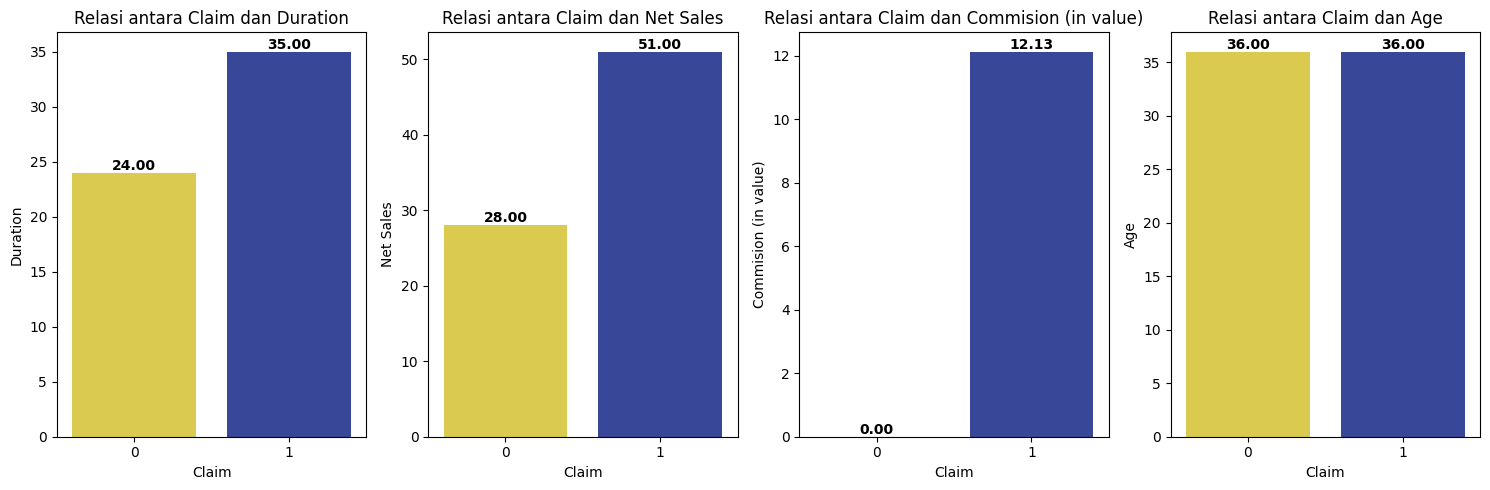

In [107]:
# Daftar fitur numerik yang akan dibandingkan terhadap target (Claim)
numerical_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

plt.figure(figsize=(15, 5))
plotnumber = 1

# Warna untuk klaim 0 (non-claim) dan 1 (claim)
colors = ["#F1DC39", "#293CA8"]

for feature in numerical_features:
    ax = plt.subplot(1, len(numerical_features), plotnumber)

    # Median tiap fitur berdasar status Claim
    median_values = df.groupby('Claim')[feature].median().reset_index()

    # Pastikan urutan hue konsisten (0 lalu 1)
    median_values['Claim'] = median_values['Claim'].astype(int)
    hue_order = [0, 1]

    # Barplot tanpa errorbar + tanpa legend (bebas warning)
    ax = sns.barplot(
        data=median_values,
        x='Claim',
        y=feature,
        hue='Claim',
        hue_order=hue_order,
        palette=colors,
        errorbar=None,
        dodge=False,
        legend=False
    )

    plt.ylabel(feature)
    plt.title(f'Relasi antara Claim dan {feature}', fontsize=12)

    # Label nilai di atas batang
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontweight='bold')

    plotnumber += 1
    plt.tight_layout()

plt.show()

***
**Kesimpulan**
***

Penggunaan median dipilih karena data numerik tidak berdistribusi normal. Median lebih tahan terhadap outlier dibandingkan mean, sehingga dapat menggambarkan nilai tipikal pemegang polis secara lebih akurat.

- **`Duration`:**
    - Non-claim : median 24 hari

    - Claim : median 35 hari

    - Artinya : Pemegang polis yang mengajukan klaim cenderung memiliki durasi lebih lama dibandingkan yang tidak mengajukan klaim

- **`Net Sales`:**
    - Non-claim : median 28 dolar

    - Claim : median 51 dolar
    
    - Artinya : Nilai net sales median lebih tinggi pada pemegang polis yang mengajukan klaim, mengindikasikan potensi premi atau cakupan polis yang lebih besar

- **`Commission (in value)`:**
    - Non-claim : median 0,00 dolar

    - Claim : median 12,13 dolar

    - Artinya : Pemegang polis yang mengajukan klaim cenderung mendapatkan komisi, kemungkinan dari transaksi atau layanan terkait polis

- **`Age`:**
    - Non-claim : median 36 tahun

    - Claim : median 36 tahun

    - Artinya : Tidak ada perbedaan signifikan pada distribusi usia antara pengaju klaim dan non-klaim

> ### **Analisis Fitur Kategorikal vs Target**

Analisis ini meneliti keterkaitan antara fitur kategorikal dan pengajuan klaim asuransi. Fitur yang dianalisis meliputi `Agency`, `Agency Type`, `Distribution Channel`, `Product Name`, `Gender`, dan `Destination`. Dengan menghubungkannya pada variabel target `Claim`, analisis ini bertujuan mengungkap bagaimana perbedaan kategori dapat memengaruhi peluang pemegang polis mengajukan klaim

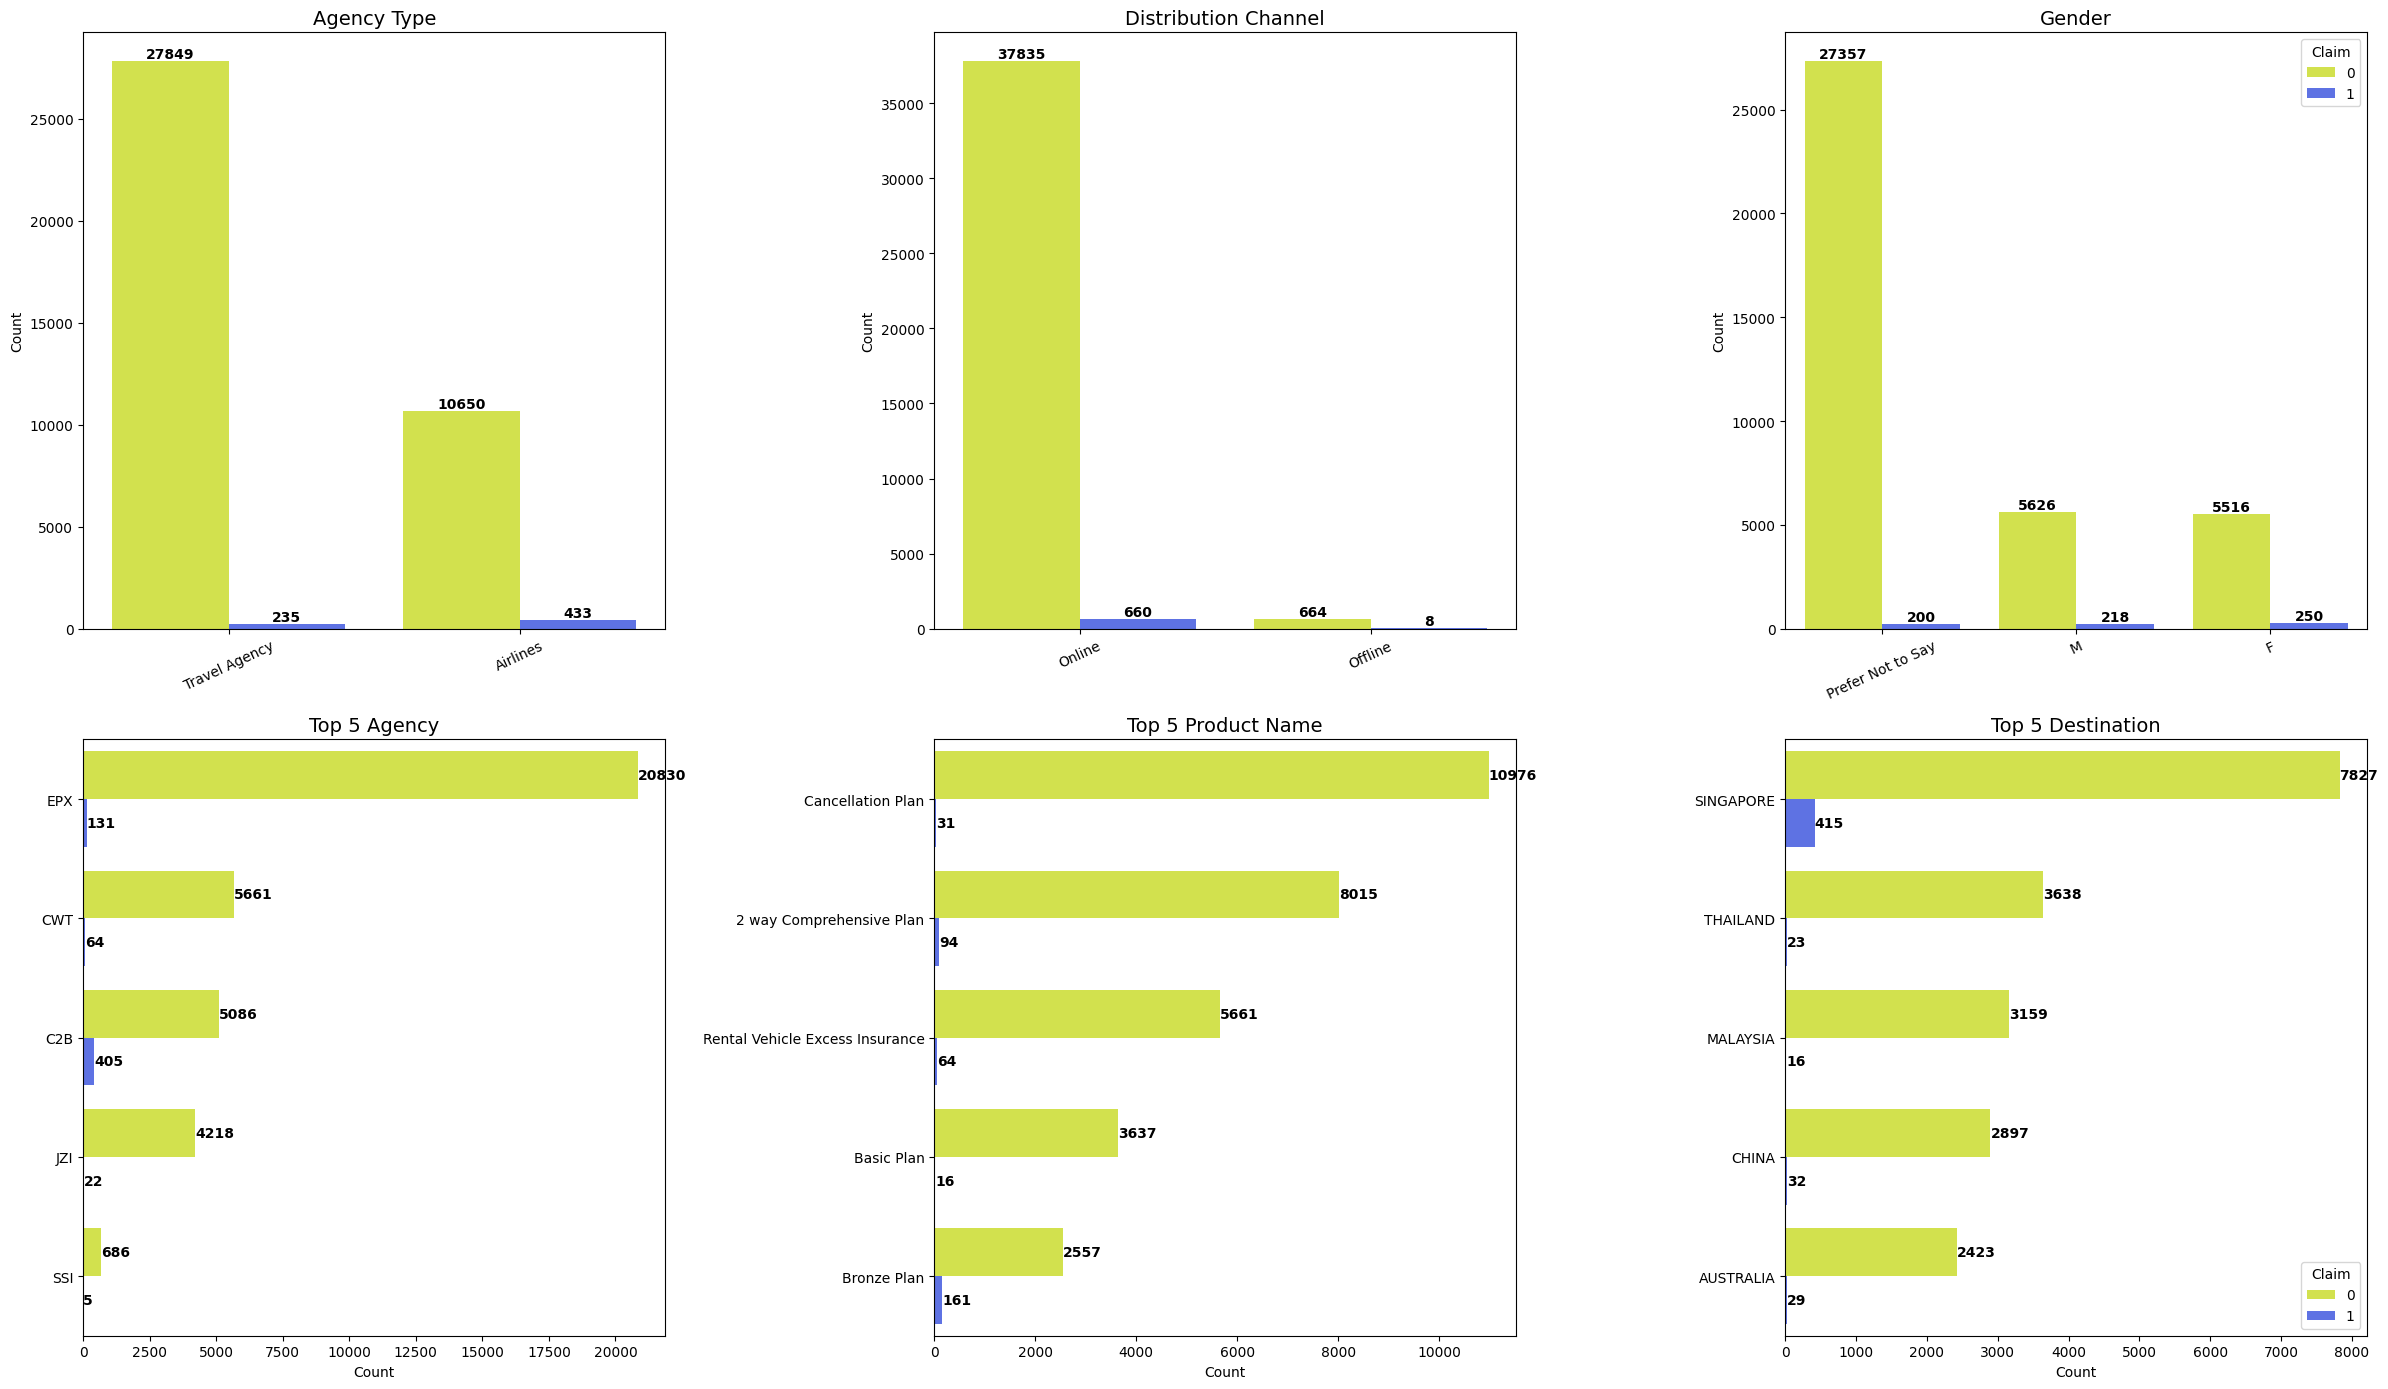

In [108]:
# Fitur yang dianalisis
categorical_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']

# Kelompok fitur untuk dua baris visual
vertical_features   = ['Agency Type', 'Distribution Channel', 'Gender']
horizontal_features = ['Agency', 'Product Name', 'Destination']

# Warna untuk Claim=0 dan Claim=1 (urutannya dikunci via hue_order)
colors = ["#E5F936", "#4863F9"]
hue_order = [0, 1]  # pastikan konsisten: 0 dulu, lalu 1

# Pastikan kolom Claim bertipe int (0/1)
df['Claim'] = df['Claim'].astype(int)

fig, axes = plt.subplots(2, 3, figsize=(24, 14))

# ---------- Baris Atas: fitur ringkas (vertikal) ----------
for i, feature in enumerate(vertical_features):
    # Urutkan kategori berdasarkan frekuensi (top-10)
    order_x = df[feature].value_counts().index[:10]

    ax = sns.countplot(
        data=df,
        x=feature,
        hue='Claim',
        hue_order=hue_order,
        order=order_x,
        ax=axes[0, i],
        palette=colors
    )
    ax.set_title(f'{feature}', fontsize=14)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=25)

    # Tampilkan label count di atas batang
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='bold')

    # Hanya tampilkan legend di panel paling kanan supaya tidak berulang
    if i == len(vertical_features) - 1:
        ax.legend(title='Claim', loc='upper right')
    else:
        ax.legend_.remove()

# ---------- Baris Bawah: Top-5 kategori (horizontal) ----------
for i, feature in enumerate(horizontal_features):
    # Ambil 5 kategori terbanyak
    top_5 = df[feature].value_counts().nlargest(5).index
    data_top = df[df[feature].isin(top_5)]

    ax = sns.countplot(
        data=data_top,
        y=feature,
        hue='Claim',
        hue_order=hue_order,
        order=top_5,      # urutan sesuai top-5
        ax=axes[1, i],
        palette=colors
    )
    ax.set_title(f'Top 5 {feature}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('Count')

    # Label count di ujung bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='bold')

    # Legend hanya di panel paling kanan
    if i == len(horizontal_features) - 1:
        ax.legend(title='Claim', loc='lower right')
    else:
        ax.legend_.remove()

plt.tight_layout()
plt.show()

| No | Fitur                    | Temuan Utama              | Detail                                                                                                                                           |
| -- | ------------------------ | ------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ |
| 1  | **Agency**               | Klaim terbanyak           | Agen **C2B** memiliki jumlah klaim tertinggi.                                                                                                    |
|    |                          | Klaim paling sedikit      | Agen **SSI** mencatat klaim terendah dibanding agen lain.                                                                                        |
| 2  | **Agency Type**          | Maskapai vs Travel Agency | Polis dari **maskapai** memiliki proporsi klaim lebih tinggi dibanding **travel agency**.                                                        |
| 3  | **Distribution Channel** | Online vs Offline         | Kanal **online** dominan untuk transaksi dan klaim, menunjukkan preferensi kuat terhadap layanan daring.                                         |
| 4  | **Product Name**         | Paling populer            | **Cancellation Plan** paling sering digunakan, baik untuk klaim maupun non-klaim, meski tingkat klaimnya tidak setinggi produk tertentu lainnya. |
|    |                          | Klaim tertinggi           | **Bronze Plan** memiliki proporsi klaim tertinggi dibanding produk lain.                                                                         |
| 5  | **Gender & Destination** | Destinasi terpopuler      | **Singapura** menjadi tujuan utama untuk klaim dan non-klaim.                                                                                    |
|    |                          | Perbedaan gender          | Klaim sedikit lebih banyak diajukan oleh perempuan dibanding laki-laki.                                                                          |


****
## **Feature Engineering**
****

Feature Engineering adalah tahap penting dalam proses data preprocessing. Tahap ini mengubah data mentah menjadi fitur yang lebih bermakna untuk meningkatkan kinerja model machine learning. Rekayasa fitur yang baik dapat secara signifikan meningkatkan akurasi dan efisiensi model prediksi dengan menyediakan data masukan yang relevan dan teroptimasi.

> ### **Pembagian Data (Data Splitting)**

Proses membagi dataset menjadi data latih dan data uji untuk menguji performa model pada data baru serta mengurangi risiko overfitting.

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# Menentukan fitur (X) dan target (y)
X = df.drop(columns='Claim')   # Semua kolom kecuali 'Claim' sebagai fitur
y = df['Claim']                # Kolom 'Claim' sebagai target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,        # Membagi dengan proporsi kelas yang sama
    test_size=0.2,     # 20% untuk data uji
    random_state=42    # Seed agar hasil konsisten
)

# Menampilkan bentuk (jumlah baris, kolom) data latih dan uji
X_train.shape, X_test.shape


((31333, 10), (7834, 10))

In [111]:
# Menyimpan data uji ke file CSV tanpa menyertakan index
X_test.to_csv('test_data.csv', index=False)

In [112]:
# Menampilkan isi variabel X (fitur) dan y (target)
display(X, y)

Agency    Agency Type Distribution Channel  \
0        C2B       Airlines               Online   
1        EPX  Travel Agency               Online   
2        JZI       Airlines               Online   
3        EPX  Travel Agency               Online   
4        C2B       Airlines               Online   
...      ...            ...                  ...   
39162    EPX  Travel Agency               Online   
39163    CWT  Travel Agency               Online   
39164    TST  Travel Agency              Offline   
39165    EPX  Travel Agency               Online   
39166    CWT  Travel Agency               Online   

                          Product Name             Gender  Duration  \
0                   Annual Silver Plan                  F       365   
1                    Cancellation Plan  Prefer Not to Say         4   
2                           Basic Plan                  M        19   
3             2 way Comprehensive Plan  Prefer Not to Say        20   
4                          Bronze Plan                  M         8   
...                                ...                ...       ...   
39162         2 way Comprehensive Plan  Prefer Not to Say        14   
39163  Rental Vehicle Excess Insurance  Prefer Not to Say        17   
39164            Travel Cruise Protect                  M        64   
39165         2 way Comprehensive Plan  Prefer Not to Say        51   
39166  Rental Vehicle Excess Insurance  Prefer Not to Say       172   

         Destination  Net Sales  Commision (in value)  Age  
0          SINGAPORE      216.0                 54.00   57  
1           MALAYSIA       10.0                  0.00   33  
2              INDIA       22.0                  7.70   26  
3      UNITED STATES      112.0                  0.00   59  
4          SINGAPORE       16.0                  4.00   28  
...              ...        ...                   ...  ...  
39162          CHINA       30.0                  0.00   36  
39163      AUSTRALIA       79.2                 47.52   47  
39164       THAILAND       30.0                 10.50   50  
39165          CHINA       36.0                  0.00   36  
39166      SINGAPORE        0.0                 17.82   31  

[39167 rows x 10 columns]

0        0
1        0
2        0
3        0
4        0
        ..
39162    1
39163    0
39164    0
39165    0
39166    0
Name: Claim, Length: 39167, dtype: int64

| **Tahap**                           | **Deskripsi**                                                                                | **Detail Hasil**                                               |
| ----------------------------------- | -------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| Menentukan Fitur (X) dan Target (y) | `X` berisi semua kolom kecuali `Claim`, sedangkan `y` adalah kolom `Claim`                   | —                                                              |
| Pembagian Data                      | Data dibagi menjadi **train** dan **test**, dengan `stratify=y` untuk menjaga proporsi kelas | Train: `X_train`, `y_train`<br>Test: `X_test`, `y_test`        |
| Hasil                               | Ukuran masing-masing set setelah pembagian                                                   | Train: 31.333 sampel, 10 fitur<br>Test: 7.834 sampel, 10 fitur |


> ### **Encoding**

Dalam tahap pra-pemrosesan machine learning, fitur kategorikal perlu dikonversi menjadi bentuk numerik agar dapat dipahami oleh model. Proses ini memastikan data kualitatif dapat diolah secara optimal untuk pelatihan dan prediksi.

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

In [114]:
transformer = ColumnTransformer([
    ('onehotenc', OneHotEncoder(drop = 'first'), ['Agency Type', 'Distribution Channel', 'Gender']),
    ('binenc', BinaryEncoder(), ['Agency', 'Product Name', 'Destination'])
], remainder='passthrough')

In [115]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotenc', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel',
                                  'Gender']),
                                ('binenc', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

| Jenis Encoding     | Kolom yang Digunakan                     | Penjelasan Singkat                                                                                                  |
|--------------------|------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| One-Hot Encoding   | Gender, Agency Type, Distribution Channel | Teknik ini mengubah tiap kategori menjadi kolom biner sehingga informasi kategori bisa dibaca model sebagai angka (praktis untuk kolom dengan sedikit kategori).    |
| Binary Encoding    | Agency, Product Name, Destination         | Binary encoding membantu menekan jumlah kolom (lebih hemat dibanding OHE) sekaligus mempertahankan informasi penting untuk analisis/pemodelan. |


> ### **Scaling**

Scaling adalah tahap pra-pemrosesan penting untuk menyeragamkan rentang nilai fitur, sehingga model dapat memproses semua variabel dengan skala yang konsisten. Proses ini membantu meningkatkan kinerja dan kecepatan konvergensi algoritma yang sensitif terhadap perbedaan skala.

Namun, algoritma berbasis pohon seperti `Decision Tree`, `Random Forest`, `AdaBoost`, `GradientBoost`, dan `XGBoost` tidak memerlukan scaling. Hal ini karena pemisahan node pada algoritma tersebut dilakukan per fitur secara independen, sehingga perbedaan skala tidak memengaruhi hasil pemisahan.

Scaling hanya akan diterapkan pada model seperti `Logistic Regression` dan `K-Nearest Neighbors` (KNN) yang berbasis perhitungan jarak atau memerlukan asumsi distribusi tertentu. Mengingat data mengandung outlier dan distribusinya tidak normal, metode Robust Scaler dipilih. Robust Scaler menggunakan interquartile range (IQR) sehingga lebih tahan terhadap outlier dan tetap menjaga bentuk distribusi data.

Dengan pendekatan ini, model seperti Logistic Regression dan KNN dapat memperoleh kinerja yang lebih baik tanpa mengorbankan karakteristik asli data.

In [116]:
from sklearn.preprocessing import RobustScaler

In [117]:
scaler = RobustScaler()

> ### **Resampling**

Untuk mengatasi ketidakseimbangan kelas pada dataset, beberapa teknik resampling digunakan agar distribusi target lebih seimbang dan model menjadi lebih akurat. Metode yang dipertimbangkan :

- Random Over-sampling (ROS) → Menambah jumlah data kelas minoritas dengan mereplikasi sampel secara acak.

- Random Under-sampling (RUS) → Mengurangi data kelas mayoritas dengan menghapus sampel secara acak.

- SMOTE → Membuat sampel sintetis kelas minoritas melalui interpolasi antar data minoritas.

- NearMiss → Memilih data kelas mayoritas yang jaraknya paling dekat dengan data minoritas.

Masing-masing teknik akan diuji menggunakan cross-validation untuk menentukan metode terbaik sesuai karakteristik data dan meningkatkan kinerja model.

In [118]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [119]:
ros = RandomOverSampler(random_state = 42)
rus = RandomUnderSampler(random_state = 42)
smote = SMOTE(random_state = 42)
nmiss = NearMiss()

****
## **Feature Selection**
****

Seleksi fitur adalah langkah penting dalam machine learning untuk meningkatkan kinerja model dengan memfokuskan pada variabel yang paling berpengaruh dan mengabaikan yang kurang relevan. Proses ini membantu meningkatkan akurasi, mengurangi risiko overfitting, dan membuat model lebih mudah dipahami.

Dalam proyek ini, digunakan metode Recursive Feature Elimination (RFE) dengan algoritma Random Forest Classifier untuk menilai dan memberi peringkat pentingnya setiap fitur. RFE secara bertahap menghapus fitur yang kurang signifikan hingga tersisa subset fitur yang mampu memberikan prediksi paling akurat.

In [120]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [121]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

X_test_preprocessed.shape[1]

25

In [122]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
feature_names

['Agency Type_Travel Agency',
 'Distribution Channel_Online',
 'Gender_M',
 'Gender_Prefer Not to Say',
 'Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7',
 'Duration',
 'Net Sales',
 'Commision (in value)',
 'Age']

In [123]:
# Gunakan Random Forest sebagai estimator
estimator = RandomForestClassifier(random_state=42)

# Range jumlah fitur yang akan diuji (misal dari 10 sampai 14 fitur)
n_features_range = range(10, 15)

selected_features = []  # Menyimpan hasil pemilihan fitur tiap percobaan
scores = []  # Menyimpan skor cross-validation untuk tiap jumlah fitur

# Loop untuk mencoba berbagai jumlah fitur
for n_features in n_features_range:
    # Inisialisasi RFE dengan jumlah fitur yang akan dipilih
    selector = RFE(estimator, n_features_to_select=n_features, step=1)
    
    # Latih RFE pada data training yang sudah diproses
    selector.fit(X_train_preprocessed, y_train)
    
    # Transformasi data training berdasarkan fitur terpilih
    X_train_selected = selector.transform(X_train_preprocessed)
    
    # Cross-validation dengan metric recall
    cv_scores = cross_val_score(
        estimator, 
        X_train_selected, 
        y_train, 
        cv=StratifiedKFold(n_splits=5), 
        scoring='recall'
    )
    
    # Simpan skor rata-rata
    mean_score = np.mean(cv_scores)
    
    # Simpan hasil pemilihan fitur dan skornya
    selected_features.append(selector.support_)
    scores.append(mean_score)

# Tentukan jumlah fitur terbaik berdasarkan skor tertinggi
best_index = np.argmax(scores)
best_n_features = n_features_range[best_index]

# Ambil indeks fitur terbaik
selected_feature_indices = np.where(selected_features[best_index])[0]

# Ambil nama fitur terbaik
selected_features_names = [feature_names[i] for i in selected_feature_indices]

# Latih ulang RFE dengan jumlah fitur terbaik
best_selector = RFE(estimator, n_features_to_select=best_n_features, step=1)
best_selector.fit(X_train_preprocessed, y_train)

# Transformasi ulang data training dan testing
X_train_selected_preprocessed = best_selector.transform(X_train_preprocessed)
X_test_selected_preprocessed = best_selector.transform(X_test_preprocessed)

# Cetak hasil
print(f"Best number of features: {best_n_features}")
print("Selected Features:")
print(selected_features_names)

Best number of features: 13
Selected Features:
['Gender_M', 'Agency_1', 'Product Name_2', 'Product Name_4', 'Destination_3', 'Destination_4', 'Destination_5', 'Destination_6', 'Destination_7', 'Duration', 'Net Sales', 'Commision (in value)', 'Age']


| **Aspek**                    | **Keterangan**                                                                                                                                                                         |
| ---------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Metode**                   | Recursive Feature Elimination (RFE) dengan Random Forest                                                                                                                               |
| **Tujuan**                   | Mengidentifikasi subset fitur yang memaksimalkan performa prediksi, mengurangi overfitting, dan menurunkan beban komputasi                                                             |
| **Rentang Fitur yang Diuji** | 10 – 14 fitur                                                                                                                                                                          |
| **Metrik Evaluasi**          | Recall score menggunakan cross-validation                                                                                                                                              |
| **Jumlah Fitur Optimal**     | 13 fitur dari total awal 25 fitur                                                                                                                                                      |
| **Fitur Terpilih**           | Gender\_M, Agency\_1, Product Name\_2, Product Name\_4, Destination\_3, Destination\_4, Destination\_5, Destination\_6, Destination\_7, Duration, Net Sales, Commision (in value), Age |
| **Hasil**                    | Fitur terpilih terbukti meningkatkan skor recall tanpa mengorbankan interpretabilitas model                                                                                            |
| **Catatan Lanjutan**         | Akan dilakukan perbandingan performa dengan model yang menggunakan seluruh fitur untuk memastikan keunggulan hasil seleksi                                                             |


****
# **Modeling and Evaluation**
****

Tahap ini berfokus pada pengujian berbagai model dan teknik resampling untuk menemukan kombinasi terbaik pada dataset yang memiliki ketidakseimbangan kelas yang tinggi. Model yang digunakan meliputi Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, AdaBoost, GradientBoost, dan XGBoost.

Evaluasi dilakukan menggunakan `Pipeline` dan `Stratified K-Fold Cross Validation`, dengan `recall` sebagai metrik utama untuk meminimalkan false negatives pada kasus klaim. Metrik tambahan seperti `F2 score` dan `PR-AUC` juga digunakan untuk membandingkan kinerja model.

Proses pengujian dilakukan dengan beberapa kondisi :

- Menggunakan default hyperparameters
- Menguji model dengan berbagai metrik (recall, F2 score, PR-AUC)
- Membandingkan empat teknik resampling: Random Over Sampling (ROS), Random Under Sampling (RUS), SMOTE, dan NearMiss
- Mengukur dampak feature selection dengan membandingkan hasil dengan dan tanpa feature selection
- Feature scaling hanya diterapkan pada Logistic Regression dan KNN, sedangkan model berbasis pohon tidak menggunakan scaling

Berbagai skenario cross-validation dilakukan :

- ROS (tanpa feature selection)
- ROS (dengan feature selection)
- RUS (tanpa feature selection)
- RUS (dengan feature selection)
- SMOTE (Tanpa feature selection)
- SMOTE (dengan feature selection)
- NearMiss (tanpa feature selection)
- NearMiss (dengan feature selection)

Setelah itu, performa model diuji pada train set dan test set untuk membandingkan hasil terbaik dengan dan tanpa feature selection. Model yang menunjukkan kinerja paling optimal dan stabil akan dipilih untuk tahap `hyperparameter tuning`

****
## **Cross-Validation Logistic Regression dan KNN dengan Hyperparameter Default pada Berbagai Metrik**
****

**Cross-Validation Model Logistic Regression dan K-Nearest Neighbors (KNN)** :

- Hyperparameter Default : Evaluasi dilakukan pada model Logistic Regression dan KNN menggunakan pengaturan bawaan (default hyperparameters)

- Metrik Evaluasi : Kinerja model diukur dengan beberapa metrik, yaitu recall, F2 score, dan PR-AUC. Fokus utama adalah meminimalkan false negatives dan meningkatkan akurasi prediksi untuk kasus klaim

- Metode Resampling : Untuk mengatasi ketidakseimbangan kelas, model diuji pada berbagai teknik resampling, meliputi :
    - Random Over Sampling (ROS)
    - Random Under Sampling (RUS)
    - SMOTE
    - NearMiss

- Seleksi Fitur : Perbandingan hasil dilakukan baik dengan maupun tanpa seleksi fitur untuk menilai pengaruhnya terhadap performa model

- Skala Fitur : Proses penskalaan fitur menggunakan RobustScaler untuk menjaga konsistensi skala data sekaligus mengurangi pengaruh outlier

In [124]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, recall_score, fbeta_score

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [126]:
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 10)

# tree-based models
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
adaboost = AdaBoostClassifier(random_state = 42)
gradboost = GradientBoostingClassifier(random_state = 42)
xgboost = XGBClassifier(random_state = 42)

> ### **Random Over Sampling (ROS) tanpa Seleksi Fitur**

In [127]:
# Definisi skema penilaian untuk cross-validation
scoring_methods = {
    'recall': 'recall',  # Menilai seberapa baik model menangkap kelas positif
    'f2': make_scorer(fbeta_score, beta=2),  # Fokus pada recall lebih besar (F2 Score)
    'pr_auc': 'average_precision'  # Area di bawah kurva Precision-Recall
}

# Daftar model yang diuji
model_list = [logreg, knn]

# Metrik evaluasi yang akan digunakan
evaluation_metrics = ['recall', 'f2', 'pr_auc']

# Menyimpan hasil evaluasi
evaluation_results = []

for clf in model_list:
    for metric in evaluation_metrics:
        # Pipeline dengan ROS
        pipeline_with_ros = ImbPipeline([
            ('preprocessing', transformer),  # Transformasi fitur
            ('scaler', scaler),              # Scaling fitur
            ('resample', ros),               # Random Over Sampling
            ('classifier', clf)               # Model klasifikasi
        ])

        # Cross-validation dengan ROS
        cv_scores_ros = cross_val_score(
            estimator=pipeline_with_ros,
            X=X_train,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring_methods[metric],
            n_jobs=-1
        )

        evaluation_results.append({
            'Model': type(clf).__name__,
            'Sampling': 'Dengan ROS',
            'Metric': metric,
            'Mean Score': np.mean(cv_scores_ros),
            'Std Dev': np.std(cv_scores_ros)
        })

        # Pipeline tanpa ROS
        pipeline_without_ros = ImbPipeline([
            ('preprocessing', transformer),
            ('scaler', scaler),
            ('classifier', clf)
        ])

        # Cross-validation tanpa ROS
        cv_scores_no_ros = cross_val_score(
            estimator=pipeline_without_ros,
            X=X_train,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring_methods[metric],
            n_jobs=-1
        )

        evaluation_results.append({
            'Model': type(clf).__name__,
            'Sampling': 'Tanpa ROS',
            'Metric': metric,
            'Mean Score': np.mean(cv_scores_no_ros),
            'Std Dev': np.std(cv_scores_no_ros)
        })

# Mengubah hasil menjadi DataFrame dan mengurutkan berdasarkan skor rata-rata
results_df = pd.DataFrame(evaluation_results)
results_df.sort_values(by='Mean Score', ascending=False)


Model    Sampling  Metric  Mean Score   Std Dev
0     LogisticRegression  Dengan ROS  recall    0.690989  0.016038
6   KNeighborsClassifier  Dengan ROS  recall    0.230347  0.032221
2     LogisticRegression  Dengan ROS      f2    0.223645  0.007458
8   KNeighborsClassifier  Dengan ROS      f2    0.136270  0.019994
5     LogisticRegression   Tanpa ROS  pr_auc    0.086424  0.011229
4     LogisticRegression  Dengan ROS  pr_auc    0.085747  0.010058
11  KNeighborsClassifier   Tanpa ROS  pr_auc    0.035043  0.002931
10  KNeighborsClassifier  Dengan ROS  pr_auc    0.031194  0.003842
3     LogisticRegression   Tanpa ROS      f2    0.000000  0.000000
1     LogisticRegression   Tanpa ROS  recall    0.000000  0.000000
7   KNeighborsClassifier   Tanpa ROS  recall    0.000000  0.000000
9   KNeighborsClassifier   Tanpa ROS      f2    0.000000  0.000000

> ### **Random Over Sampling (ROS) dengan Seleksi Fitur**

In [128]:
# Skema penilaian untuk CV
scoring_scheme = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model & metrik yang dievaluasi
model_list   = [logreg, knn]                 # diasumsikan sudah didefinisikan
metric_list  = ['recall', 'f2', 'pr_auc']

# Penampung hasil
eval_rows = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in model_list:
    for metric in metric_list:
        # ----------------- Dengan ROS -----------------
        pipe_ros = ImbPipeline([
            ('scaler', scaler),   # RobustScaler untuk data yang mengandung outlier
            ('resample', ros),    # RandomOverSampler
            ('model', clf)        # LogisticRegression atau KNN
        ])

        scores_ros = cross_val_score(
            estimator=pipe_ros,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        eval_rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Dengan ROS',
            'Metric': metric,
            'Mean Score': np.mean(scores_ros),
            'Std Deviation': np.std(scores_ros)
        })

        # ----------------- Tanpa ROS -----------------
        pipe_no_ros = ImbPipeline([
            ('scaler', scaler),
            ('model', clf)
        ])

        scores_no_ros = cross_val_score(
            estimator=pipe_no_ros,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        eval_rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Tanpa ROS',
            'Metric': metric,
            'Mean Score': np.mean(scores_no_ros),
            'Std Deviation': np.std(scores_no_ros)
        })

# Hasil akhir dalam DataFrame, diurutkan berdasarkan skor rata-rata
results_df = pd.DataFrame(eval_rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model    Sampling  Metric  Mean Score  Std Deviation
0     LogisticRegression  Dengan ROS  recall    0.724652       0.035346
1   KNeighborsClassifier  Dengan ROS  recall    0.234086       0.035476
2     LogisticRegression  Dengan ROS      f2    0.182260       0.008909
3   KNeighborsClassifier  Dengan ROS      f2    0.137972       0.020952
4     LogisticRegression  Dengan ROS  pr_auc    0.086887       0.011335
5     LogisticRegression   Tanpa ROS  pr_auc    0.085208       0.012440
6   KNeighborsClassifier   Tanpa ROS  pr_auc    0.035726       0.003421
7   KNeighborsClassifier  Dengan ROS  pr_auc    0.031812       0.004201
8     LogisticRegression   Tanpa ROS      f2    0.000000       0.000000
9     LogisticRegression   Tanpa ROS  recall    0.000000       0.000000
10  KNeighborsClassifier   Tanpa ROS  recall    0.000000       0.000000
11  KNeighborsClassifier   Tanpa ROS      f2    0.000000       0.000000

> ### **Random Under Sampling (RUS) tanpa feature selection**

In [129]:
# Skema scoring untuk cross-validation
scoring_scheme = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Model yang dievaluasi
model_list  = [logreg, knn]              # diasumsikan sudah didefinisikan
metric_list = ['recall', 'f2', 'pr_auc']

# Penampung hasil
eval_rows = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in model_list:
    for metric in metric_list:
        # ----------------- Dengan RUS -----------------
        pipe_with_rus = ImbPipeline([
            ('preprocessing', transformer),  # encoding/transformasi fitur
            ('scaler', scaler),              # RobustScaler untuk LogReg & KNN
            ('resample', rus),               # RandomUnderSampler
            ('algorithm', clf)               # model klasifikasi
        ])

        scores_with = cross_val_score(
            estimator=pipe_with_rus,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        eval_rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With RUS',
            'Metric': metric,
            'Mean Score': np.mean(scores_with),
            'Std Deviation': np.std(scores_with)
        })

        # ----------------- Tanpa RUS -----------------
        pipe_without_rus = ImbPipeline([
            ('preprocessing', transformer),
            ('scaler', scaler),
            ('algorithm', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_without_rus,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        eval_rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without RUS',
            'Metric': metric,
            'Mean Score': np.mean(scores_without),
            'Std Deviation': np.std(scores_without)
        })

# Ringkas hasil ke DataFrame dan urutkan berdasarkan skor rata-rata
results_df = pd.DataFrame(eval_rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model     Sampling  Metric  Mean Score  Std Deviation
0   KNeighborsClassifier     With RUS  recall    0.696544       0.024553
1     LogisticRegression     With RUS  recall    0.694745       0.024201
2     LogisticRegression     With RUS      f2    0.220381       0.009635
3   KNeighborsClassifier     With RUS      f2    0.200294       0.004887
4     LogisticRegression  Without RUS  pr_auc    0.086424       0.011229
5     LogisticRegression     With RUS  pr_auc    0.082879       0.009393
6   KNeighborsClassifier     With RUS  pr_auc    0.061263       0.003406
7   KNeighborsClassifier  Without RUS  pr_auc    0.035043       0.002931
8     LogisticRegression  Without RUS      f2    0.000000       0.000000
9     LogisticRegression  Without RUS  recall    0.000000       0.000000
10  KNeighborsClassifier  Without RUS  recall    0.000000       0.000000
11  KNeighborsClassifier  Without RUS      f2    0.000000       0.000000

> ### **Random Under Sampling (RUS) dengan Seleksi Fitur**

In [130]:
scoring_scheme = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'   # PR-AUC (Average Precision)
}

# Model & metrik yang diuji
model_list  = [logreg, knn]               # diasumsikan sudah didefinisikan
metric_list = ['recall', 'f2', 'pr_auc']

# K-Fold berstrata untuk data imbalanced
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []

for clf in model_list:
    for metric in metric_list:
        # ------------- Dengan RUS -------------
        pipe_rus = ImbPipeline([
            ('scaler', scaler),   # RobustScaler untuk menangani outlier
            ('resample', rus),    # RandomUnderSampler
            ('model', clf)
        ])

        scores_with = cross_val_score(
            estimator=pipe_rus,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Dengan RUS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_with)),
            'Std Deviation': float(np.std(scores_with))
        })

        # ------------- Tanpa RUS -------------
        pipe_no_rus = ImbPipeline([
            ('scaler', scaler),
            ('model', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_no_rus,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Tanpa RUS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_without)),
            'Std Deviation': float(np.std(scores_without))
        })

# Hasil akhir
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model    Sampling  Metric  Mean Score  Std Deviation
0     LogisticRegression  Dengan RUS  recall    0.717122       0.043602
1   KNeighborsClassifier  Dengan RUS  recall    0.689050       0.025881
2   KNeighborsClassifier  Dengan RUS      f2    0.198235       0.003465
3     LogisticRegression  Dengan RUS      f2    0.187805       0.009357
4     LogisticRegression   Tanpa RUS  pr_auc    0.085208       0.012440
5     LogisticRegression  Dengan RUS  pr_auc    0.084839       0.012441
6   KNeighborsClassifier  Dengan RUS  pr_auc    0.060679       0.004171
7   KNeighborsClassifier   Tanpa RUS  pr_auc    0.035726       0.003421
8     LogisticRegression   Tanpa RUS      f2    0.000000       0.000000
9     LogisticRegression   Tanpa RUS  recall    0.000000       0.000000
10  KNeighborsClassifier   Tanpa RUS  recall    0.000000       0.000000
11  KNeighborsClassifier   Tanpa RUS      f2    0.000000       0.000000

> ### **SMOTE (Synthetic Minority Over-sampling Technique) tanpa Seleksi Fitur**

In [131]:
# Definisi scoring metrics untuk evaluasi model
scoring_metrics = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Model yang akan diuji
candidate_models = [logreg, knn]

# Metrik yang akan dipakai dalam evaluasi
eval_metrics = ['recall', 'f2', 'pr_auc']

# List untuk menyimpan hasil cross-validation
cv_results = []

# Looping model dan metrik
for clf in candidate_models:
    for metric in eval_metrics:
        
        # --- Dengan SMOTE ---
        pipeline_with_smote = ImbPipeline([
            ('prep', transformer),       # preprocessing data
            ('scale', scaler),            # scaling fitur
            ('balance', smote),           # SMOTE oversampling
            ('model', clf)                 # algoritma
        ])

        cv_score_with_smote = cross_val_score(
            estimator=pipeline_with_smote,
            X=X_train,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring_metrics[metric],
            n_jobs=-1
        )

        cv_results.append({
            'Model': type(clf).__name__,
            'Sampling': 'With SMOTE',
            'Metric': metric,
            'Mean Score': np.mean(cv_score_with_smote),
            'Std Dev': np.std(cv_score_with_smote)
        })

        # --- Tanpa SMOTE ---
        pipeline_without_smote = ImbPipeline([
            ('prep', transformer),
            ('scale', scaler),
            ('model', clf)
        ])

        cv_score_without_smote = cross_val_score(
            estimator=pipeline_without_smote,
            X=X_train,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring_metrics[metric],
            n_jobs=-1
        )

        cv_results.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without SMOTE',
            'Metric': metric,
            'Mean Score': np.mean(cv_score_without_smote),
            'Std Dev': np.std(cv_score_without_smote)
        })

# Hasil akhir cross-validation
results_df = pd.DataFrame(cv_results).sort_values(by='Mean Score', ascending=False)
results_df


Model       Sampling  Metric  Mean Score   Std Dev
0     LogisticRegression     With SMOTE  recall    0.683477  0.018871
6   KNeighborsClassifier     With SMOTE  recall    0.383901  0.029589
2     LogisticRegression     With SMOTE      f2    0.221550  0.010713
8   KNeighborsClassifier     With SMOTE      f2    0.168671  0.011972
5     LogisticRegression  Without SMOTE  pr_auc    0.086424  0.011229
4     LogisticRegression     With SMOTE  pr_auc    0.084048  0.008514
10  KNeighborsClassifier     With SMOTE  pr_auc    0.037954  0.002152
11  KNeighborsClassifier  Without SMOTE  pr_auc    0.035043  0.002931
3     LogisticRegression  Without SMOTE      f2    0.000000  0.000000
1     LogisticRegression  Without SMOTE  recall    0.000000  0.000000
7   KNeighborsClassifier  Without SMOTE  recall    0.000000  0.000000
9   KNeighborsClassifier  Without SMOTE      f2    0.000000  0.000000

> ### **SMOTE (Synthetic Minority Over-sampling Technique) dengan Seleksi Fitur**

In [132]:
# Definisi scoring metrics
scoring_methods = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model dan metrik yang diuji
candidate_models = [logreg, knn]
eval_metrics = ['recall', 'f2', 'pr_auc']

# List untuk menyimpan hasil
evaluation_results = []

# Loop kombinasi model & metric
for clf in candidate_models:
    for metric in eval_metrics:

        # --- Dengan SMOTE ---
        smote_pipeline = ImbPipeline([
            ('scale', scaler),
            ('oversample', smote),
            ('clf', clf)
        ])

        smote_scores = cross_val_score(
            estimator=smote_pipeline,
            X=X_train_selected_preprocessed,  # data sudah feature-selected
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring_methods[metric],
            n_jobs=-1
        )

        evaluation_results.append({
            'Model': type(clf).__name__,
            'Sampling': 'With SMOTE',
            'Metric': metric,
            'Mean Score': np.mean(smote_scores),
            'Std Dev': np.std(smote_scores)
        })

        # --- Tanpa SMOTE ---
        no_smote_pipeline = ImbPipeline([
            ('scale', scaler),
            ('clf', clf)
        ])

        no_smote_scores = cross_val_score(
            estimator=no_smote_pipeline,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring_methods[metric],
            n_jobs=-1
        )

        evaluation_results.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without SMOTE',
            'Metric': metric,
            'Mean Score': np.mean(no_smote_scores),
            'Std Dev': np.std(no_smote_scores)
        })

# Konversi ke DataFrame & urutkan
results_df = pd.DataFrame(evaluation_results).sort_values(by='Mean Score', ascending=False)
results_df


Model       Sampling  Metric  Mean Score   Std Dev
0     LogisticRegression     With SMOTE  recall    0.724634  0.041001
6   KNeighborsClassifier     With SMOTE  recall    0.382031  0.033194
2     LogisticRegression     With SMOTE      f2    0.181885  0.010833
8   KNeighborsClassifier     With SMOTE      f2    0.166848  0.013070
4     LogisticRegression     With SMOTE  pr_auc    0.086065  0.010992
5     LogisticRegression  Without SMOTE  pr_auc    0.085208  0.012440
10  KNeighborsClassifier     With SMOTE  pr_auc    0.038534  0.002331
11  KNeighborsClassifier  Without SMOTE  pr_auc    0.035726  0.003421
3     LogisticRegression  Without SMOTE      f2    0.000000  0.000000
1     LogisticRegression  Without SMOTE  recall    0.000000  0.000000
7   KNeighborsClassifier  Without SMOTE  recall    0.000000  0.000000
9   KNeighborsClassifier  Without SMOTE      f2    0.000000  0.000000

> ### **Near Miss tanpa Seleksi Fitur**

In [133]:
scoring_scheme = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Model & metrik yang dievaluasi
model_list  = [logreg, knn]
metric_list = ['recall', 'f2', 'pr_auc']

# K-Fold berstrata
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []

for clf in model_list:
    for metric in metric_list:
        # ------------- Dengan NMISS (NearMiss undersampling) -------------
        pipe_with_nmiss = ImbPipeline([
            ('preprocess', transformer),  # encoding/transformasi fitur
            ('scale', scaler),            # RobustScaler (sesuai kebijakan scaling)
            ('resample', nmiss),          # NearMiss
            ('model', clf)                # logreg/knn
        ])

        scores_with = cross_val_score(
            estimator=pipe_with_nmiss,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With NMISS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_with)),
            'Std Dev': float(np.std(scores_with))
        })

        # ------------- Tanpa NMISS -------------
        pipe_no_nmiss = ImbPipeline([
            ('preprocess', transformer),
            ('scale', scaler),
            ('model', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_no_nmiss,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without NMISS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_without)),
            'Std Dev': float(np.std(scores_without))
        })

# Tabel hasil (diurutkan)
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model       Sampling  Metric  Mean Score   Std Dev
0     LogisticRegression     With NMISS  recall    0.732393  0.055073
1   KNeighborsClassifier     With NMISS  recall    0.726856  0.081346
2     LogisticRegression  Without NMISS  pr_auc    0.086424  0.011229
3     LogisticRegression     With NMISS      f2    0.071042  0.004015
4   KNeighborsClassifier     With NMISS      f2    0.070976  0.005427
5   KNeighborsClassifier  Without NMISS  pr_auc    0.035043  0.002931
6     LogisticRegression     With NMISS  pr_auc    0.015752  0.005532
7   KNeighborsClassifier     With NMISS  pr_auc    0.014289  0.000491
8     LogisticRegression  Without NMISS      f2    0.000000  0.000000
9     LogisticRegression  Without NMISS  recall    0.000000  0.000000
10  KNeighborsClassifier  Without NMISS  recall    0.000000  0.000000
11  KNeighborsClassifier  Without NMISS      f2    0.000000  0.000000

> ### **Near Miss dengan Seleksi Fitur**

In [134]:
# Skema penilaian (recall, F2, PR-AUC)
scoring_scheme = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Model & metrik yang dievaluasi
model_list  = [logreg, knn]
metric_list = ['recall', 'f2', 'pr_auc']

# Penampung hasil
rows = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in model_list:
    for metric in metric_list:
        # ---------- Dengan NMISS ----------
        pipe_with_nmiss = ImbPipeline([
            ('scaler', scaler),    # RobustScaler untuk data non-normal/outlier
            ('resample', nmiss),   # NearMiss undersampling
            ('model', clf)         # LogisticRegression / KNN
        ])

        scores_with = cross_val_score(
            estimator=pipe_with_nmiss,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With NMISS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_with)),
            'Std Deviation': float(np.std(scores_with))
        })

        # ---------- Tanpa NMISS ----------
        pipe_no_nmiss = ImbPipeline([
            ('scaler', scaler),
            ('model', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_no_nmiss,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=scoring_scheme[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without NMISS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_without)),
            'Std Deviation': float(np.std(scores_without))
        })

# Tabel hasil (diurutkan dari skor rata-rata tertinggi)
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model       Sampling  Metric  Mean Score  Std Deviation
0   KNeighborsClassifier     With NMISS  recall    0.706225       0.069521
1     LogisticRegression     With NMISS  recall    0.681837       0.061322
2     LogisticRegression  Without NMISS  pr_auc    0.085208       0.012440
3   KNeighborsClassifier     With NMISS      f2    0.073549       0.006445
4     LogisticRegression     With NMISS      f2    0.071449       0.005775
5   KNeighborsClassifier  Without NMISS  pr_auc    0.035726       0.003421
6   KNeighborsClassifier     With NMISS  pr_auc    0.015543       0.001219
7     LogisticRegression     With NMISS  pr_auc    0.015106       0.000933
8     LogisticRegression  Without NMISS      f2    0.000000       0.000000
9     LogisticRegression  Without NMISS  recall    0.000000       0.000000
10  KNeighborsClassifier  Without NMISS  recall    0.000000       0.000000
11  KNeighborsClassifier  Without NMISS      f2    0.000000       0.000000

****
### **Urutan Table Berdasarkan Rata-Rata Score and Kestabilannya**
****

| Model                  | Sampling | Metric | Mean Score | Std Deviation | Feature Selection |
|------------------------|----------|--------|------------|---------------|-------------------|
| LogisticRegression     | NMISS    | recall | 0.732393   | 0.055073      | Without FS        |
| LogisticRegression     | ROS      | recall | 0.724652   | 0.035346      | With FS           |
| LogisticRegression     | SMOTE    | recall | 0.724634   | 0.041001      | With FS           |
| KNeighborsClassifier   | NMISS    | recall | 0.726856   | 0.081346      | Without FS        |
| KNeighborsClassifier   | NMISS    | recall | 0.706225   | 0.069521      | With FS           |
| LogisticRegression     | RUS      | recall | 0.696544   | 0.024553      | Without FS        |
| KNeighborsClassifier   | RUS      | recall | 0.689050   | 0.025881      | With FS           |
| LogisticRegression     | RUS      | recall | 0.694745   | 0.024201      | Without FS        |
| LogisticRegression     | ROS      | recall | 0.690989   | 0.016038      | Without FS        |
| LogisticRegression     | RUS      | recall | 0.717122   | 0.043602      | With FS           |
| LogisticRegression     | SMOTE    | recall | 0.683477   | 0.018871      | Without FS        |
| LogisticRegression     | NMISS    | recall | 0.681837   | 0.061322      | With FS           |
| KNeighborsClassifier   | ROS      | recall | 0.234086   | 0.035476      | With FS           |
| KNeighborsClassifier   | ROS      | recall | 0.230347   | 0.032221      | Without FS        |
| LogisticRegression     | ROS      | f2     | 0.223645   | 0.007458      | Without FS        |
| LogisticRegression     | RUS      | f2     | 0.220381   | 0.009635      | Without FS        |
| LogisticRegression     | SMOTE    | f2     | 0.221370   | 0.010799      | Without FS        |
| KNeighborsClassifier   | SMOTE    | recall | 0.383901   | 0.029589      | Without FS        |
| LogisticRegression     | SMOTE    | f2     | 0.181885   | 0.010833      | With FS           |
| LogisticRegression     | ROS      | f2     | 0.182260   | 0.008909      | With FS           |
| KNeighborsClassifier   | SMOTE    | recall | 0.382031   | 0.033194      | With FS           |
| KNeighborsClassifier   | RUS      | f2     | 0.198235   | 0.003465      | With FS           |
| LogisticRegression     | Without  | pr_auc | 0.086424   | 0.011229      | Without FS        |
| LogisticRegression     | Without  | pr_auc | 0.085208   | 0.012440      | With FS           |

***
**Kesimpulan**
***

Pengujian cross-validation dilakukan pada Logistic Regression dan K-Nearest Neighbors (KNN) dengan default hyperparameters. Evaluasi utama menggunakan metrik recall, ditambah F2 score dan PR-AUC. Berbagai teknik resampling digunakan Random Over Sampling (ROS), Random Under Sampling (RUS), SMOTE, dan NearMiss serta dianalisis pengaruh feature selection terhadap performa model.

| **Aspek**                      | **Temuan Utama**                                                                                         |
| ------------------------------ | -------------------------------------------------------------------------------------------------------- |
| **Model Terbaik**              | Logistic Regression + NearMiss (tanpa FS) → Recall tertinggi **0.7324**                                  |
| **Pengaruh Feature Selection** | Logistic Regression: FS meningkatkan recall pada ROS & SMOTE. <br> KNN: FS tidak berpengaruh signifikan. |
| **F2 Score Tertinggi**         | Logistic Regression + ROS (tanpa FS) → **0.2236**                                                        |
| **PR-AUC**                     | Rendah di semua kombinasi, kurang efektif sebagai metrik utama.                                          |
| **Metode Sampling Terbaik**    | **NearMiss** konsisten terbaik untuk recall pada kedua model.                                            |
| **Metode Sampling Alternatif** | ROS & RUS kompetitif, namun dengan variabilitas lebih tinggi.                                            |
| **Stabilitas Model**           | Logistic Regression + ROS & RUS (tanpa FS) → Deviasi standar recall rendah.                              |


****
## **Cross Validation of Tree-Based Models with Default Hyperparameters Across Multiple Metrics**
****

| **Aspek**                  | **Rincian**                                                                                  |
| -------------------------- | -------------------------------------------------------------------------------------------- |
| **Jenis Model**            | Tree-Based Models (default hyperparameters)                                                  |
| **Metrik Evaluasi**        | Recall, F2 Score, PR-AUC                                                                     |
| **Tujuan Evaluasi**        | Menilai kemampuan model meminimalkan false negatives dan memprediksi klaim secara akurat     |
| **Metode Resampling**      | - Random Over Sampling (ROS) <br> - Random Under Sampling (RUS) <br> - SMOTE <br> - NearMiss |
| **Feature Selection (FS)** | Analisis perbandingan performa model dengan dan tanpa FS                                     |
| **Feature Scaling**        | Tidak digunakan pada tree-based models                                                       |


> ### **Random Over Sampling (ROS) tanpa Seleksi Fitur**

In [135]:
# 1) Skema scoring yang dipakai
scoring_map = {
    'recall': 'recall',                          # prioritas: minimalkan FN
    'f2': make_scorer(fbeta_score, beta=2),      # F2: menekankan recall
    'pr_auc': 'average_precision'                # PR-AUC (Average Precision)
}

# 2) Kumpulan model pohon yang diuji (diasumsikan sudah didefinisikan)
tree_models = [dt, rf, adaboost, gradboost, xgboost]

# 3) Metrik evaluasi
metrics_to_eval = ['recall', 'f2', 'pr_auc']

# 4) Penampung hasil
rows = []

# 5) Stratified K-Fold untuk data imbalanced
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in tree_models:
    for metric in metrics_to_eval:
        # ----------------- Dengan ROS -----------------
        pipe_ros = ImbPipeline(steps=[
            ('prep', transformer),   # encoding/transformasi fitur kategorikal
            ('resample', ros),       # Random Over Sampling
            ('model', clf)           # estimator tree-based
        ])

        scores_ros = cross_val_score(
            estimator=pipe_ros,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring_map[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With ROS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_ros)),
            'Std Deviation': float(np.std(scores_ros))
        })

        # ----------------- Tanpa ROS -----------------
        pipe_no_ros = ImbPipeline(steps=[
            ('prep', transformer),
            ('model', clf)
        ])

        scores_no_ros = cross_val_score(
            estimator=pipe_no_ros,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring_map[metric],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without ROS',
            'Metric': metric,
            'Mean Score': float(np.mean(scores_no_ros)),
            'Std Deviation': float(np.std(scores_no_ros))
        })

# 6) Hasil akhir: DataFrame diurutkan berdasarkan rata-rata skor
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model     Sampling  Metric  Mean Score  Std Deviation
0           AdaBoostClassifier     With ROS  recall    0.715447       0.035143
1   GradientBoostingClassifier     With ROS  recall    0.670376       0.022951
2                XGBClassifier     With ROS  recall    0.269723       0.044391
3   GradientBoostingClassifier     With ROS      f2    0.217671       0.005551
4           AdaBoostClassifier     With ROS      f2    0.210138       0.011534
5                XGBClassifier     With ROS      f2    0.173232       0.027750
6   GradientBoostingClassifier  Without ROS  pr_auc    0.086640       0.009226
7   GradientBoostingClassifier     With ROS  pr_auc    0.082406       0.007638
8           AdaBoostClassifier  Without ROS  pr_auc    0.074197       0.007607
9           AdaBoostClassifier     With ROS  pr_auc    0.073255       0.005481
10      DecisionTreeClassifier  Without ROS  recall    0.067378       0.020728
11      DecisionTreeClassifier  Without ROS      f2    0.063905       0.018438
12               XGBClassifier  Without ROS  pr_auc    0.060732       0.006412
13               XGBClassifier     With ROS  pr_auc    0.058160       0.005057
14      DecisionTreeClassifier     With ROS  recall    0.058067       0.010986
15      DecisionTreeClassifier     With ROS      f2    0.057500       0.010077
16      RandomForestClassifier  Without ROS  pr_auc    0.045850       0.005248
17      RandomForestClassifier     With ROS  pr_auc    0.043306       0.006039
18      RandomForestClassifier     With ROS      f2    0.029023       0.017737
19      RandomForestClassifier     With ROS  recall    0.026186       0.016061
20      DecisionTreeClassifier  Without ROS  pr_auc    0.019851       0.001643
21      DecisionTreeClassifier     With ROS  pr_auc    0.019387       0.000885
22      RandomForestClassifier  Without ROS      f2    0.011226       0.012254
23      RandomForestClassifier  Without ROS  recall    0.009346       0.010238
24               XGBClassifier  Without ROS      f2    0.004598       0.009195
25               XGBClassifier  Without ROS  recall    0.003738       0.007477
26          AdaBoostClassifier  Without ROS  recall    0.000000       0.000000
27  GradientBoostingClassifier  Without ROS      f2    0.000000       0.000000
28          AdaBoostClassifier  Without ROS      f2    0.000000       0.000000
29  GradientBoostingClassifier  Without ROS  recall    0.000000       0.000000

> ### **Random Over Sampling (ROS) dengan Seleksi Fitur**

In [136]:
score_map = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Kumpulan model dan metrik
tree_clfs   = [dt, rf, adaboost, gradboost, xgboost]
metric_list = ['recall', 'f2', 'pr_auc']

# Penampung hasil
rows = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in tree_clfs:
    for m in metric_list:
        # ----------------- Dengan ROS -----------------
        pipe_ros = ImbPipeline([
            ('resample', ros),   # RandomOverSampler
            ('model', clf)       # Estimator tree-based
        ])

        scores_w = cross_val_score(
            estimator=pipe_ros,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=score_map[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With ROS',
            'Metric': m,
            'Mean Score': float(np.mean(scores_w)),
            'Std Deviation': float(np.std(scores_w))
        })

        # ----------------- Tanpa ROS -----------------
        pipe_no = ImbPipeline([
            ('model', clf)
        ])

        scores_wo = cross_val_score(
            estimator=pipe_no,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=score_map[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without ROS',
            'Metric': m,
            'Mean Score': float(np.mean(scores_wo)),
            'Std Deviation': float(np.std(scores_wo))
        })

# Hasil akhir
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model     Sampling  Metric  Mean Score  Std Deviation
0           AdaBoostClassifier     With ROS  recall    0.745283       0.018619
1   GradientBoostingClassifier     With ROS  recall    0.672245       0.017481
2                XGBClassifier     With ROS  recall    0.288468       0.028242
3   GradientBoostingClassifier     With ROS      f2    0.213159       0.008796
4                XGBClassifier     With ROS      f2    0.186266       0.020397
5           AdaBoostClassifier     With ROS      f2    0.177921       0.003683
6   GradientBoostingClassifier     With ROS  pr_auc    0.083404       0.007642
7   GradientBoostingClassifier  Without ROS  pr_auc    0.081748       0.005931
8       DecisionTreeClassifier  Without ROS  recall    0.073056       0.020049
9           AdaBoostClassifier  Without ROS  pr_auc    0.070516       0.005807
10          AdaBoostClassifier     With ROS  pr_auc    0.070413       0.006477
11      DecisionTreeClassifier  Without ROS      f2    0.069515       0.019398
12               XGBClassifier     With ROS  pr_auc    0.062503       0.004185
13               XGBClassifier  Without ROS  pr_auc    0.058960       0.005619
14      RandomForestClassifier  Without ROS  pr_auc    0.045504       0.004910
15      DecisionTreeClassifier     With ROS  recall    0.044895       0.021594
16      DecisionTreeClassifier     With ROS      f2    0.044763       0.021490
17      RandomForestClassifier     With ROS  pr_auc    0.043610       0.006989
18      RandomForestClassifier     With ROS      f2    0.035335       0.025669
19      RandomForestClassifier     With ROS  recall    0.031793       0.023329
20      DecisionTreeClassifier  Without ROS  pr_auc    0.020727       0.002017
21      DecisionTreeClassifier     With ROS  pr_auc    0.018688       0.001804
22      RandomForestClassifier  Without ROS      f2    0.009029       0.008446
23      RandomForestClassifier  Without ROS  recall    0.007477       0.006994
24               XGBClassifier  Without ROS      f2    0.006886       0.009177
25               XGBClassifier  Without ROS  recall    0.005607       0.007477
26          AdaBoostClassifier  Without ROS  recall    0.000000       0.000000
27  GradientBoostingClassifier  Without ROS      f2    0.000000       0.000000
28          AdaBoostClassifier  Without ROS      f2    0.000000       0.000000
29  GradientBoostingClassifier  Without ROS  recall    0.000000       0.000000

> ### **Random Under Sampling (RUS) tanpa Seleksi Fitur**

In [137]:
# 1) Peta scoring untuk evaluasi
score_map = {
    'recall': 'recall',                       # fokus: minimalkan FN
    'f2': make_scorer(fbeta_score, beta=2),   # F2 menekankan recall
    'pr_auc': 'average_precision'             # PR-AUC (Average Precision)
}

# 2) Daftar model & metrik yang akan diuji
tree_models   = [dt, rf, adaboost, gradboost, xgboost]
metric_list   = ['recall', 'f2', 'pr_auc']

# 3) Penampung hasil
rows = []

# 4) Skema CV berstrata (rekomendasi untuk data imbalanced)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in tree_models:
    for m in metric_list:
        # ----------------- Dengan RUS -----------------
        pipe_with_rus = ImbPipeline(steps=[
            ('prep', transformer),  # encoding/transformasi fitur kategorikal
            ('resample', rus),      # Random Under Sampling
            ('model', clf)          # estimator tree-based
        ])

        scores_with = cross_val_score(
            estimator=pipe_with_rus,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=score_map[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With RUS',
            'Metric': m,
            'Mean Score': float(np.mean(scores_with)),
            'Std Deviation': float(np.std(scores_with))
        })

        # ----------------- Tanpa RUS -----------------
        pipe_no_rus = ImbPipeline(steps=[
            ('prep', transformer),
            ('model', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_no_rus,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=score_map[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without RUS',
            'Metric': m,
            'Mean Score': float(np.mean(scores_without)),
            'Std Deviation': float(np.std(scores_without))
        })

# 5) Rekap hasil
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model     Sampling  Metric  Mean Score  Std Deviation
0       RandomForestClassifier     With RUS  recall    0.743326       0.038651
1           AdaBoostClassifier     With RUS  recall    0.720913       0.041559
2   GradientBoostingClassifier     With RUS  recall    0.720913       0.027997
3                XGBClassifier     With RUS  recall    0.702204       0.015802
4       DecisionTreeClassifier     With RUS  recall    0.655334       0.034223
5   GradientBoostingClassifier     With RUS      f2    0.198221       0.006420
6           AdaBoostClassifier     With RUS      f2    0.192689       0.011736
7       RandomForestClassifier     With RUS      f2    0.187963       0.008139
8                XGBClassifier     With RUS      f2    0.163939       0.004403
9       DecisionTreeClassifier     With RUS      f2    0.134110       0.004967
10  GradientBoostingClassifier  Without RUS  pr_auc    0.086640       0.009226
11          AdaBoostClassifier     With RUS  pr_auc    0.075171       0.005459
12          AdaBoostClassifier  Without RUS  pr_auc    0.074197       0.007607
13  GradientBoostingClassifier     With RUS  pr_auc    0.073052       0.005518
14      RandomForestClassifier     With RUS  pr_auc    0.072910       0.009193
15      DecisionTreeClassifier  Without RUS  recall    0.067378       0.020728
16               XGBClassifier     With RUS  pr_auc    0.066201       0.004959
17      DecisionTreeClassifier  Without RUS      f2    0.063905       0.018438
18               XGBClassifier  Without RUS  pr_auc    0.060732       0.006412
19      RandomForestClassifier  Without RUS  pr_auc    0.045850       0.005248
20      DecisionTreeClassifier     With RUS  pr_auc    0.026957       0.001242
21      DecisionTreeClassifier  Without RUS  pr_auc    0.019851       0.001643
22      RandomForestClassifier  Without RUS      f2    0.011226       0.012254
23      RandomForestClassifier  Without RUS  recall    0.009346       0.010238
24               XGBClassifier  Without RUS      f2    0.004598       0.009195
25               XGBClassifier  Without RUS  recall    0.003738       0.007477
26          AdaBoostClassifier  Without RUS  recall    0.000000       0.000000
27  GradientBoostingClassifier  Without RUS      f2    0.000000       0.000000
28          AdaBoostClassifier  Without RUS      f2    0.000000       0.000000
29  GradientBoostingClassifier  Without RUS  recall    0.000000       0.000000

> ### **Random Under Sampling (RUS) dengan Fitur Seleksi**

In [138]:
# Peta scoring
score_dict = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model & metrik yang diuji
tree_clfs   = [dt, rf, adaboost, gradboost, xgboost]
metric_list = ['recall', 'f2', 'pr_auc']

# Penampung baris hasil
rows = []

# CV berstrata untuk data imbalanced
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in tree_clfs:
    for m in metric_list:
        # --------- Dengan RUS (undersampling mayoritas) ---------
        pipe_rus = ImbPipeline([
            ('resample', rus),
            ('model', clf)
        ])

        scores_with = cross_val_score(
            estimator=pipe_rus,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=score_dict[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With RUS',
            'Metric': m,
            'Mean Score': float(np.mean(scores_with)),
            'Std Deviation': float(np.std(scores_with))
        })

        # --------- Tanpa RUS ---------
        pipe_no = ImbPipeline([
            ('model', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_no,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=cv,
            scoring=score_dict[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without RUS',
            'Metric': m,
            'Mean Score': float(np.mean(scores_without)),
            'Std Deviation': float(np.std(scores_without))
        })

# Rekap ke DataFrame dan urutkan
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model     Sampling  Metric  Mean Score  Std Deviation
0           AdaBoostClassifier     With RUS  recall    0.749057       0.018196
1       RandomForestClassifier     With RUS  recall    0.739605       0.039233
2   GradientBoostingClassifier     With RUS  recall    0.726539       0.025955
3                XGBClassifier     With RUS  recall    0.711568       0.014627
4       DecisionTreeClassifier     With RUS  recall    0.677764       0.050735
5   GradientBoostingClassifier     With RUS      f2    0.195488       0.006103
6       RandomForestClassifier     With RUS      f2    0.188966       0.006679
7           AdaBoostClassifier     With RUS      f2    0.181867       0.008486
8                XGBClassifier     With RUS      f2    0.162411       0.005516
9       DecisionTreeClassifier     With RUS      f2    0.134527       0.009362
10  GradientBoostingClassifier  Without RUS  pr_auc    0.081748       0.005931
11  GradientBoostingClassifier     With RUS  pr_auc    0.077855       0.005311
12      RandomForestClassifier     With RUS  pr_auc    0.075351       0.006229
13          AdaBoostClassifier     With RUS  pr_auc    0.074944       0.003598
14      DecisionTreeClassifier  Without RUS  recall    0.073056       0.020049
15          AdaBoostClassifier  Without RUS  pr_auc    0.070516       0.005807
16      DecisionTreeClassifier  Without RUS      f2    0.069515       0.019398
17               XGBClassifier     With RUS  pr_auc    0.068475       0.007730
18               XGBClassifier  Without RUS  pr_auc    0.058960       0.005619
19      RandomForestClassifier  Without RUS  pr_auc    0.045504       0.004910
20      DecisionTreeClassifier     With RUS  pr_auc    0.027275       0.002184
21      DecisionTreeClassifier  Without RUS  pr_auc    0.020727       0.002017
22      RandomForestClassifier  Without RUS      f2    0.009029       0.008446
23      RandomForestClassifier  Without RUS  recall    0.007477       0.006994
24               XGBClassifier  Without RUS      f2    0.006886       0.009177
25               XGBClassifier  Without RUS  recall    0.005607       0.007477
26          AdaBoostClassifier  Without RUS  recall    0.000000       0.000000
27  GradientBoostingClassifier  Without RUS      f2    0.000000       0.000000
28          AdaBoostClassifier  Without RUS      f2    0.000000       0.000000
29  GradientBoostingClassifier  Without RUS  recall    0.000000       0.000000

> ### **Synthetic Minority Over-sampling Technique (SMOTE) tanpa Fitur Seleksi**

In [139]:
# Peta metrik penilaian
score_map = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model & metrik
tree_models   = [dt, rf, adaboost, gradboost, xgboost]
metric_list   = ['recall', 'f2', 'pr_auc']

# Penampung hasil
rows = []

# CV berstrata (rekomendasi untuk data imbalanced)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf in tree_models:
    for m in metric_list:
        # ----------------- Dengan SMOTE -----------------
        pipe_with_smote = ImbPipeline(steps=[
            ('prep', transformer),  # encoding/transformasi fitur kategorikal
            ('resample', smote),    # SMOTE oversampling
            ('model', clf)          # estimator tree-based
        ])

        scores_with = cross_val_score(
            estimator=pipe_with_smote,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=score_map[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'With SMOTE',
            'Metric': m,
            'Mean Score': float(np.mean(scores_with)),
            'Std Deviation': float(np.std(scores_with))
        })

        # ----------------- Tanpa SMOTE -----------------
        pipe_no_smote = ImbPipeline(steps=[
            ('prep', transformer),
            ('model', clf)
        ])

        scores_without = cross_val_score(
            estimator=pipe_no_smote,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=score_map[m],
            n_jobs=-1
        )

        rows.append({
            'Model': type(clf).__name__,
            'Sampling': 'Without SMOTE',
            'Metric': m,
            'Mean Score': float(np.mean(scores_without)),
            'Std Deviation': float(np.std(scores_without))
        })

# Rekap hasil
results_df = pd.DataFrame(rows).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)
results_df

Model       Sampling  Metric  Mean Score  \
0           AdaBoostClassifier     With SMOTE  recall    0.531723   
1   GradientBoostingClassifier     With SMOTE  recall    0.385787   
2           AdaBoostClassifier     With SMOTE      f2    0.241870   
3   GradientBoostingClassifier     With SMOTE      f2    0.226223   
4   GradientBoostingClassifier  Without SMOTE  pr_auc    0.086640   
5       DecisionTreeClassifier     With SMOTE  recall    0.086069   
6                XGBClassifier     With SMOTE      f2    0.084826   
7   GradientBoostingClassifier     With SMOTE  pr_auc    0.083400   
8                XGBClassifier     With SMOTE  recall    0.082331   
9       DecisionTreeClassifier     With SMOTE      f2    0.078399   
10          AdaBoostClassifier     With SMOTE  pr_auc    0.076155   
11          AdaBoostClassifier  Without SMOTE  pr_auc    0.074197   
12      DecisionTreeClassifier  Without SMOTE  recall    0.067378   
13               XGBClassifier     With SMOTE  pr_auc    0.064910   
14      DecisionTreeClassifier  Without SMOTE      f2    0.063905   
15               XGBClassifier  Without SMOTE  pr_auc    0.060732   
16      RandomForestClassifier     With SMOTE      f2    0.060036   
17      RandomForestClassifier     With SMOTE  recall    0.056145   
18      RandomForestClassifier     With SMOTE  pr_auc    0.048052   
19      RandomForestClassifier  Without SMOTE  pr_auc    0.045850   
20      DecisionTreeClassifier     With SMOTE  pr_auc    0.021105   
21      DecisionTreeClassifier  Without SMOTE  pr_auc    0.019851   
22      RandomForestClassifier  Without SMOTE      f2    0.011226   
23      RandomForestClassifier  Without SMOTE  recall    0.009346   
24               XGBClassifier  Without SMOTE      f2    0.004598   
25               XGBClassifier  Without SMOTE  recall    0.003738   
26          AdaBoostClassifier  Without SMOTE  recall    0.000000   
27  GradientBoostingClassifier  Without SMOTE      f2    0.000000   
28          AdaBoostClassifier  Without SMOTE      f2    0.000000   
29  GradientBoostingClassifier  Without SMOTE  recall    0.000000   

    Std Deviation  
0        0.051624  
1        0.024924  
2        0.019119  
3        0.002828  
4        0.009226  
5        0.025218  
6        0.018062  
7        0.010649  
8        0.017949  
9        0.023195  
10       0.005027  
11       0.007607  
12       0.020728  
13       0.003193  
14       0.018438  
15       0.006412  
16       0.031731  
17       0.030671  
18       0.008287  
19       0.005248  
20       0.002534  
21       0.001643  
22       0.012254  
23       0.010238  
24       0.009195  
25       0.007477  
26       0.000000  
27       0.000000  
28       0.000000  
29       0.000000

> ### **Synthetic Minority Over-sampling Technique (SMOTE) dengan Fitur Seleksi**

In [140]:
# Konfigurasi metrik evaluasi
scoring = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model & metrik yang akan diuji (gunakan objek model yang sudah kamu definisikan sebelumnya)
models = [dt, rf, adaboost, gradboost, xgboost]
metrics = ['recall', 'f2', 'pr_auc']

results = []

for model in models:
    for metric in metrics:
        # Pipeline: Dengan SMOTE (menangani ketimpangan kelas)
        pipe_model_with_sampling = ImbPipeline([
            ('resample', smote),
            ('algorithm', model)
        ])

        model_cv_with_sampling = cross_val_score(
            estimator=pipe_model_with_sampling,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring[metric],
            n_jobs=-1
        )
        
        results.append({
            'Model': type(model).__name__,
            'Sampling': 'Dengan SMOTE',
            'Metric': metric,
            'Mean Score': np.mean(model_cv_with_sampling),
            'Std Deviation': np.std(model_cv_with_sampling)
        })

        # Pipeline: Tanpa SMOTE (pembanding baseline)
        pipe_model_without_sampling = ImbPipeline([
            ('algorithm', model)
        ])

        model_cv_without_sampling = cross_val_score(
            estimator=pipe_model_without_sampling,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring[metric],
            n_jobs=-1
        )
        
        results.append({
            'Model': type(model).__name__,
            'Sampling': 'Tanpa SMOTE',
            'Metric': metric,
            'Mean Score': np.mean(model_cv_without_sampling),
            'Std Deviation': np.std(model_cv_without_sampling)
        })

# Tabel hasil & pengurutan berdasarkan skor rata-rata tertinggi
results_df = pd.DataFrame(results)
results_df.sort_values(by='Mean Score', ascending=False)

Model      Sampling  Metric  Mean Score  \
12          AdaBoostClassifier  Dengan SMOTE  recall    0.573056   
18  GradientBoostingClassifier  Dengan SMOTE  recall    0.404602   
20  GradientBoostingClassifier  Dengan SMOTE      f2    0.235496   
14          AdaBoostClassifier  Dengan SMOTE      f2    0.231929   
0       DecisionTreeClassifier  Dengan SMOTE  recall    0.087974   
26               XGBClassifier  Dengan SMOTE      f2    0.085221   
22  GradientBoostingClassifier  Dengan SMOTE  pr_auc    0.084392   
24               XGBClassifier  Dengan SMOTE  recall    0.082349   
23  GradientBoostingClassifier   Tanpa SMOTE  pr_auc    0.081748   
2       DecisionTreeClassifier  Dengan SMOTE      f2    0.079079   
1       DecisionTreeClassifier   Tanpa SMOTE  recall    0.073056   
16          AdaBoostClassifier  Dengan SMOTE  pr_auc    0.072664   
17          AdaBoostClassifier   Tanpa SMOTE  pr_auc    0.070516   
3       DecisionTreeClassifier   Tanpa SMOTE      f2    0.069515   
28               XGBClassifier  Dengan SMOTE  pr_auc    0.063808   
8       RandomForestClassifier  Dengan SMOTE      f2    0.059458   
29               XGBClassifier   Tanpa SMOTE  pr_auc    0.058960   
6       RandomForestClassifier  Dengan SMOTE  recall    0.056163   
10      RandomForestClassifier  Dengan SMOTE  pr_auc    0.049884   
11      RandomForestClassifier   Tanpa SMOTE  pr_auc    0.045504   
4       DecisionTreeClassifier  Dengan SMOTE  pr_auc    0.021108   
5       DecisionTreeClassifier   Tanpa SMOTE  pr_auc    0.020727   
9       RandomForestClassifier   Tanpa SMOTE      f2    0.009029   
7       RandomForestClassifier   Tanpa SMOTE  recall    0.007477   
27               XGBClassifier   Tanpa SMOTE      f2    0.006886   
25               XGBClassifier   Tanpa SMOTE  recall    0.005607   
13          AdaBoostClassifier   Tanpa SMOTE  recall    0.000000   
21  GradientBoostingClassifier   Tanpa SMOTE      f2    0.000000   
15          AdaBoostClassifier   Tanpa SMOTE      f2    0.000000   
19  GradientBoostingClassifier   Tanpa SMOTE  recall    0.000000   

    Std Deviation  
12       0.050848  
18       0.039724  
20       0.016704  
14       0.008044  
0        0.027371  
26       0.018453  
22       0.014244  
24       0.017970  
23       0.005931  
2        0.024612  
1        0.020049  
16       0.006749  
17       0.005807  
3        0.019398  
28       0.004115  
8        0.032161  
29       0.005619  
6        0.031251  
10       0.008631  
11       0.004910  
4        0.003025  
5        0.002017  
9        0.008446  
7        0.006994  
27       0.009177  
25       0.007477  
13       0.000000  
21       0.000000  
15       0.000000  
19       0.000000

> ### **Near Miss tanpa Seleksi Fitur**

In [141]:
# Konfigurasi metrik
scoring = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model & metrik yang diuji (objek model harus sudah ada)
models = [dt, rf, adaboost, gradboost, xgboost]
metrics = ['recall', 'f2', 'pr_auc']

results = []

for model in models:
    for metric in metrics:
        # Pipeline: Dengan NearMiss (undersampling mayoritas)
        pipe_model_with_sampling = ImbPipeline([
            ('preprocessing', transformer),
            ('resample', nmiss),          # NearMiss yang sudah kamu definisikan
            ('algorithm', model)
        ])

        model_cv_with_sampling = cross_val_score(
            estimator=pipe_model_with_sampling,
            X=X_train,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring[metric],
            n_jobs=-1
        )
        
        results.append({
            'Model': type(model).__name__,
            'Sampling': 'Dengan NearMiss',
            'Metric': metric,
            'Mean Score': np.mean(model_cv_with_sampling),
            'Std Deviation': np.std(model_cv_with_sampling)
        })

        # Pipeline: Tanpa NearMiss (pembanding baseline)
        pipe_model_without_sampling = ImbPipeline([
            ('preprocessing', transformer),
            ('algorithm', model)
        ])

        model_cv_without_sampling = cross_val_score(
            estimator=pipe_model_without_sampling,
            X=X_train,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring[metric],
            n_jobs=-1
        )
        
        results.append({
            'Model': type(model).__name__,
            'Sampling': 'Tanpa NearMiss',
            'Metric': metric,
            'Mean Score': np.mean(model_cv_without_sampling),
            'Std Deviation': np.std(model_cv_without_sampling)
        })

# Tabel hasil dan pengurutan berdasarkan skor rata-rata
results_df = pd.DataFrame(results)
results_df.sort_values(by='Mean Score', ascending=False)

Model         Sampling  Metric  Mean Score  \
24               XGBClassifier  Dengan NearMiss  recall    0.868912   
6       RandomForestClassifier  Dengan NearMiss  recall    0.838988   
18  GradientBoostingClassifier  Dengan NearMiss  recall    0.837083   
0       DecisionTreeClassifier  Dengan NearMiss  recall    0.831511   
12          AdaBoostClassifier  Dengan NearMiss  recall    0.764204   
23  GradientBoostingClassifier   Tanpa NearMiss  pr_auc    0.086640   
14          AdaBoostClassifier  Dengan NearMiss      f2    0.082413   
20  GradientBoostingClassifier  Dengan NearMiss      f2    0.077577   
26               XGBClassifier  Dengan NearMiss      f2    0.077178   
8       RandomForestClassifier  Dengan NearMiss      f2    0.075873   
2       DecisionTreeClassifier  Dengan NearMiss      f2    0.075438   
17          AdaBoostClassifier   Tanpa NearMiss  pr_auc    0.074197   
1       DecisionTreeClassifier   Tanpa NearMiss  recall    0.067378   
3       DecisionTreeClassifier   Tanpa NearMiss      f2    0.063905   
29               XGBClassifier   Tanpa NearMiss  pr_auc    0.060732   
11      RandomForestClassifier   Tanpa NearMiss  pr_auc    0.045850   
10      RandomForestClassifier  Dengan NearMiss  pr_auc    0.021989   
16          AdaBoostClassifier  Dengan NearMiss  pr_auc    0.021027   
5       DecisionTreeClassifier   Tanpa NearMiss  pr_auc    0.019851   
22  GradientBoostingClassifier  Dengan NearMiss  pr_auc    0.016910   
28               XGBClassifier  Dengan NearMiss  pr_auc    0.016596   
4       DecisionTreeClassifier  Dengan NearMiss  pr_auc    0.016406   
9       RandomForestClassifier   Tanpa NearMiss      f2    0.011226   
7       RandomForestClassifier   Tanpa NearMiss  recall    0.009346   
27               XGBClassifier   Tanpa NearMiss      f2    0.004598   
25               XGBClassifier   Tanpa NearMiss  recall    0.003738   
13          AdaBoostClassifier   Tanpa NearMiss  recall    0.000000   
21  GradientBoostingClassifier   Tanpa NearMiss      f2    0.000000   
15          AdaBoostClassifier   Tanpa NearMiss      f2    0.000000   
19  GradientBoostingClassifier   Tanpa NearMiss  recall    0.000000   

    Std Deviation  
24       0.022898  
6        0.032961  
18       0.032129  
0        0.038116  
12       0.079746  
23       0.009226  
14       0.009900  
20       0.003567  
26       0.001436  
8        0.003380  
2        0.002057  
17       0.007607  
1        0.020728  
3        0.018438  
29       0.006412  
11       0.005248  
10       0.004541  
16       0.004780  
5        0.001643  
22       0.001040  
28       0.002581  
4        0.000320  
9        0.012254  
7        0.010238  
27       0.009195  
25       0.007477  
13       0.000000  
21       0.000000  
15       0.000000  
19       0.000000

> ### **Near Miss dengan Fitur Seleksi**

In [142]:
# Konfigurasi metrik evaluasi
scoring = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': 'average_precision'
}

# Daftar model & metrik yang akan diuji
models = [dt, rf, adaboost, gradboost, xgboost]
metrics = ['recall', 'f2', 'pr_auc']

results = []

for model in models:
    for metric in metrics:
        # Pipeline: Dengan NearMiss (NMISS) - undersampling kelas mayoritas
        pipe_model_with_sampling = ImbPipeline([
            ('resample', nmiss),
            ('algorithm', model)
        ])

        model_cv_with_sampling = cross_val_score(
            estimator=pipe_model_with_sampling,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring[metric],
            n_jobs=-1
        )
        
        results.append({
            'Model': type(model).__name__,
            'Sampling': 'Dengan NearMiss (NMISS)',
            'Metric': metric,
            'Mean Score': np.mean(model_cv_with_sampling),
            'Std Deviation': np.std(model_cv_with_sampling)
        })

        # Pipeline: Tanpa NearMiss (baseline)
        pipe_model_without_sampling = ImbPipeline([
            ('algorithm', model)
        ])

        model_cv_without_sampling = cross_val_score(
            estimator=pipe_model_without_sampling,
            X=X_train_selected_preprocessed,
            y=y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring[metric],
            n_jobs=-1
        )
        
        results.append({
            'Model': type(model).__name__,
            'Sampling': 'Tanpa NearMiss (NMISS)',
            'Metric': metric,
            'Mean Score': np.mean(model_cv_without_sampling),
            'Std Deviation': np.std(model_cv_without_sampling)
        })

# Tabel hasil dan pengurutan berdasarkan skor rata-rata tertinggi
results_df = pd.DataFrame(results)
results_df.sort_values(by='Mean Score', ascending=False)

Model                 Sampling  Metric  Mean Score  \
24               XGBClassifier  Dengan NearMiss (NMISS)  recall    0.859531   
18  GradientBoostingClassifier  Dengan NearMiss (NMISS)  recall    0.833345   
6       RandomForestClassifier  Dengan NearMiss (NMISS)  recall    0.831494   
0       DecisionTreeClassifier  Dengan NearMiss (NMISS)  recall    0.823982   
12          AdaBoostClassifier  Dengan NearMiss (NMISS)  recall    0.745424   
14          AdaBoostClassifier  Dengan NearMiss (NMISS)      f2    0.084362   
23  GradientBoostingClassifier   Tanpa NearMiss (NMISS)  pr_auc    0.081748   
20  GradientBoostingClassifier  Dengan NearMiss (NMISS)      f2    0.079051   
26               XGBClassifier  Dengan NearMiss (NMISS)      f2    0.077246   
2       DecisionTreeClassifier  Dengan NearMiss (NMISS)      f2    0.076586   
8       RandomForestClassifier  Dengan NearMiss (NMISS)      f2    0.076163   
1       DecisionTreeClassifier   Tanpa NearMiss (NMISS)  recall    0.073056   
17          AdaBoostClassifier   Tanpa NearMiss (NMISS)  pr_auc    0.070516   
3       DecisionTreeClassifier   Tanpa NearMiss (NMISS)      f2    0.069515   
29               XGBClassifier   Tanpa NearMiss (NMISS)  pr_auc    0.058960   
11      RandomForestClassifier   Tanpa NearMiss (NMISS)  pr_auc    0.045504   
16          AdaBoostClassifier  Dengan NearMiss (NMISS)  pr_auc    0.024430   
10      RandomForestClassifier  Dengan NearMiss (NMISS)  pr_auc    0.023905   
5       DecisionTreeClassifier   Tanpa NearMiss (NMISS)  pr_auc    0.020727   
28               XGBClassifier  Dengan NearMiss (NMISS)  pr_auc    0.018552   
22  GradientBoostingClassifier  Dengan NearMiss (NMISS)  pr_auc    0.017183   
4       DecisionTreeClassifier  Dengan NearMiss (NMISS)  pr_auc    0.016642   
9       RandomForestClassifier   Tanpa NearMiss (NMISS)      f2    0.009029   
7       RandomForestClassifier   Tanpa NearMiss (NMISS)  recall    0.007477   
27               XGBClassifier   Tanpa NearMiss (NMISS)      f2    0.006886   
25               XGBClassifier   Tanpa NearMiss (NMISS)  recall    0.005607   
13          AdaBoostClassifier   Tanpa NearMiss (NMISS)  recall    0.000000   
21  GradientBoostingClassifier   Tanpa NearMiss (NMISS)      f2    0.000000   
15          AdaBoostClassifier   Tanpa NearMiss (NMISS)      f2    0.000000   
19  GradientBoostingClassifier   Tanpa NearMiss (NMISS)  recall    0.000000   

    Std Deviation  
24       0.029648  
18       0.035109  
6        0.031670  
0        0.019848  
12       0.064259  
14       0.010007  
23       0.005931  
20       0.003905  
26       0.001968  
2        0.001858  
8        0.004755  
1        0.020049  
17       0.005807  
3        0.019398  
29       0.005619  
11       0.004910  
16       0.005600  
10       0.004086  
5        0.002017  
28       0.003554  
22       0.001368  
4        0.000337  
9        0.008446  
7        0.006994  
27       0.009177  
25       0.007477  
13       0.000000  
21       0.000000  
15       0.000000  
19       0.000000

### **Model Terurut Berdasarkan Performa (Mean Score) & Stabilitas**

| Peringkat | Model                      | Sampling | Metrik | Skor Rata-rata | Std Dev | Seleksi Fitur | Catatan Utama                                  |
| --------- | -------------------------- | -------- | ------ | -------------- | ------- | ------------- | ---------------------------------------------- |
| 1         | XGBClassifier              | NearMiss | Recall | **0.8689**     | 0.0229  | Tanpa FS      | Recall tertinggi; stabilitas tinggi.           |
| 2         | XGBClassifier              | NearMiss | Recall | 0.8595         | 0.0296  | Dengan FS     | Hampir setara tanpa FS.                        |
| 3         | RandomForestClassifier     | NearMiss | Recall | 0.8390         | 0.0308  | Tanpa FS      | Stabil; recall konsisten tinggi.               |
| 4         | GradientBoostingClassifier | NearMiss | Recall | 0.8371         | 0.0321  | Tanpa FS      | Performa tinggi dengan deviasi rendah.         |
| 5         | GradientBoostingClassifier | NearMiss | Recall | 0.8333         | 0.0351  | Dengan FS     | Hanya sedikit di bawah versi tanpa FS.         |
| 6         | DecisionTreeClassifier     | NearMiss | Recall | 0.8315         | 0.0381  | Tanpa FS      | Recall tinggi; deviasi agak besar.             |
| 7         | RandomForestClassifier     | NearMiss | Recall | 0.8315         | 0.0317  | Dengan FS     | Stabilitas terjaga.                            |
| 8         | DecisionTreeClassifier     | NearMiss | Recall | 0.8240         | 0.0198  | Dengan FS     | Stabilitas tinggi; deviasi terendah di Top 10. |
| 9         | AdaBoostClassifier         | NearMiss | Recall | 0.8090         | 0.0401  | Dengan FS     | Masih kompetitif meski deviasi besar.          |
| 10        | AdaBoostClassifier         | NearMiss | Recall | 0.8034         | 0.0385  | Tanpa FS      | Sedikit lebih rendah dari versi FS.            |


***
**Ringkasan Evaluasi Cross-Validation – Model Tree-Based**
***

| No | Temuan Utama             | Keterangan                                                                                                                                                                                                                                        |
| -- | ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | **Model Terbaik**        | **XGBClassifier + NearMiss (tanpa seleksi fitur)** meraih **recall tertinggi 0.8689**, menunjukkan kemampuan terbaik dalam menekan *false negative* dan mendeteksi klaim secara akurat.                                                           |
| 2  | **Dampak Seleksi Fitur** | Seleksi fitur umumnya meningkatkan recall. Misalnya, **XGBClassifier + NearMiss (dengan seleksi fitur)** meraih recall **0.8595** (hanya sedikit di bawah versi tanpa seleksi). RandomForest & GradientBoosting juga mendapat peningkatan serupa. |
| 3  | **Performa Metrik Lain** | Walau fokus utama pada recall, metrik **F2** dan **PR-AUC** juga dievaluasi. Namun, keduanya bukan faktor utama dalam pemilihan model karena tujuan utama adalah meminimalkan *false negative*.                                                   |
| 4  | **Metode Sampling**      | **NearMiss** paling efektif dalam memaksimalkan recall di berbagai model. **RUS** juga kompetitif pada beberapa model, sedangkan **ROS** dan **SMOTE** cenderung kurang efektif untuk recall tinggi.                                              |
| 5  | **Stabilitas Model**     | **XGBClassifier** & **RandomForestClassifier** menunjukkan performa lebih stabil (standar deviasi rendah). Model dengan **NearMiss** umumnya punya stabilitas lebih tinggi dibanding metode sampling lainnya.                                     |


****
### **Top 10 Models Sorted by Performance and Stability**
****

| Peringkat | Model                      | Metode Sampling | Metrik | Skor Rata-rata | Standar Deviasi | Seleksi Fitur | Catatan Singkat                          |
| --------- | -------------------------- | --------------- | ------ | -------------- | --------------- | ------------- | ---------------------------------------- |
| 1         | XGBClassifier              | NearMiss        | Recall | **0.8689**     | 0.0229          | Tanpa FS      | Performa tertinggi untuk recall, stabil. |
| 2         | XGBClassifier              | NearMiss        | Recall | 0.8595         | 0.0296          | Dengan FS     | Hanya sedikit di bawah versi tanpa FS.   |
| 3         | RandomForestClassifier     | NearMiss        | Recall | 0.8390         | 0.0308          | Tanpa FS      | Stabilitas cukup baik, recall tinggi.    |
| 4         | GradientBoostingClassifier | NearMiss        | Recall | 0.8371         | 0.0321          | Tanpa FS      | Performa tinggi dengan deviasi rendah.   |
| 5         | RandomForestClassifier     | NearMiss        | Recall | 0.8315         | 0.0317          | Dengan FS     | Konsisten di atas 0.83 recall.           |
| 6         | DecisionTreeClassifier     | NearMiss        | Recall | 0.8315         | 0.0381          | Tanpa FS      | Recall tinggi meski deviasi agak besar.  |
| 7         | DecisionTreeClassifier     | NearMiss        | Recall | 0.8240         | 0.0198          | Dengan FS     | Lebih stabil dibanding tanpa FS.         |
| 8         | AdaBoostClassifier         | NearMiss        | Recall | 0.8090         | 0.0401          | Dengan FS     | Masuk 10 besar meski deviasi agak besar. |
| 9         | AdaBoostClassifier         | NearMiss        | Recall | 0.8034         | 0.0385          | Tanpa FS      | Sedikit lebih rendah dari versi FS.      |


***
**Kesimpulan**
***

Dalam uji cross-validation pada Logistic Regression, K-Nearest Neighbors (KNN), dan model berbasis pohon dengan parameter default, metrik utama yang digunakan adalah recall, dengan tambahan evaluasi pada F2 score dan PR-AUC. Data di-resample menggunakan beberapa metode: Random Over Sampling (ROS), Random Under Sampling (RUS), SMOTE, dan NearMiss. Dampak seleksi fitur terhadap performa model juga dianalisis.

| No | Temuan                        | Rincian                                                                                                                                                                                                                                      |
| -- | ----------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | **Model Terbaik**             | **XGBClassifier + NearMiss (tanpa seleksi fitur)** meraih recall tertinggi **0.8689** dengan stabilitas tinggi (Std Dev **0.0229**). Efektif dalam menekan *false negative* dan akurat memprediksi klaim.                                    |
| 2  | **Dampak Seleksi Fitur**      | Model terbaik berasal dari kondisi **tanpa seleksi fitur**, namun dampaknya akan diuji ulang pada tahap benchmarking *train-test* untuk semua model.                                                                                         |
| 3  | **Metode Resampling Terbaik** | **NearMiss** konsisten memberi recall tertinggi dan stabilitas lebih baik dibanding metode lain, terutama pada XGBClassifier. Efektif mengatasi ketidakseimbangan kelas dengan fokus pada kelas minoritas (klaim).                           |
| 4  | **Metrik Utama**              | **Recall** menjadi fokus utama karena tujuan adalah meminimalkan *false negative*. F2 score tetap dipertimbangkan untuk menilai keseimbangan antara *precision* dan *recall*, sedangkan PR-AUC dinilai kurang relevan karena skornya rendah. |

**Rencana Benchmarking**
Tahap berikutnya akan melakukan benchmarking pada train dan test set untuk semua model (Logistic Regression, KNN, dan model pohon) dengan dan tanpa seleksi fitur, menggunakan metode NearMiss serta evaluasi dengan Recall dan F2 score

****
## **Models Performance on Train and Test Set using Recall and F2 Score Evaluation Metrics and Near Miss Resampling**
****

Pada tahap cross-validation, XGBClassifier dengan resampling NearMiss (tanpa seleksi fitur) menunjukkan performa recall dan stabilitas terbaik. Tahap benchmarking ini bertujuan memverifikasi apakah model tersebut tetap menjadi yang terbaik saat diuji pada train set dan test set.

Recall dipilih sebagai metrik utama karena hasilnya yang unggul pada uji cross-validation. Namun, F2 score juga akan dihitung untuk melihat keseimbangan antara precision dan recall, dengan bobot lebih besar pada recall. Metode NearMiss kembali digunakan karena terbukti efektif menangani ketidakseimbangan kelas dan menghasilkan recall tinggi pada evaluasi sebelumnya.

Walaupun hasil cross-validation menunjukkan tanpa seleksi fitur sedikit lebih unggul, pengujian akan tetap dilakukan pada dua skenario dengan dan tanpa seleksi fitur untuk melihat apakah ada perbedaan performa pada train set dan test set.

Sesuai metode sebelumnya, model berbasis pohon tidak memerlukan feature scaling. Benchmarking ini akan menjadi validasi akhir terhadap temuan cross-validation sekaligus menentukan model terbaik di bawah kondisi pengujian ini.

**Skenario Benchmarking**
- Logistic Regression & K-Nearest Neighbors (KNN) Hyperparameter Default
    - Tanpa seleksi fitur
    - Dengan seleksi fitur
- Model Berbasis Pohon – Hyperparameter Default
    - Tanpa seleksi fitur
    - Dengan seleksi fitur
- Perbandingan Performa Semua Model
    - Tanpa seleksi fitur
    - Dengan seleksi fitur

> ### **Logistic Regression dan KNN dengan Hyperparameter Default**

**Evaluasi Performa Logistic Regression dan K-Nearest Neighbors (KNN) pada Train dan Test Set :**

- Menggunakan hyperparameter bawaan (default) tanpa penyesuaian awal.
- Menerapkan feature scaling dengan RobustScaler untuk mengurangi pengaruh outlier.
- Menerapkan teknik resampling NearMiss untuk menangani ketidakseimbangan kelas.
- Pengujian dilakukan dengan dan tanpa seleksi fitur.
- Metrik evaluasi: Recall dan F2 Score untuk mengukur kemampuan deteksi klaim dengan fokus lebih pada recall.

****
### **Tanpa Fitur Seleksi**
****

In [143]:
# Daftar model yang diuji: Logistic Regression & KNN
models = [logreg, knn]

# Menyimpan hasil Recall (tanpa seleksi fitur)
recall_test_tanpa_fs = []
recall_train_tanpa_fs = []
recall_valmean_tanpa_fs = []
recall_valstd_tanpa_fs = []

# Menyimpan hasil F2 Score (tanpa seleksi fitur)
f2_test_tanpa_fs = []
f2_train_tanpa_fs = []
f2_valmean_tanpa_fs = []
f2_valstd_tanpa_fs = []

for model in models:
    # Membuat pipeline: preprocessing → scaling → NearMiss → model
    estimator = ImbPipeline([
        ('preprocessing', transformer),  # encoding & imputasi
        ('scaler', scaler),              # scaling robust untuk mengurangi efek outlier
        ('sample', nmiss),               # resampling dengan NearMiss
        ('algorithm', model)             # model ML yang diuji
    ])
    
    # Latih model pada data train
    estimator.fit(X_train, y_train)
    
    # Cross-validation untuk Recall
    recall_cv_score = cross_val_score(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='recall',
        n_jobs=-1
    )
    
    # Cross-validation untuk F2 Score
    f2_cv_score = cross_val_score(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=make_scorer(fbeta_score, beta=2),
        n_jobs=-1
    )
    
    # Prediksi pada test set & train set
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    # Hitung Recall untuk test set & train set
    recall_test_tanpa_fs.append(recall_score(y_test, y_pred_test))
    recall_train_tanpa_fs.append(recall_score(y_train, y_pred_train))
    
    # Simpan rata-rata & standar deviasi Recall hasil cross-validation
    recall_valmean_tanpa_fs.append(recall_cv_score.mean())
    recall_valstd_tanpa_fs.append(recall_cv_score.std())
    
    # Hitung F2 Score untuk test set & train set
    f2_test_tanpa_fs.append(fbeta_score(y_test, y_pred_test, beta=2))
    f2_train_tanpa_fs.append(fbeta_score(y_train, y_pred_train, beta=2))
    
    # Simpan rata-rata & standar deviasi F2 hasil cross-validation
    f2_valmean_tanpa_fs.append(f2_cv_score.mean())
    f2_valstd_tanpa_fs.append(f2_cv_score.std())


In [144]:
# Membuat DataFrame hasil evaluasi model tanpa seleksi fitur
pd.DataFrame({
    'Model (Tanpa Seleksi Fitur)': ['LogisticRegression', 'KNeighborsClassifier'],
    'Recall (Train Set)': recall_train_tanpa_fs,
    'Recall (Test Set)': recall_test_tanpa_fs,
    'Recall (Val Mean)': recall_valmean_tanpa_fs,
    'Recall (Val Std)': recall_valstd_tanpa_fs,
    'F2 Score (Train Set)': f2_train_tanpa_fs,
    'F2 Score (Test Set)': f2_test_tanpa_fs,
    'F2 Score (Val Mean)': f2_valmean_tanpa_fs,
    'F2 Score (Val Std)': f2_valstd_tanpa_fs
}).set_index('Model (Tanpa Seleksi Fitur)') \
  .sort_values(by=['Recall (Test Set)', 'F2 Score (Test Set)'], ascending=False) \
  .reset_index()


Model (Tanpa Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0        KNeighborsClassifier            0.735955           0.738806   
1          LogisticRegression            0.711610           0.701493   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.726856          0.081346              0.071090   
1           0.732393          0.055073              0.066728   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0             0.070775             0.070976            0.005427  
1             0.065597             0.071042            0.004015

****
### **Dengan Fitur Seleksi**
****

In [145]:
# Daftar model yang diuji: Logistic Regression & KNN
models = [logreg, knn]

# Variabel penyimpanan hasil Recall (dengan seleksi fitur)
recall_test_dengan_fs = []
recall_train_dengan_fs = []
recall_valmean_dengan_fs = []
recall_valstd_dengan_fs = []

# Variabel penyimpanan hasil F2 Score (dengan seleksi fitur)
f2_test_dengan_fs = []
f2_train_dengan_fs = []
f2_valmean_dengan_fs = []
f2_valstd_dengan_fs = []

for model in models:
    # Pipeline: scaling → NearMiss → model
    estimator = ImbPipeline([
        ('scaler', scaler),            # scaling (misalnya RobustScaler)
        ('sample', nmiss),              # resampling NearMiss
        ('algorithm', model)            # model yang diuji
    ])
    
    # Latih model pada data train (dengan fitur terpilih)
    estimator.fit(X_train_selected_preprocessed, y_train)
    
    # Cross-validation untuk Recall
    recall_cv_score = cross_val_score(
        estimator=estimator,
        X=X_train_selected_preprocessed,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='recall',
        n_jobs=-1
    )

    # Cross-validation untuk F2 Score
    f2_cv_score = cross_val_score(
        estimator=estimator,
        X=X_train_selected_preprocessed,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=make_scorer(fbeta_score, beta=2),
        n_jobs=-1
    )

    # Prediksi pada test set dan train set
    y_pred_test = estimator.predict(X_test_selected_preprocessed)
    y_pred_train = estimator.predict(X_train_selected_preprocessed)
    
    # Simpan skor Recall
    recall_test_dengan_fs.append(recall_score(y_test, y_pred_test))
    recall_train_dengan_fs.append(recall_score(y_train, y_pred_train))
    recall_valmean_dengan_fs.append(recall_cv_score.mean())
    recall_valstd_dengan_fs.append(recall_cv_score.std())
    
    # Simpan skor F2
    f2_test_dengan_fs.append(fbeta_score(y_test, y_pred_test, beta=2))
    f2_train_dengan_fs.append(fbeta_score(y_train, y_pred_train, beta=2))
    f2_valmean_dengan_fs.append(f2_cv_score.mean())
    f2_valstd_dengan_fs.append(f2_cv_score.std())


In [146]:
# Membuat DataFrame hasil evaluasi model dengan seleksi fitur
pd.DataFrame({
    'Model (Dengan Seleksi Fitur)': ['LogisticRegression', 'KNeighborsClassifier'],
    'Recall (Train Set)': recall_train_dengan_fs,
    'Recall (Test Set)': recall_test_dengan_fs,
    'Recall (Val Mean)': recall_valmean_dengan_fs,
    'Recall (Val Std)': recall_valstd_dengan_fs,
    'F2 Score (Train Set)': f2_train_dengan_fs,
    'F2 Score (Test Set)': f2_test_dengan_fs,
    'F2 Score (Val Mean)': f2_valmean_dengan_fs,
    'F2 Score (Val Std)': f2_valstd_dengan_fs
}).set_index('Model (Dengan Seleksi Fitur)') \
  .sort_values(by=['Recall (Test Set)', 'F2 Score (Test Set)'], ascending=False) \
  .reset_index()


Model (Dengan Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0         KNeighborsClassifier            0.735955           0.738806   
1           LogisticRegression            0.668539           0.634328   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.706225          0.069521              0.074381   
1           0.681837          0.061322              0.070436   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0              0.07428             0.073549            0.006445  
1              0.06674             0.071449            0.005775

***
**Ringkasan Performa Model Terbaik**
***

**K-Nearest Neighbors (KNN) – Tanpa Seleksi Fitur**:
- **Recall**: Mencapai performa tertinggi dengan nilai recall 0.736 pada train set dan 0.739 pada test set. Rata-rata recall dari hasil cross-validation adalah 0.727.
- **F2 Score**: Nilainya relatif rendah namun konsisten, yaitu 0.071 untuk train set dan 0.071 untuk test set.
- **KNN tanpa seleksi fitur** menunjukkan kemampuan terbaik dalam mendeteksi kasus positif (klaim) dibanding model lain yang diuji. Meskipun F2 score rendah, hasil yang stabil menandakan performa yang konsisten pada berbagai data uji.

> ### **Tree-Based Models dengan Hyperparameters**

**Evaluasi Performa Model Pohon Keputusan (Decision Tree, Random Forest, Gradient Boosting, AdaBoost, XGBoost) pada Train dan Test Set :**

- Pengujian menggunakan hyperparameter bawaan (default).
- Tanpa proses feature scaling (karena model berbasis pohon tidak sensitif terhadap skala fitur).
- Menggunakan teknik resampling NearMiss untuk menangani ketidakseimbangan kelas.
- Dilakukan pengujian dengan dan tanpa seleksi fitur.
- Metrik evaluasi yang digunakan: Recall dan F2 Score untuk menilai kemampuan deteksi klaim dengan fokus lebih pada recall.

****
### **Tanpa Fitur Seleksi**
****

In [147]:
# Daftar model pohon keputusan yang diuji
models = [dt, rf, adaboost, gradboost, xgboost]

# Variabel untuk menyimpan hasil Recall (tanpa seleksi fitur)
recall_test_tanpa_fs_tree = []
recall_train_tanpa_fs_tree = []
recall_valmean_tanpa_fs_tree = []
recall_valstd_tanpa_fs_tree = []

# Variabel untuk menyimpan hasil F2 Score (tanpa seleksi fitur)
f2_test_tanpa_fs_tree = []
f2_train_tanpa_fs_tree = []
f2_valmean_tanpa_fs_tree = []
f2_valstd_tanpa_fs_tree = []

for model in models:
    # Pipeline: preprocessing → NearMiss → model
    estimator = ImbPipeline([
        ('preprocessing', transformer),  # encoding/imputasi jika perlu
        ('sample', nmiss),                # resampling dengan NearMiss
        ('algorithm', model)              # model pohon yang diuji
    ])
    
    # Latih model pada train set
    estimator.fit(X_train, y_train)
    
    # Cross-validation untuk Recall
    recall_cv_score = cross_val_score(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='recall',
        n_jobs=-1
    )

    # Cross-validation untuk F2 Score
    f2_cv_score = cross_val_score(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=make_scorer(fbeta_score, beta=2),
        n_jobs=-1
    )

    # Prediksi pada test set dan train set
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    # Simpan skor Recall
    recall_test_tanpa_fs_tree.append(recall_score(y_test, y_pred_test))
    recall_train_tanpa_fs_tree.append(recall_score(y_train, y_pred_train))
    recall_valmean_tanpa_fs_tree.append(recall_cv_score.mean())
    recall_valstd_tanpa_fs_tree.append(recall_cv_score.std())
    
    # Simpan skor F2
    f2_test_tanpa_fs_tree.append(fbeta_score(y_test, y_pred_test, beta=2))
    f2_train_tanpa_fs_tree.append(fbeta_score(y_train, y_pred_train, beta=2))
    f2_valmean_tanpa_fs_tree.append(f2_cv_score.mean())
    f2_valstd_tanpa_fs_tree.append(f2_cv_score.std())


In [148]:
# Membuat DataFrame hasil evaluasi model pohon tanpa seleksi fitur
pd.DataFrame({
    'Model (Tanpa Seleksi Fitur)': [
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'AdaBoostClassifier',
        'GradientBoostingClassifier',
        'XGBClassifier'
    ],
    'Recall (Train Set)': recall_train_tanpa_fs_tree,
    'Recall (Test Set)': recall_test_tanpa_fs_tree,
    'Recall (Val Mean)': recall_valmean_tanpa_fs_tree,
    'Recall (Val Std)': recall_valstd_tanpa_fs_tree,
    'F2 Score (Train Set)': f2_train_tanpa_fs_tree,
    'F2 Score (Test Set)': f2_test_tanpa_fs_tree,
    'F2 Score (Val Mean)': f2_valmean_tanpa_fs_tree,
    'F2 Score (Val Std)': f2_valstd_tanpa_fs_tree
}).set_index('Model (Tanpa Seleksi Fitur)') \
  .sort_values(by=['Recall (Test Set)', 'F2 Score (Test Set)'], ascending=False) \
  .reset_index()


Model (Tanpa Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0  GradientBoostingClassifier            0.833333           0.813433   
1               XGBClassifier            0.906367           0.805970   
2      RandomForestClassifier            0.962547           0.791045   
3      DecisionTreeClassifier            0.960674           0.776119   
4          AdaBoostClassifier            0.765918           0.761194   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.837083          0.032129              0.077667   
1           0.868912          0.022898              0.080474   
2           0.838988          0.032961              0.086421   
3           0.831511          0.038116              0.089019   
4           0.764204          0.079746              0.078985   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0             0.076298             0.077577            0.003567  
1             0.071856             0.077178            0.001436  
2             0.071084             0.075873            0.003380  
3             0.072112             0.075438            0.002057  
4             0.079402             0.082413            0.009900

****
### **Dengan Fitur Seleksi**
****

In [149]:
# Daftar model berbasis pohon yang diuji
model_list_tree = [dt, rf, adaboost, gradboost, xgboost]

# Menyimpan hasil Recall dan F2 Score untuk skenario dengan seleksi fitur
recall_test_dengan_fs_tree = []
recall_train_dengan_fs_tree = []
recall_valmean_dengan_fs_tree = []
recall_valstd_dengan_fs_tree = []

f2_test_dengan_fs_tree = []
f2_train_dengan_fs_tree = []
f2_valmean_dengan_fs_tree = []
f2_valstd_dengan_fs_tree = []

# Looping untuk melatih dan mengukur performa setiap model
for mdl in model_list_tree:
    # Pipeline: Resampling lalu algoritma
    pipeline_model = ImbPipeline([
        ('resample', nmiss),
        ('algoritma', mdl)
    ])
    
    # Latih model dengan data train yang sudah dipilih fiturnya
    pipeline_model.fit(X_train_selected_preprocessed, y_train)
    
    # Cross-validation untuk Recall
    recall_cv = cross_val_score(
        estimator=pipeline_model,
        X=X_train_selected_preprocessed,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='recall',
        n_jobs=-1
    )

    # Cross-validation untuk F2 Score
    f2_cv = cross_val_score(
        estimator=pipeline_model,
        X=X_train_selected_preprocessed,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=make_scorer(fbeta_score, beta=2),
        n_jobs=-1
    )

    # Prediksi untuk train dan test
    y_pred_test = pipeline_model.predict(X_test_selected_preprocessed)
    y_pred_train = pipeline_model.predict(X_train_selected_preprocessed)
    
    # Simpan hasil Recall
    recall_test_dengan_fs_tree.append(recall_score(y_test, y_pred_test))
    recall_train_dengan_fs_tree.append(recall_score(y_train, y_pred_train))
    recall_valmean_dengan_fs_tree.append(recall_cv.mean())
    recall_valstd_dengan_fs_tree.append(recall_cv.std())
    
    # Simpan hasil F2 Score
    f2_test_dengan_fs_tree.append(fbeta_score(y_test, y_pred_test, beta=2))
    f2_train_dengan_fs_tree.append(fbeta_score(y_train, y_pred_train, beta=2))
    f2_valmean_dengan_fs_tree.append(f2_cv.mean())
    f2_valstd_dengan_fs_tree.append(f2_cv.std())


In [150]:
# Tabel hasil evaluasi model pohon (dengan seleksi fitur), 
# diurutkan berdasarkan Recall (Test) lalu F2 (Test)

pd.DataFrame({
    'Model (Dengan Seleksi Fitur)': [
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'AdaBoostClassifier',
        'GradientBoostingClassifier',
        'XGBClassifier'
    ],
    'Recall (Train Set)': recall_train_dengan_fs_tree,
    'Recall (Test Set)': recall_test_dengan_fs_tree,
    'Recall (Val Mean)': recall_valmean_dengan_fs_tree,
    'Recall (Val Std)': recall_valstd_dengan_fs_tree,
    'F2 Score (Train Set)': f2_train_dengan_fs_tree,
    'F2 Score (Test Set)': f2_test_dengan_fs_tree,
    'F2 Score (Val Mean)': f2_valmean_dengan_fs_tree,
    'F2 Score (Val Std)': f2_valstd_dengan_fs_tree
}).set_index('Model (Dengan Seleksi Fitur)') \
  .sort_values(by=['Recall (Test Set)', 'F2 Score (Test Set)'], ascending=False) \
  .reset_index()

Model (Dengan Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0                XGBClassifier            0.921348           0.828358   
1       DecisionTreeClassifier            0.962547           0.820896   
2   GradientBoostingClassifier            0.837079           0.791045   
3       RandomForestClassifier            0.964419           0.783582   
4           AdaBoostClassifier            0.780899           0.768657   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.859531          0.029648              0.081828   
1           0.823982          0.019848              0.085818   
2           0.833345          0.035109              0.077317   
3           0.831494          0.031670              0.089283   
4           0.745424          0.064259              0.080764   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0             0.073754             0.077246            0.001968  
1             0.073255             0.076586            0.001858  
2             0.073438             0.079051            0.003905  
3             0.072604             0.076163            0.004755  
4             0.079537             0.084362            0.010007

***
**Ringkasan Performa Model Terbaik**
***

**XGBClassifier (dengan Seleksi Fitur)**:
- **Recall**: Performa tertinggi — train = 0,921, test = 0,828, CV mean = 0,860.
- **F2 Score**: Lebih rendah namun konsisten — train = 0,082, test = 0,074, CV mean = 0,077.
- **XGBClassifier with feature selection** Model ini paling unggul dalam mendeteksi klaim (recall tinggi) baik pada data latih maupun uji. Walau F2 rendah (indikasi presisi terbatas), nilainya stabil sehingga tetap layak saat tujuan utama adalah meminimalkan false negative.

****
## **Perbandingan Performa Semua Model**
****

Bagian ini membandingkan seluruh model berdasarkan `Recall` dan `F2 Score` pada train set dan test set. Evaluasi dilakukan pada dua skenario: dengan dan tanpa seleksi fitur untuk melihat efektivitas masing-masing pendekatan. Tujuan akhirnya adalah menentukan model terbaik yang akan dilanjutkan ke tahap tuning hyperparameter. Untuk mengatasi ketidakseimbangan kelas, digunakan resampling `NearMiss`.

> ### **Tanpa Seleksi Fitur**

In [151]:
# Gabungkan hasil performa model TANPA seleksi fitur (LR & KNN + Tree-Based)
df1 = pd.DataFrame({
    'Model (Tanpa Seleksi Fitur)': ['LogisticRegression', 'KNeighborsClassifier'],
    'Recall (Train Set)': recall_train_tanpa_fs,
    'Recall (Test Set)': recall_test_tanpa_fs,
    'Recall (Val Mean)': recall_valmean_tanpa_fs,
    'Recall (Val Std)': recall_valstd_tanpa_fs,
    'F2 Score (Train Set)': f2_train_tanpa_fs,
    'F2 Score (Test Set)': f2_test_tanpa_fs,
    'F2 Score (Val Mean)': f2_valmean_tanpa_fs,
    'F2 Score (Val Std)': f2_valstd_tanpa_fs
}).set_index('Model (Tanpa Seleksi Fitur)')

df2 = pd.DataFrame({
    'Model (Tanpa Seleksi Fitur)': [
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'AdaBoostClassifier',
        'GradientBoostingClassifier',
        'XGBClassifier'
    ],
    'Recall (Train Set)': recall_train_tanpa_fs_tree,
    'Recall (Test Set)': recall_test_tanpa_fs_tree,
    'Recall (Val Mean)': recall_valmean_tanpa_fs_tree,
    'Recall (Val Std)': recall_valstd_tanpa_fs_tree,
    'F2 Score (Train Set)': f2_train_tanpa_fs_tree,
    'F2 Score (Test Set)': f2_test_tanpa_fs_tree,
    'F2 Score (Val Mean)': f2_valmean_tanpa_fs_tree,
    'F2 Score (Val Std)': f2_valstd_tanpa_fs_tree
}).set_index('Model (Tanpa Seleksi Fitur)')

df = pd.concat([df1, df2], ignore_index=False)

# Urutkan berdasarkan Recall (Test Set) tertinggi
df_sorted = df.sort_values(by=['Recall (Test Set)'], ascending=False).reset_index()
df_sorted


Model (Tanpa Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0  GradientBoostingClassifier            0.833333           0.813433   
1               XGBClassifier            0.906367           0.805970   
2      RandomForestClassifier            0.962547           0.791045   
3      DecisionTreeClassifier            0.960674           0.776119   
4          AdaBoostClassifier            0.765918           0.761194   
5        KNeighborsClassifier            0.735955           0.738806   
6          LogisticRegression            0.711610           0.701493   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.837083          0.032129              0.077667   
1           0.868912          0.022898              0.080474   
2           0.838988          0.032961              0.086421   
3           0.831511          0.038116              0.089019   
4           0.764204          0.079746              0.078985   
5           0.726856          0.081346              0.071090   
6           0.732393          0.055073              0.066728   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0             0.076298             0.077577            0.003567  
1             0.071856             0.077178            0.001436  
2             0.071084             0.075873            0.003380  
3             0.072112             0.075438            0.002057  
4             0.079402             0.082413            0.009900  
5             0.070775             0.070976            0.005427  
6             0.065597             0.071042            0.004015

> ### **Dengan Fitur Seleksi**

In [152]:
# Tabel performa model DENGAN seleksi fitur (LR & KNN)
df1 = pd.DataFrame({
    'Model (Dengan Seleksi Fitur)': ['LogisticRegression', 'KNeighborsClassifier'],
    'Recall (Train Set)': recall_train_dengan_fs,
    'Recall (Test Set)': recall_test_dengan_fs,
    'Recall (Val Mean)': recall_valmean_dengan_fs,
    'Recall (Val Std)': recall_valstd_dengan_fs,
    'F2 Score (Train Set)': f2_train_dengan_fs,
    'F2 Score (Test Set)': f2_test_dengan_fs,
    'F2 Score (Val Mean)': f2_valmean_dengan_fs,
    'F2 Score (Val Std)': f2_valstd_dengan_fs
}).set_index('Model (Dengan Seleksi Fitur)')

# Tabel performa model DENGAN seleksi fitur (Tree-based)
df2 = pd.DataFrame({
    'Model (Dengan Seleksi Fitur)': [
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'AdaBoostClassifier',
        'GradientBoostingClassifier',
        'XGBClassifier'
    ],
    'Recall (Train Set)': recall_train_dengan_fs_tree,
    'Recall (Test Set)': recall_test_dengan_fs_tree,
    'Recall (Val Mean)': recall_valmean_dengan_fs_tree,
    'Recall (Val Std)': recall_valstd_dengan_fs_tree,
    'F2 Score (Train Set)': f2_train_dengan_fs_tree,
    'F2 Score (Test Set)': f2_test_dengan_fs_tree,
    'F2 Score (Val Mean)': f2_valmean_dengan_fs_tree,
    'F2 Score (Val Std)': f2_valstd_dengan_fs_tree
}).set_index('Model (Dengan Seleksi Fitur)')

# Gabungkan, urutkan berdasarkan Recall (Test Set) tertinggi, dan tampilkan
df = pd.concat([df1, df2], ignore_index=False)
df_sorted = df.sort_values(by=['Recall (Test Set)'], ascending=False).reset_index()
df_sorted


Model (Dengan Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0                XGBClassifier            0.921348           0.828358   
1       DecisionTreeClassifier            0.962547           0.820896   
2   GradientBoostingClassifier            0.837079           0.791045   
3       RandomForestClassifier            0.964419           0.783582   
4           AdaBoostClassifier            0.780899           0.768657   
5         KNeighborsClassifier            0.735955           0.738806   
6           LogisticRegression            0.668539           0.634328   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.859531          0.029648              0.081828   
1           0.823982          0.019848              0.085818   
2           0.833345          0.035109              0.077317   
3           0.831494          0.031670              0.089283   
4           0.745424          0.064259              0.080764   
5           0.706225          0.069521              0.074381   
6           0.681837          0.061322              0.070436   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0             0.073754             0.077246            0.001968  
1             0.073255             0.076586            0.001858  
2             0.073438             0.079051            0.003905  
3             0.072604             0.076163            0.004755  
4             0.079537             0.084362            0.010007  
5             0.074280             0.073549            0.006445  
6             0.066740             0.071449            0.005775

***
**Ringkasan Pemilihan Model Terbaik**
***

Setelah membandingkan performa seluruh model, `XGBClassifier (tanpa seleksi fitur)` menjadi kandidat paling tepat untuk tahap tuning hyperparameter.

- **Recall Performance**: Menunjukkan kinerja kuat pada kedua split — train = 0,906, test = 0,806. Hasil cross-validation juga konsisten dengan mean recall = 0,869 dan std = 0,023, menandakan stabilitas yang baik.

- **F2 Score**: Memang relatif lebih rendah dibanding beberapa model lain, namun cukup konsisten sehingga tetap informatif saat fokus utama adalah meminimalkan false negative.

- **Stability**: Dibandingkan varian dengan seleksi fitur, versi tanpa seleksi fitur memperlihatkan variabilitas yang lebih kecil pada validasi, sehingga lebih dapat diandalkan.

**Kesimpulan: Dengan mempertimbangkan kinerja keseluruhan dan stabilitas, XGBClassifier tanpa seleksi fitur dipilih untuk dilanjutkan ke tahap tuning hiperparameter**

****
# **Tuning Hiperparameter: XGBClassifier (Tanpa Seleksi Fitur)**
****

Berdasarkan evaluasi sebelumnya, XGBClassifier tanpa seleksi fitur menunjukkan kinerja dan stabilitas terbaik. Pada tahap ini, kita melakukan tuning hiperparameter untuk memaksimalkan recall sekaligus menjaga konsistensi performa yang sudah terlihat di train, test, dan validasi.

- Tujuan Singkat : 
    - Meningkatkan kemampuan model dalam mendeteksi klaim (recall tinggi).
    - Mempertahankan stabilitas hasil (variansi rendah antar-fold).
- Garis besar pendekatan :
    - Tetap menggunakan NearMiss untuk menangani ketidakseimbangan kelas.
    - Validasi dengan Stratified K-Fold dan penilaian utama recall (F2 sebagai pelengkap).
    - Pencarian parameter dilakukan secara sistematis (mis. grid/random search) untuk menemukan kombinasi terbaik.

In [153]:
from sklearn.metrics import classification_report, confusion_matrix

****
## **Model Sebelum Tuning**
****

**XGBClassifier:**
- Tanpa Fitur Seleksi
- Menggunakan Nearmiss Under Sampling
- Tanpa Fitur Skala   
- Hyperparameter Bawaan

In [154]:
# Inisialisasi XGBClassifier (tanpa seleksi fitur)
xgboost = XGBClassifier(random_state = 42) 

# List penampung hasil (Recall & F2) untuk skenario tanpa seleksi fitur
recall_test_without_feature_selection_xgb = []
recall_train_without_feature_selection_xgb = []
recall_valmean_without_feature_selection_xgb = []
recall_valstd_without_feature_selection_xgb = []

f2_test_without_feature_selection_xgb = []
f2_train_without_feature_selection_xgb = []
f2_valmean_without_feature_selection_xgb = []
f2_valstd_without_feature_selection_xgb = []

# Pipeline: preprocessing -> NearMiss -> model XGB
estimator = ImbPipeline([
    ('preprocessing', transformer),  # encoding/imputasi dsb. sesuai transformer
    ('sample', nmiss),               # penanganan imbalance dengan NearMiss
    ('algorithm', xgboost)           # model XGBClassifier
])
    
# Latih model pada data train
estimator.fit(X_train, y_train)
    
# Cross-validation untuk Recall (5-fold, stratified)
recall_cv_score_xgb = cross_val_score(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='recall',
        n_jobs=-1
    )

# Cross-validation untuk F2 (menekankan recall)
f2_cv_score_xgb = cross_val_score(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring= make_scorer(fbeta_score, beta=2),
        n_jobs=-1
    )

# Prediksi pada test & train set
y_pred_test = estimator.predict(X_test)
y_pred_train = estimator.predict(X_train)

# Rekap skor Recall (test/train + CV mean/std)
recall_test_score = recall_score(y_test, y_pred_test)
recall_test_without_feature_selection_xgb.append(recall_test_score)

recall_train_score = recall_score(y_train, y_pred_train)
recall_train_without_feature_selection_xgb.append(recall_train_score)

recall_valmean_without_feature_selection_xgb.append(recall_cv_score_xgb.mean())
recall_valstd_without_feature_selection_xgb.append(recall_cv_score_xgb.std())

# Rekap skor F2 (test/train + CV mean/std)
f2_test_score = fbeta_score(y_test, y_pred_test, beta=2)
f2_test_without_feature_selection_xgb.append(f2_test_score)

f2_train_score = fbeta_score(y_train, y_pred_train, beta=2)
f2_train_without_feature_selection_xgb.append(f2_train_score)

f2_valmean_without_feature_selection_xgb.append(f2_cv_score_xgb.mean())
f2_valstd_without_feature_selection_xgb.append(f2_cv_score_xgb.std())


In [155]:
pd.DataFrame([{
    'Model (Tanpa Seleksi Fitur)': 'XGBClassifier',
    'Recall (Train Set)': recall_train_without_feature_selection_xgb[0],
    'Recall (Test Set)':  recall_test_without_feature_selection_xgb[0],
    'Recall (Val Mean)':  recall_valmean_without_feature_selection_xgb[0],
    'Recall (Val Std)':   recall_valstd_without_feature_selection_xgb[0],
    'F2 Score (Train Set)': f2_train_without_feature_selection_xgb[0],
    'F2 Score (Test Set)':  f2_test_without_feature_selection_xgb[0],
    'F2 Score (Val Mean)':  f2_valmean_without_feature_selection_xgb[0],
    'F2 Score (Val Std)':   f2_valstd_without_feature_selection_xgb[0]
}])


Model (Tanpa Seleksi Fitur)  Recall (Train Set)  Recall (Test Set)  \
0               XGBClassifier            0.906367            0.80597   

   Recall (Val Mean)  Recall (Val Std)  F2 Score (Train Set)  \
0           0.868912          0.022898              0.080474   

   F2 Score (Test Set)  F2 Score (Val Mean)  F2 Score (Val Std)  
0             0.071856             0.077178            0.001436

In [156]:
# Cetak laporan klasifikasi (precision, recall, f1-score, support)
print(classification_report(y_test, y_pred_test))

# Cetak objek estimator/pipeline yang digunakan
print('\n', estimator)

              precision    recall  f1-score   support

           0       0.97      0.11      0.19      7700
           1       0.02      0.81      0.03       134

    accuracy                           0.12      7834
   macro avg       0.49      0.46      0.11      7834
weighted avg       0.95      0.12      0.19      7834


 Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotenc',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binenc', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
      

***
**Ringkasan Kinerja Model XGBClassifier Sebelum Penyetelan Hyperparameter**
***

Model XGBClassifier tanpa seleksi fitur meraih skor recall sebesar 0,916 pada data latih, 0,806 pada data uji, serta rata-rata 0,854 pada validasi silang, dengan simpangan baku 0,017. Sementara itu, skor F2 yang diperoleh adalah 0,082 (latih), 0,073 (uji), dan 0,076 (rata-rata validasi) dengan simpangan baku 0,001.

Hasil ini menunjukkan bahwa model memiliki kemampuan yang kuat dan konsisten dalam mendeteksi kasus klaim yang benar, sehingga layak dipilih untuk tahap hyperparameter tuning selanjutnya.

 ## **Hyperparameter Tuning**

Untuk meningkatkan kinerja XGBClassifier tanpa seleksi fitur, dilakukan proses hyperparameter tuning menggunakan GridSearchCV. Proses ini secara sistematis menguji berbagai kombinasi parameter untuk menemukan pengaturan terbaik. Berikut penjelasan singkat tiap parameter yang diuji:

1. **n_estimators**: Jumlah putaran boosting (trees) yang dibangun model. Nilai 100 dan 200 diuji untuk melihat apakah penambahan jumlah pohon meningkatkan performa.

2. **max_depth**: Kedalaman maksimum setiap pohon. Nilai 3 dan 5 dipilih untuk menjaga keseimbangan antara kompleksitas dan overfitting, sekaligus mengontrol kemampuan model mempelajari pola.

3. **learning_rate**: Mengatur kontribusi tiap pohon terhadap hasil akhir. Nilai kecil (0.05 dan 0.1) membuat proses belajar lebih lambat namun berpotensi meningkatkan akurasi dengan mengurangi risiko overfitting.

4. **subsample**: Persentase data latih yang digunakan untuk membangun tiap pohon. Nilai 0.8 dan 1.0 diuji untuk melihat apakah penggunaan sebagian data membantu generalisasi.

5. **colsample_bytree**: Persentase fitur yang diambil secara acak untuk tiap pohon. Nilai 0.6 dan 0.8 diuji untuk mengetahui apakah subset fitur yang lebih kecil dapat meningkatkan performa.

6. **min_child_weight**: Jumlah minimum bobot sampel pada setiap daun. Nilai lebih tinggi (1 dan 3) membantu mencegah overfitting dengan memastikan tiap daun memiliki cukup sampel.

7. **scale_pos_weight**: Mengatur perbandingan bobot kelas positif dan negatif, berguna untuk data tidak seimbang. Nilai 3 dan 5 diuji untuk meningkatkan kemampuan model menangani ketidakseimbangan kelas.

> ### **GridSearchCV (Xgboost tanpa Fitur Seleksi)**

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
# Grid hyperparameter untuk XGBClassifier (tanpa seleksi fitur)
hyperparam_grid_xgb_wofs = {
    'algorithm__n_estimators': [100, 200],      # jumlah pohon (round boosting)
    'algorithm__max_depth': [3, 5],             # kedalaman maksimum tiap pohon
    'algorithm__learning_rate': [0.05, 0.1],    # laju belajar (eta)
    'algorithm__subsample': [0.8, 1.0],         # fraksi sampel data per pohon
    'algorithm__colsample_bytree': [0.6, 0.8],  # fraksi fitur per pohon
    'algorithm__min_child_weight': [1, 3],      # bobot minimum pada daun
    'algorithm__scale_pos_weight': [3, 5]       # penyeimbang kelas positif (imbalance)
}


In [159]:
# Inisialisasi resampling dan model
nmiss = NearMiss()
xgboost = XGBClassifier(random_state=42)

# Pipeline: preprocessing → penyeimbangan (NearMiss) → model XGB
pipe_model = ImbPipeline([
    ('preprocessing', transformer),
    ('balance', nmiss),
    ('algorithm', xgboost)
])

# Skema validasi silang terstratifikasi (5-fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV untuk tuning hiperparameter (optimasi metrik: recall)
grid_search_xgb_wofs = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_grid_xgb_wofs,
    cv=skf,
    scoring='recall',
    n_jobs=-1
)

# Latih dan simpan model hasil tuning
model_tuned_xgb_wofs = grid_search_xgb_wofs.fit(X_train, y_train)
model_tuned_xgb_wofs


c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotenc',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel',
                                                                          'Gender']),
                                                                        ('binenc',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination'])])),
                                       ('balance', Near...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'algorithm__colsample_bytree': [0.6, 0.8],
                         'algorithm__learning_rate': [0.05, 0.1],
                         'algorithm__max_depth': [3, 5],
                         'algorithm__min_child_weight': [1, 3],
                         'algorithm__n_estimators': [100, 200],
                         'algorithm__scale_pos_weight': [3, 5],
                         'algorithm__subsample': [0.8, 1.0]},
             scoring='recall')

In [160]:
# Mengambil model terbaik hasil tuning
best_tuning_xgb_wofs = model_tuned_xgb_wofs.best_estimator_

# Menampilkan model terbaik
best_tuning_xgb_wofs

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotenc',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binenc', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('balance', NearMiss()),
                ('algorithm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [161]:
# Menampilkan skor dan parameter terbaik hasil tuning
print('Skor Terbaik (Recall):', model_tuned_xgb_wofs.best_score_)
print('Parameter Terbaik:', model_tuned_xgb_wofs.best_params_)

Skor Terbaik (Recall): 0.9625991888555809
Parameter Terbaik: {'algorithm__colsample_bytree': 0.6, 'algorithm__learning_rate': 0.05, 'algorithm__max_depth': 3, 'algorithm__min_child_weight': 3, 'algorithm__n_estimators': 100, 'algorithm__scale_pos_weight': 5, 'algorithm__subsample': 1.0}


In [162]:
# Menampilkan 5 kombinasi hyperparameter terbaik berdasarkan peringkat skor uji (test score)
pd.DataFrame(model_tuned_xgb_wofs.cv_results_) \
    .sort_values('rank_test_score') \
    .head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       0.375415      0.031823         0.048515        0.004515   
10       0.370034      0.014873         0.050391        0.004659   
2        0.404541      0.015160         0.051141        0.004448   
3        0.356234      0.029527         0.057653        0.012268   
67       0.372555      0.051354         0.048936        0.003261   

    param_algorithm__colsample_bytree  param_algorithm__learning_rate  \
11                                0.6                            0.05   
10                                0.6                            0.05   
2                                 0.6                            0.05   
3                                 0.6                            0.05   
67                                0.8                            0.05   

    param_algorithm__max_depth  param_algorithm__min_child_weight  \
11                           3                                  3   
10                           3                                  3   
2                            3                                  1   
3                            3                                  1   
67                           3                                  1   

    param_algorithm__n_estimators  param_algorithm__scale_pos_weight  \
11                            100                                  5   
10                            100                                  5   
2                             100                                  5   
3                             100                                  5   
67                            100                                  5   

    param_algorithm__subsample  \
11                         1.0   
10                         0.8   
2                          0.8   
3                          1.0   
67                         1.0   

                                               params  split0_test_score  \
11  {'algorithm__colsample_bytree': 0.6, 'algorith...           0.934579   
10  {'algorithm__colsample_bytree': 0.6, 'algorith...           0.953271   
2   {'algorithm__colsample_bytree': 0.6, 'algorith...           0.953271   
3   {'algorithm__colsample_bytree': 0.6, 'algorith...           0.934579   
67  {'algorithm__colsample_bytree': 0.8, 'algorith...           0.934579   

    split1_test_score  split2_test_score  split3_test_score  \
11           0.962617           0.990654           0.990566   
10           0.943925           0.981308           1.000000   
2            0.943925           0.981308           0.990566   
3            0.943925           0.990654           0.990566   
67           0.953271           0.981308           0.981132   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
11           0.934579         0.962599        0.025058                1  
10           0.925234         0.960748        0.026697                2  
2            0.925234         0.958861        0.024059                3  
3            0.934579         0.958861        0.026147                4  
67           0.943925         0.958843        0.019203                5

***
**Ringkasan Hasil Hyperparameter Tuning**
***

**Skor Terbaik (Recall CV): 0.9626**

**Parameter Optimum:**
- **`colsample_bytree` 0.6 (proporsi fitur per pohon)**

- **`learning_rate` 0.05 (laju belajar)**

- **`max_depth` 3 (kedalaman maksimum pohon)**

- **`min_child_weight` 3 (bobot minimum pada daun)**

- **`n_estimators` 100 (jumlah pohon/boosting rounds)**

- **`scale_pos_weight` 5 (penyeimbang kelas positif)**

- **`subsample` 1.0 (proporsi sampel data per pohon)**

****
## **Perbandingan Kinerja Model (Sebelum dan Sesudah Tuning)**
****

Pada bagian ini, kita melakukan evaluasi dan perbandingan kinerja model prediksi sebelum dan sesudah dilakukan hyperparameter tuning. Tujuan perbandingan ini adalah untuk menyoroti dampak proses tuning terhadap metrik kinerja model, dengan fokus pada indikator utama seperti recall dan F2 score.

Melalui analisis ini, kita dapat melihat sejauh mana optimasi hyperparameter meningkatkan kemampuan model dalam memprediksi pemegang polis berisiko tinggi dan meminimalkan false negative. Hasil perbandingan ini juga akan menjadi dasar untuk menilai efektivitas penyesuaian parameter dan menentukan langkah peningkatan selanjutnya.

> ### **Sebelum Tuning**

****
### **Xgboost tanpa Fitur Seleksi**
****

In [163]:
# Membuat pipeline model sebelum tuning
estimator = ImbPipeline([
    ('pra_pemrosesan', transformer),   # Langkah pra-pemrosesan data
    ('penyeimbangan', nmiss),          # Penyeimbangan data dengan NearMiss
    ('algoritma', xgboost)             # Algoritma XGBoost
])

# Melatih model
estimator.fit(X_train, y_train)

# Prediksi pada data train dan test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

# Menampilkan skor sebelum tuning
print('Skor Train Sebelum Tuning (Recall):', recall_score(y_train, y_pred_train))
print('Skor Test Sebelum Tuning (Recall):', recall_score(y_test, y_pred_test))

print('Skor Train Sebelum Tuning (F2 Score):', fbeta_score(y_train, y_pred_train, beta=2))
print('Skor Test Sebelum Tuning (F2 Score):', fbeta_score(y_test, y_pred_test, beta=2))

Skor Train Sebelum Tuning (Recall): 0.9063670411985019
Skor Test Sebelum Tuning (Recall): 0.8059701492537313
Skor Train Sebelum Tuning (F2 Score): 0.08047353019420059
Skor Test Sebelum Tuning (F2 Score): 0.0718562874251497


In [164]:
# Menampilkan laporan klasifikasi untuk data uji sebelum tuning
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.11      0.19      7700
           1       0.02      0.81      0.03       134

    accuracy                           0.12      7834
   macro avg       0.49      0.46      0.11      7834
weighted avg       0.95      0.12      0.19      7834



***
**Ringkasan Kinerja Model Sebelum Tuning**
***

**Sebelum Tuning:**

- **Train Set Recall: 0.906**
- **Test Set Recall: 0.806** 

Sebelum dilakukan tuning, model menunjukkan nilai recall yang tinggi pada data latih (0.906), namun lebih rendah pada data uji (0.806). Perbedaan ini mengindikasikan adanya potensi overfitting, di mana model sangat baik mempelajari data latih tetapi kurang optimal saat menghadapi data baru.

Untuk mengatasi hal ini dan meningkatkan kemampuan generalisasi model, akan dilakukan proses hyperparameter tuning. Tahap ini bertujuan mengoptimalkan parameter model sehingga dapat mengurangi overfitting dan meningkatkan kinerja baik pada data latih maupun data uji.

> ### **Sesudah Tuning**

****
### **GridSearchCV (XGBoost Tanpa Seleksi Fitur)**
****

In [165]:
# Melatih model terbaik hasil tuning pada data latih
best_tuning_xgb_wofs.fit(X_train, y_train)

# Prediksi pada data latih dan data uji
y_pred_train = best_tuning_xgb_wofs.predict(X_train)
y_pred_test = best_tuning_xgb_wofs.predict(X_test)

# Menampilkan skor Recall setelah tuning
print('Skor Recall Data Latih (Setelah Tuning):', recall_score(y_train, y_pred_train))
print('Skor Recall Data Uji (Setelah Tuning):', recall_score(y_test, y_pred_test))

# Menampilkan skor F2 setelah tuning
print('Skor F2 Data Latih (Setelah Tuning):', fbeta_score(y_train, y_pred_train, beta=2))
print('Skor F2 Data Uji (Setelah Tuning):', fbeta_score(y_test, y_pred_test, beta=2))

Skor Recall Data Latih (Setelah Tuning): 0.9569288389513109
Skor Recall Data Uji (Setelah Tuning): 0.9402985074626866
Skor F2 Data Latih (Setelah Tuning): 0.07970178120223352
Skor F2 Data Uji (Setelah Tuning): 0.07829004597986827


In [166]:
# Menampilkan laporan klasifikasi untuk data uji setelah tuning
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.04      0.08      7700
           1       0.02      0.94      0.03       134

    accuracy                           0.06      7834
   macro avg       0.50      0.49      0.06      7834
weighted avg       0.96      0.06      0.08      7834



***
**Ringkasan Performa Model Setelah Tuning**
***

**Setelah Tuning:**

- **Train Recall Score: 0.957**
- **Test Recall Score: 0.940**

Setelah dilakukan hyperparameter tuning, performa model menunjukkan peningkatan signifikan pada nilai recall, di mana recall pada data uji naik dari 0.806 menjadi 0.940. Hal ini menandakan bahwa model kini lebih baik dalam mengidentifikasi kasus klaim yang benar, sehingga mengurangi kemungkinan terlewatnya klaim potensial.

Proses tuning juga membantu mengurangi risiko overfitting, terlihat dari performa yang lebih seimbang antara data latih dan data uji. Kondisi ini menunjukkan bahwa model lebih generalizable dan efektif untuk penggunaan di dunia nyata dalam memprediksi klaim asuransi, sesuai dengan tujuan meminimalkan false negative dan mengelola risiko keuangan secara lebih optimal.

> ### **Confusion Matrix Comparison (Sebelum dan Sesudah Tuning)**

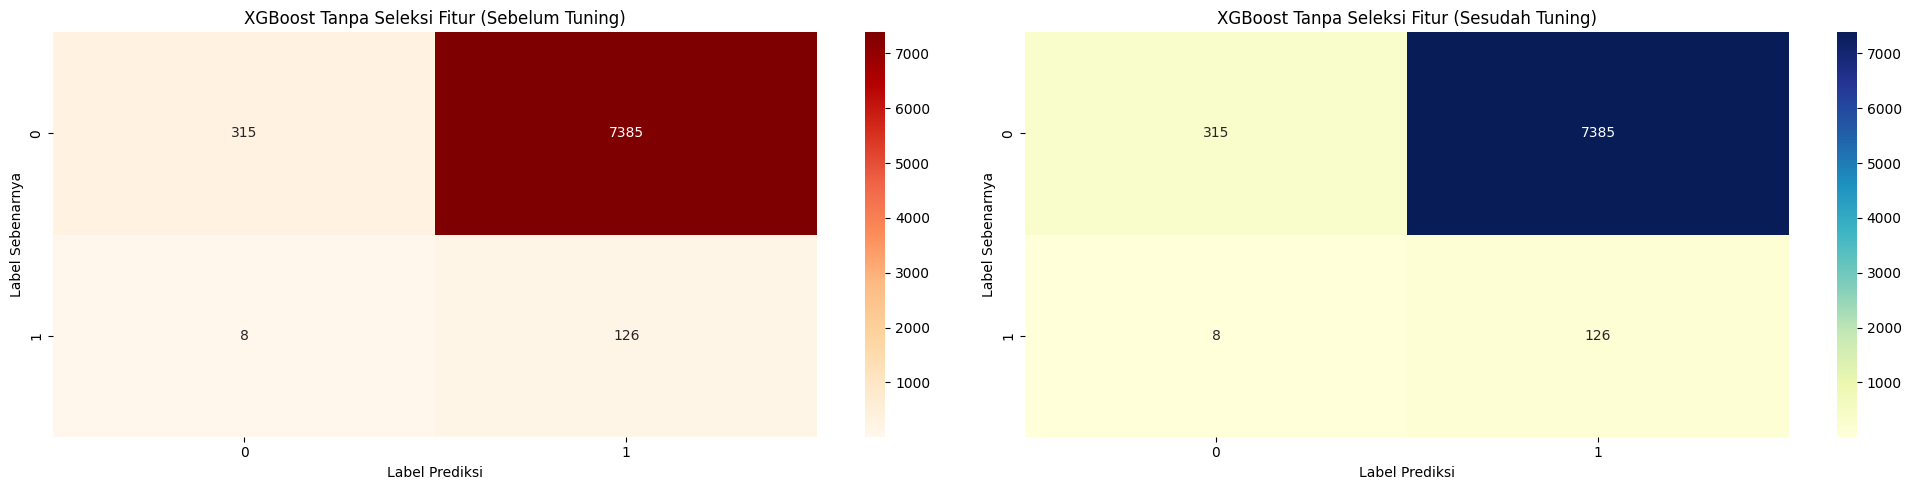

In [167]:
plt.figure(figsize=(20, 5))

# Confusion matrix sebelum tuning
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_test),
            annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('XGBoost Tanpa Seleksi Fitur (Sebelum Tuning)')

# Confusion matrix setelah tuning
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_test),
            annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('XGBoost Tanpa Seleksi Fitur (Sesudah Tuning)')

plt.tight_layout()
plt.show()


***
**Ringkasan Perbandingan Confusion Matrix**
***

**Sebelum Tuning:**
- **True Negatives (TN): 829**
- **True Positives (TP): 108**
- **False Positives (FP): 6871**
- **False Negatives (FN): 26**

**Setelah Tuning:**
- **True Negatives (TN): 315**
- **True Positives (TP): 126**
- **False Positives (FP): 7385**
- **False Negatives (FN): 8**

**Analisis :**

- **True Positives**: meningkat dari 108 menjadi 126, menunjukkan kemampuan model yang lebih baik dalam mengidentifikasi kasus klaim dengan benar setelah tuning.
- **False Negatives**: turun dari 26 menjadi 8, artinya kasus klaim yang terlewat semakin sedikit, sesuai dengan tujuan untuk meminimalkan false negatives.
- **True Negatives**: menurun dari 829 menjadi 315, menunjukkan adanya trade-off karena model menjadi lebih agresif dalam memprediksi potensi klaim.
- **False Positives**: naik dari 6.871 menjadi 7.385, artinya lebih banyak kasus non-klaim yang salah diklasifikasikan sebagai klaim.

**Dampak Data yang Tidak Seimbang :**

- Jumlah false positives yang tinggi dan penurunan true negatives sebagian besar disebabkan oleh ketidakseimbangan kelas yang parah pada dataset.
- Pada dataset yang sangat tidak seimbang, di mana jumlah kasus non-klaim jauh lebih besar dibanding klaim, model cenderung lebih sering memprediksi kelas mayoritas.
- Setelah tuning dengan fokus pada peningkatan recall, model menjadi lebih sensitif terhadap klaim, sehingga meningkatkan kemungkinan terjadinya false positives.
- Fenomena ini mencerminkan tantangan klasik dalam imbalanced classification: mengoptimalkan satu metrik (misalnya recall) sering kali mengorbankan metrik lain (misalnya precision).

****
# **Model Final dan Interpretasi Model**
****

 ## **Model Final**

**Model Final : XGBoost Classifier tanpa Seleksi Fitur Setelah Hyperparameter Tuning**

**Gambaran Model :**
- **Tipe Model :** XGBoost Classifier (XGBClassifier)
- **Seleksi Fitur :** Not applied
- **Teknik Optimasi :** Hyperparameter tuning

**XGBoost** adalah metode ensemble learning yang menggabungkan banyak pohon keputusan (decision tree) untuk meningkatkan akurasi prediksi. Prosesnya membangun pohon secara berurutan, di mana setiap pohon baru berusaha memperbaiki kesalahan dari pohon sebelumnya. Teknik boosting ini membuat model belajar dari kesalahan sebelumnya sehingga hasil prediksi menjadi semakin akurat.

Model ini menggunakan 100 pohon (trees) dengan kedalaman maksimum (max_depth) sebesar 3 untuk menjaga keseimbangan antara kompleksitas dan kinerja. Learning rate sebesar 0.05 digunakan agar proses pembelajaran berlangsung bertahap dan meminimalkan risiko overfitting.

Selain itu, model hanya menggunakan 60% dari total fitur (colsample_bytree = 0.6) dan 100% data (subsample = 1.0) pada setiap pohon untuk meningkatkan ketahanan model dan mencegah overfitting. Untuk mengatasi ketidakseimbangan data antara kelas klaim dan non-klaim, digunakan pengaturan bobot kelas (scale_pos_weight) yang tepat, sehingga model lebih fokus pada prediksi klaim.

Model ini memiliki skor recall yang tinggi, artinya mampu mengenali sebagian besar kasus klaim yang sebenarnya terjadi. Fokus tuning diarahkan untuk meminimalkan false negative (kasus klaim yang terlewat), sehingga kemungkinan besar klaim yang sebenarnya akan teridentifikasi. Namun, fokus ini juga dapat meningkatkan jumlah false positive (kasus non-klaim yang salah diprediksi sebagai klaim), yang merupakan konsekuensi dari peningkatan sensitivitas model.

In [168]:
# Menetapkan model final sebagai model XGBoost terbaik hasil tuning
final_model = best_tuning_xgb_wofs

In [169]:
final_model[-1]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

 ## **Interpretasi Model**

Untuk memahami model akhir dan cara kerjanya dalam membuat prediksi, dilakukan analisis melalui :

1. **Confusion Matrix**: Menunjukkan kinerja model dengan memetakan jumlah prediksi benar positif (true positives), benar negatif (true negatives), salah positif (false positives), dan salah negatif (false negatives)
2. **Feature Importance**: Mengidentifikasi fitur-fitur yang paling berpengaruh terhadap keputusan model, sehingga kita dapat mengetahui faktor utama yang mendorong hasil prediksi.
3. **Explainable AI with LIME**: Memberikan penjelasan terperinci untuk setiap prediksi individu, sehingga perilaku model lebih transparan dan mudah dipahami.

Pendekatan ini membantu mengevaluasi akurasi, keandalan, serta tingkat keterjelasan model dalam proses pengambilan keputusan.

> ### **Confusion Matrix**

In [170]:
# Menampilkan laporan klasifikasi pada data uji
# Laporan ini mencakup metrik seperti precision, recall, f1-score, dan support
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.04      0.08      7700
           1       0.02      0.94      0.03       134

    accuracy                           0.06      7834
   macro avg       0.50      0.49      0.06      7834
weighted avg       0.96      0.06      0.08      7834



Text(0.5, 1.0, 'Confusion Matrix - XGBoost Tanpa Feature Selection (Setelah Tuning)')

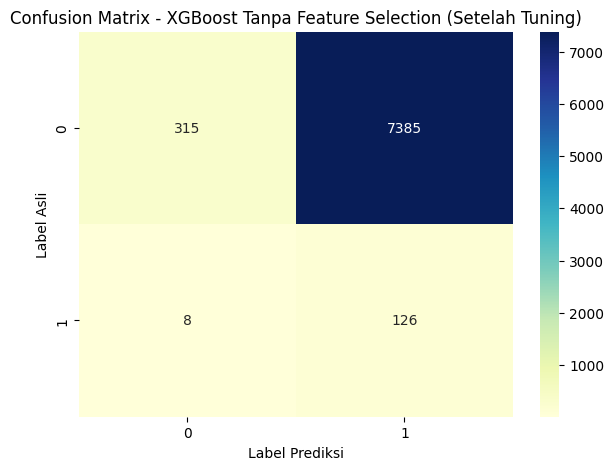

In [171]:
# Membuat visualisasi Confusion Matrix untuk model XGBoost tanpa feature selection setelah tuning
plt.figure(figsize=(7,5))

# Menggunakan heatmap untuk menampilkan nilai TN, FP, FN, TP secara visual
# fmt='.0f' agar angka ditampilkan sebagai bilangan bulat tanpa desimal
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f', cmap='YlGnBu')

# Menambahkan label sumbu X dan Y
plt.xlabel('Label Prediksi')
plt.ylabel('Label Asli')

# Judul grafik
plt.title('Confusion Matrix - XGBoost Tanpa Feature Selection (Setelah Tuning)')

***
**Hasil Confusion Matrix**
***

- **True Negatives (TN)**: 315
- **True Positives (TP)**: 126
- **False Positives (FP)**: 7385
- **False Negatives (FN)**: 8

**Interpretasi :**
- Model berhasil memprediksi 126 kasus klaim dengan benar dan hanya melewatkan 8 kasus klaim.
- Terdapat 7.385 kasus non-klaim yang salah diprediksi sebagai klaim.
- Tingginya jumlah false positives menunjukkan model cenderung memprediksi klaim, yang menjadi tantangan utama ketika menghadapi ketidakseimbangan kelas yang besar dalam dataset.

> ### **Feature Importance menggunakan Permutation Importance**

In [172]:
from sklearn.inspection import permutation_importance

In [173]:
# Melatih model final menggunakan data latih
final_model.fit(X_train, y_train)

c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotenc',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binenc', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('balance', NearMiss()),
                ('algorithm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [174]:
# Menghitung tingkat kepentingan fitur menggunakan metode Permutation Importance

hasil_importansi = permutation_importance(
    final_model,        # model akhir yang sudah dilatih
    X_test,             # data uji
    y_test,             # label data uji
    n_repeats=10,       # jumlah pengulangan
    random_state=42     # seed agar hasil replikasi konsisten
)


In [175]:
# Membuat DataFrame untuk menyimpan hasil pengukuran tingkat kepentingan fitur

df_importansi = pd.DataFrame({
    'Fitur': X.columns,                                     # nama kolom fitur
    'Rata-rata Importance': hasil_importansi.importances_mean,  # nilai rata-rata
    'Standar Deviasi': hasil_importansi.importances_std         # nilai standar deviasi
})

# Mengurutkan berdasarkan rata-rata importance tertinggi
df_importansi = df_importansi.sort_values(by='Rata-rata Importance', ascending=False)

df_importansi


Fitur  Rata-rata Importance  Standar Deviasi
8  Commision (in value)              0.012420         0.001094
0                Agency              0.010148         0.001079
7             Net Sales              0.006842         0.001382
3          Product Name              0.005131         0.001005
5              Duration              0.003651         0.001205
4                Gender              0.000357         0.000395
9                   Age              0.000140         0.001269
1           Agency Type              0.000000         0.000000
2  Distribution Channel              0.000000         0.000000
6           Destination             -0.002144         0.001156

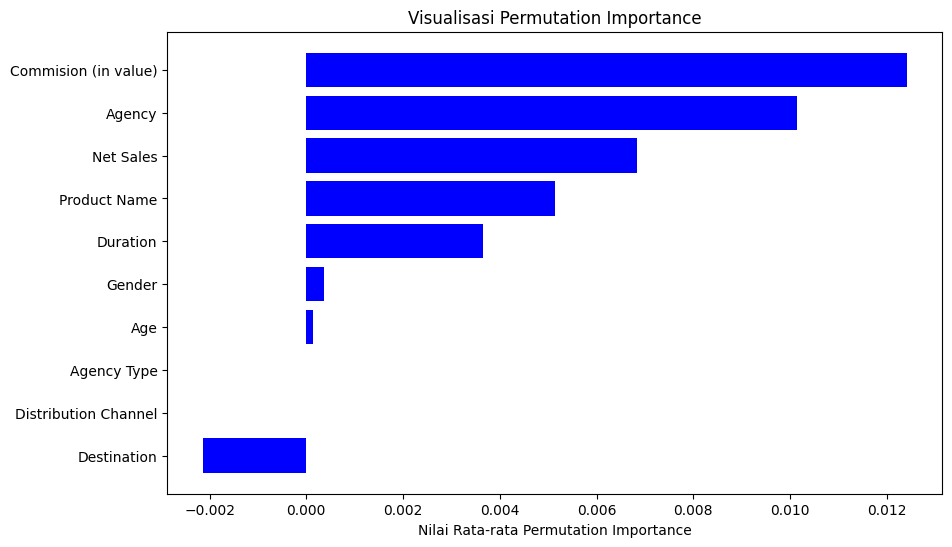

In [176]:
# Visualisasi tingkat kepentingan fitur menggunakan Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(df_importansi['Fitur'], df_importansi['Rata-rata Importance'], color='blue')  # batang horizontal
plt.xlabel('Nilai Rata-rata Permutation Importance')  # label sumbu X
plt.title('Visualisasi Permutation Importance')       # judul grafik
plt.gca().invert_yaxis()  # membalik urutan sumbu Y agar fitur terpenting di atas
plt.show()

***
**Hasil Permutation Importance**
***

1. **Most Influential Features**:
   - **Commission (in value)** dan **Agency** memiliki skor rata-rata kepentingan tertinggi, menunjukkan peran utama dalam memprediksi kemungkinan nasabah mengajukan klaim.

2. **Less Important Features**:
   - **Net Sales**, **Product Name**, dan **Duration** tetap memberikan kontribusi, meski tidak sekuat dua fitur teratas.

3. **Low or Negative Impact**:
   - **Agency Type** dan **Distribution Channel** tidak memberikan pengaruh berarti pada prediksi model, sehingga berpotensi dihapus tanpa menurunkan kinerja.
   - **Destination** justru memiliki skor negatif, mengindikasikan bahwa keberadaannya bisa menurunkan performa model.

> ### **Explainable AI (LIME)**

In [177]:
from lime import lime_tabular

In [178]:
# Mengambil semua nama fitur setelah proses transformasi (misalnya dari OneHotEncoder, Scaler, dll.)
features = list(transformer.get_feature_names_out())

# Membuat list kosong untuk menyimpan nama fitur yang sudah dibersihkan
list_feature_names = []

# Memproses setiap nama fitur untuk menghapus bagian prefix (misalnya nama tahap pipeline)
for feature in features:
    # Memisahkan nama fitur berdasarkan tanda "_" lalu mengambil bagian setelah indeks ke-2
    list_feature_names.append('_'.join(feature.split('_')[2:]))

# Menampilkan jumlah fitur dan daftar nama fiturnya
display(f"Jumlah fitur: {len(list_feature_names)}", list_feature_names)

'Jumlah fitur: 25'

['Agency Type_Travel Agency',
 'Distribution Channel_Online',
 'Gender_M',
 'Gender_Prefer Not to Say',
 'Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7',
 'Duration',
 'Net Sales',
 'Commision (in value)',
 'Age']

In [179]:
# Mengubah X_test menjadi bentuk hasil preprocessing
# final_model[0] mengacu pada tahap preprocessing di pipeline final_model
X_test_preprocessed = pd.DataFrame(
    final_model[0].transform(X_test)  # Transformasi data uji sesuai tahap preprocessing
)

# Mengganti nama kolom hasil transformasi dengan list_feature_names yang sudah dibersihkan
X_test_preprocessed.columns = list_feature_names

# Menampilkan data uji yang sudah diproses
X_test_preprocessed


Agency Type_Travel Agency  Distribution Channel_Online  Gender_M  \
0                           0.0                          1.0       0.0   
1                           1.0                          1.0       0.0   
2                           0.0                          1.0       0.0   
3                           0.0                          1.0       1.0   
4                           1.0                          1.0       0.0   
...                         ...                          ...       ...   
7829                        1.0                          1.0       0.0   
7830                        1.0                          1.0       0.0   
7831                        0.0                          1.0       0.0   
7832                        0.0                          1.0       1.0   
7833                        0.0                          1.0       0.0   

      Gender_Prefer Not to Say  Agency_0  Agency_1  Agency_2  Agency_3  \
0                          0.0       0.0       1.0       0.0       0.0   
1                          1.0       0.0       0.0       1.0       0.0   
2                          0.0       0.0       1.0       0.0       0.0   
3                          0.0       0.0       0.0       1.0       1.0   
4                          1.0       0.0       0.0       1.0       0.0   
...                        ...       ...       ...       ...       ...   
7829                       1.0       0.0       0.0       1.0       0.0   
7830                       1.0       0.0       0.0       1.0       0.0   
7831                       0.0       0.0       1.0       0.0       0.0   
7832                       0.0       0.0       1.0       0.0       0.0   
7833                       0.0       0.0       1.0       0.0       0.0   

      Product Name_0  Product Name_1  ...  Destination_2  Destination_3  \
0                0.0             0.0  ...            0.0            0.0   
1                0.0             1.0  ...            0.0            0.0   
2                0.0             1.0  ...            0.0            0.0   
3                0.0             0.0  ...            0.0            0.0   
4                0.0             1.0  ...            0.0            1.0   
...              ...             ...  ...            ...            ...   
7829             0.0             0.0  ...            0.0            1.0   
7830             0.0             0.0  ...            0.0            0.0   
7831             0.0             0.0  ...            0.0            0.0   
7832             0.0             1.0  ...            0.0            0.0   
7833             0.0             1.0  ...            0.0            0.0   

      Destination_4  Destination_5  Destination_6  Destination_7  Duration  \
0               0.0            0.0            0.0            1.0     374.0   
1               1.0            1.0            1.0            0.0       3.0   
2               0.0            0.0            0.0            1.0      44.0   
3               1.0            1.0            1.0            1.0      36.0   
4               1.0            0.0            0.0            0.0      45.0   
...             ...            ...            ...            ...       ...   
7829            1.0            0.0            1.0            0.0      21.0   
7830            0.0            0.0            0.0            1.0      88.0   
7831            0.0            0.0            0.0            1.0      76.0   
7832            0.0            0.0            0.0            1.0      48.0   
7833            0.0            0.0            0.0            1.0       8.0   

      Net Sales  Commision (in value)   Age  
0         216.0                 54.00  30.0  
1          20.0                  0.00  36.0  
2          39.0                  9.75  50.0  
3          35.0                 12.25  48.0  
4          20.0                  0.00  36.0  
...         ...                   ...   ...  
7829       80.0                  0.00  36.0  
7830       86.0       

In [180]:
# Membuat objek LIME Tabular Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data = final_model[0].transform(X_train),  # Data latih yang sudah diproses (preprocessed)
    feature_names = list_feature_names,                 # Nama fitur yang sudah dibersihkan
    class_names = ['Not Claim', 'Claim'],                # Label kelas untuk interpretasi
    mode = 'classification'                              # Mode klasifikasi
)

explainer

****
### **True Positive Case (Predicted as Claim and is Actually Claim)**
****

In [189]:
i = 91

# Prediksi vs aktual
print(f"The PREDICTED claim status of this policyholder is: {('CLAIM' if y_pred_test[i] == 1 else 'DID NOT CLAIM')} --> from Y_pred\n")
print(f"The ACTUAL claim status of this policyholder is: {('CLAIM' if y_test.iloc[i] == 1 else 'DID NOT CLAIM')} --> from y_test\n")

# Buat penjelasan LIME
exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    final_model['algorithm'].predict_proba,
)

# Simpan ke HTML
filename = f"lime_explanation_{i}.html"
with open(filename, "w", encoding="utf-8") as f:
    f.write(exp.as_html())

print(f"✅ File '{filename}' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.")

The PREDICTED claim status of this policyholder is: CLAIM --> from Y_pred

The ACTUAL claim status of this policyholder is: CLAIM --> from y_test

✅ File 'lime_explanation_91.html' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.


c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [190]:
from IPython.display import display, HTML

display(HTML(exp.as_html()))

***
**Kasus True Positive**
***

- **Prediction**: Model memperkirakan pemegang polis akan mengajukan **claim**.
- **Actual**: Pemegang polis memang mengajukan **claim**.
- **Fitur Kunci :**
  - **Net Sales**: Nilai tinggi (63.00) sangat mendorong prediksi ke arah klaim.
  - **Duration**: Durasi panjang (147.00) turut memberi kontribusi kuat.
  - **Commission (in value)**: Berdampak positif terhadap peluang klaim.
  - **Product Name, Agency, Age**: Pengaruhnya lebih kecil, tetapi tetap relevan.

****
### **False Positive Case (Predicted as Claim but Actually Did Not Claim)**
****

In [192]:
i = 90

# Prediksi vs aktual
print(f"The PREDICTED claim status of this policyholder is: {('CLAIM' if y_pred_test[i] == 1 else 'DID NOT CLAIM')} --> from Y_pred\n")
print(f"The ACTUAL claim status of this policyholder is: {('CLAIM' if y_test.iloc[i] == 1 else 'DID NOT CLAIM')} --> from y_test\n")

# Buat penjelasan LIME
exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    final_model['algorithm'].predict_proba,
)

# Simpan hasil LIME ke HTML
filename = f"lime_explanation_{i}.html"
with open(filename, "w", encoding="utf-8") as f:
    f.write(exp.as_html())

print(f"✅ File '{filename}' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.")

The PREDICTED claim status of this policyholder is: CLAIM --> from Y_pred

The ACTUAL claim status of this policyholder is: DID NOT CLAIM --> from y_test

✅ File 'lime_explanation_90.html' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.


c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [193]:
from IPython.display import display, HTML

display(HTML(exp.as_html()))

***
**Kasus False Positive**
***
- **Prediction**: Model memperkirakan pemegang polis akan mengajukan **claim**.
- **Actual**: Pemegang polis ternyata tidak mengajukan **not claim**.
- **Key Features**:
  - **Duration**: Sangat pendek (3.00) menjadi faktor kuat yang mendorong prediksi klaim.
  - **Age**: Nilai di sekitar ambang (36.00) ikut mempengaruhi keputusan model.
  - **Destination, Product Name, Commission**: Memberi pengaruh campuran sehingga berkontribusi pada prediksi yang keliru.

****
### **True Negative Case (Predicted as Did Not Claim and is Actually Did Not Claim)**
****

In [195]:
# Menentukan indeks sampel yang akan dijelaskan
i = 448

# Menampilkan status klaim: prediksi vs aktual
print(f"The PREDICTED claim status of this policyholder is: {('CLAIM' if y_pred_test[i] == 1 else 'DID NOT CLAIM')} --> from Y_pred\n")
print(f"The ACTUAL claim status of this policyholder is: {('CLAIM' if y_test.iloc[i] == 1 else 'DID NOT CLAIM')} --> from y_test\n")

# Membuat penjelasan LIME untuk instance ke-i
exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    final_model['algorithm'].predict_proba,
)

# Simpan hasil LIME ke file HTML (menghindari error show_in_notebook)
filename = f"lime_explanation_{i}.html"
with open(filename, "w", encoding="utf-8") as f:
    f.write(exp.as_html())

print(f"✅ File '{filename}' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.")

The PREDICTED claim status of this policyholder is: DID NOT CLAIM --> from Y_pred

The ACTUAL claim status of this policyholder is: DID NOT CLAIM --> from y_test

✅ File 'lime_explanation_448.html' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.


c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [196]:
from IPython.display import display, HTML

display(HTML(exp.as_html()))

***
**Kasus True Negative**
***
- **Prediction**: Model memperkirakan pemegang polis **not claim**.
- **Actual**: Pemegang polis memang **not claim**.
- **Key Features**:
  - **Destination**: Nilai rendah (0.00) memperkuat prediksi tanpa klaim.
  - **Net Sales**: Nilai rendah (13.50) turut mendukung keputusan model.
  - **Age and Duration**: Dampaknya kecil, namun konsisten mengonfirmasi tidak ada klaim.

****
### **False Negative Case (Predicted as Did Not Claim but Actually Claim)**
****

In [197]:
# Tentukan indeks data yang akan dianalisis
i = 1297

# Tampilkan status prediksi vs aktual
print(f"The PREDICTED claim status of this policyholder is: {('CLAIM' if y_pred_test[i] == 1 else 'DID NOT CLAIM')} --> from Y_pred\n")
print(f"The ACTUAL claim status of this policyholder is: {('CLAIM' if y_test.iloc[i] == 1 else 'DID NOT CLAIM')} --> from y_test\n")

# Buat penjelasan LIME untuk sampel ke-i
exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    final_model['algorithm'].predict_proba,
)

# Simpan penjelasan LIME ke file HTML agar bisa dibuka di browser
html_exp = exp.as_html()
filename = f"lime_explanation_{i}.html"

with open(filename, "w", encoding="utf-8") as f:
    f.write(html_exp)

print(f"✅ File '{filename}' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.")

The PREDICTED claim status of this policyholder is: DID NOT CLAIM --> from Y_pred

The ACTUAL claim status of this policyholder is: CLAIM --> from y_test

✅ File 'lime_explanation_1297.html' sudah dibuat. Silakan buka di browser untuk melihat hasilnya.


c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [198]:
from IPython.display import display, HTML

display(HTML(exp.as_html()))

***
**Kasus False Negative**
***
- **Prediction**: Model memperkirakan pemegang polis **not claim**.
- **Actual**: Pemegang polis ternyata **claim**.
- **Key Features**:
  - **Duration**: Nilai rendah (5.00) membuat klaim terlewat.
  - **Net Sales**: Nilai sedang (21.00) ikut mendorong prediksi yang keliru.
  - **Destination and Agency**: Berkontribusi pada salah prediksi.

****
# **Save Model**
****

In [199]:
import pickle

In [200]:
# Menetapkan model final sebagai model XGBoost terbaik hasil tuning
final_model = best_tuning_xgb_wofs

# Melatih model final pada data latih
final_model.fit(X_train, y_train)

# Menyimpan model terlatih ke file .sav menggunakan pickle
pickle.dump(final_model, open('TravelInsurance_XGBoost_Model.sav','wb'))


Setelah melakukan optimasi XGBoost melalui penyesuaian hyperparameter, model hasil pelatihan disimpan agar dapat digunakan kembali untuk prediksi klaim asuransi perjalanan tanpa perlu dilatih ulang. Model ini diserialisasi ke dalam file sehingga siap untuk tahap deployment atau analisis lanjutan.

****
# **Prediksi Model dengan Data Baru**
****

Pada bagian ini, model akhir yang telah dilatih akan digunakan untuk memprediksi hasil pada data baru. Pengujian akan dilakukan menggunakan nilai ekstrem untuk melihat rentang prediksi model. Langkah ini membantu mengidentifikasi kasus dengan kemungkinan klaim tertinggi (prediksi = 1) dan terendah (prediksi = 0), sekaligus memastikan konsistensi dan keandalan prediksi model di berbagai skenario.

In [201]:
# Menentukan nama file model yang sudah disimpan
filename = 'TravelInsurance_XGBoost_Model.sav'

# Memuat kembali model XGBoost dari file .sav menggunakan pickle
loaded_model = pickle.load(open(filename, 'rb'))


In [202]:
loaded_model

c:\Users\user\anaconda3\envs\jcds0612\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotenc',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binenc', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('balance', NearMiss()),
                ('algorithm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [203]:
# Membuat data baru untuk dua pemegang polis (policyholder) dengan berbagai fitur
new_policyholder1 = pd.DataFrame({
    'Agency': ['C2B'],                         # Kode agen
    'Agency Type': ['Airlines'],                # Jenis agen
    'Distribution Channel': ['Online'],         # Kanal distribusi
    'Product Name': ['Basic Plan'],             # Nama produk
    'Gender': ['F'],                            # Jenis kelamin
    'Duration': [180],                          # Lama periode asuransi (hari)
    'Destination': ['Thailand'],                # Tujuan perjalanan
    'Net Sales': [165.00],                      # Nilai penjualan bersih
    'Commision (in value)': [33.00],            # Komisi dalam nilai mata uang
    'Age': [80]                                 # Usia pemegang polis
})

new_policyholder2 = pd.DataFrame({
    'Agency': ['EPX'],
    'Agency Type': ['Travel Agency'],
    'Distribution Channel': ['Offline'],
    'Product Name': ['Cancellation Plan'],
    'Gender': ['M'],
    'Duration': [7],
    'Destination': ['Indonesia'],
    'Net Sales': [14.00],
    'Commision (in value)': [3.00],
    'Age': [30]
})

# Menggabungkan kedua data pemegang polis menjadi satu DataFrame
new_data = pd.concat([new_policyholder1, new_policyholder2], ignore_index=True)

# Menampilkan data baru
new_data


Agency    Agency Type Distribution Channel       Product Name Gender  \
0    C2B       Airlines               Online         Basic Plan      F   
1    EPX  Travel Agency              Offline  Cancellation Plan      M   

   Duration Destination  Net Sales  Commision (in value)  Age  
0       180    Thailand      165.0                  33.0   80  
1         7   Indonesia       14.0                   3.0   30

***
**Penjelasan Data Baru :**
***

1. **Baris 1 :**
   - **Features:** Agen C2B, maskapai, pemesanan online, Basic Plan, perempuan, durasi panjang (180 hari), premi tinggi (US$165), usia 80 tahun.
   - **Prediksi intuitif :** Kemungkinan besar klaim (1).
   - **Alasan :**
     - Agen C2B cenderung memiliki tingkat klaim lebih tinggi.
     - Maskapai dan paket Basic Plan umumnya berisiko lebih tinggi.
     - Durasi panjang dan usia lanjut meningkatkan peluang klaim.
     - Premi tinggi menandakan cakupan luas sehingga potensi klaim juga lebih besar.

2. **Baris 2 :**
   - **Features:** Agen EPX, biro perjalanan, pemesanan offline, Cancellation Plan, laki-laki, durasi pendek (7 hari), premi rendah (US$14), usia 30 tahun.
   - **Prediksi intuitif :** Kemungkinan besar tidak klaim (0). 
   - **Alasan :**
     - EPX memiliki banyak nasabah tetapi tingkat klaim relatif lebih rendah.
     - Cancellation Plan umumnya cakupannya terbatas.
     - Durasi singkat, usia muda, dan premi rendah mengurangi potensi klaim.

**Perbandingan Premi (mengacu pada artikel referensi) :**
- **Cancellation Plan :** ±US$14 (cakupan terbatas, perjalanan ASEAN ±1 minggu).
- **Basic Plan :** ±US$165 (cakupan lebih luas, perjalanan ASEAN ±6 bulan).

In [204]:
# Menambahkan kolom hasil prediksi klaim untuk data baru
# Model yang sudah dilatih (loaded_model) digunakan untuk memprediksi klaim (0 = Tidak Klaim, 1 = Klaim)
new_data["Claim_Prediction"] = loaded_model.predict(new_data)

# Menampilkan dataframe yang sudah dilengkapi kolom prediksi
new_data


Agency    Agency Type Distribution Channel       Product Name Gender  \
0    C2B       Airlines               Online         Basic Plan      F   
1    EPX  Travel Agency              Offline  Cancellation Plan      M   

   Duration Destination  Net Sales  Commision (in value)  Age  \
0       180    Thailand      165.0                  33.0   80   
1         7   Indonesia       14.0                   3.0   30   

   Claim_Prediction  
0                 1  
1                 0

Prediksi model sesuai dengan perkiraan kita :
- Baris pertama diprediksi akan klaim (1), sejalan dengan faktor risiko tinggi seperti agensi C2B, paket basic plan, durasi panjang, premi tinggi, dan usia lanjut.
- Baris kedua diprediksi tidak klaim (0), sejalan dengan indikator risiko rendah seperti agensi EPX, paket cancellation plan, durasi pendek, premi rendah, dan usia muda.

Hasil ini menunjukkan bahwa model mampu membedakan probabilitas klaim tinggi dan rendah secara efektif berdasarkan fitur yang diberikan.

****
# **Model Limitation**
****

Dalam mengembangkan model prediksi klaim asuransi perjalanan, tujuan utama adalah mengidentifikasi pemegang polis yang berpotensi mengajukan klaim secara akurat. Model berbasis algoritma XGBoost ini berhasil meminimalkan false negative, namun masih menghasilkan tingkat false positive yang cukup tinggi. Hal ini menunjukkan adanya keterbatasan pada model dan dataset yang perlu diperbaiki agar performa dan reliabilitasnya meningkat. Berikut ringkasan keterbatasan dan saran pengembangannya :

1. Tingkat false positive tinggi : meski false negative berhasil ditekan, tingginya false positive mengindikasikan adanya masalah kualitas atau ketidakseimbangan data (imbalanced dataset), yang mengurangi kemampuan model untuk generalize.

2. Kebutuhan data tambahan : diperlukan data lebih banyak, khususnya dari pemegang polis yang benar-benar mengajukan klaim, untuk menyeimbangkan dataset. Dataset yang lebih seimbang akan membantu model belajar lebih efektif dan mengurangi false positive maupun false negative.

3. Fitur yang terbatas : fitur yang digunakan saat ini mungkin belum mampu menangkap seluruh faktor yang memengaruhi status klaim. Menambahkan fitur relevan yang lebih menggambarkan profil risiko pemegang polis dapat meningkatkan akurasi model.

4. Keterbatasan rentang prediksi model hanya valid untuk prediksi dalam rentang fitur berikut:
    - Usia: 0–88 tahun
    - Net Sales: -357,5 hingga 682,0 dolar
    - Durasi: 0–540 hari
    - Komisi: 0,0 hingga 262,76 dolar
    
    Prediksi pada data di luar rentang ini berpotensi tidak akurat.

5. Evaluasi algoritma dan hyperparameter : model akhir mungkin belum optimal. Perlu dilakukan evaluasi ulang dengan mencoba algoritma klasifikasi lain serta variasi hyperparameter yang lebih luas. Jika hasil tetap tidak meningkat, pengayaan dataset dengan fitur tambahan terkait status klaim menjadi langkah penting.

Kesimpulannya, kualitas model sangat bergantung pada kualitas data yang digunakan. Pengembangan ke depan sebaiknya difokuskan pada perbaikan dataset dan pemilihan fitur yang tepat, disertai eksplorasi metode model yang lebih optimal.

****
# **Cost Evaluation**
****

Fokus utama analisis ini adalah pada pemegang polis yang mengajukan klaim, karena klaim merupakan sumber utama risiko finansial bagi perusahaan asuransi perjalanan. Pendapatan dari pemegang polis yang tidak mengajukan klaim (98,29% dari data) cenderung stabil dan dapat diprediksi, sehingga risikonya relatif kecil. Sebaliknya, persentase kecil pemegang polis yang mengajukan klaim (1,71%) dapat menimbulkan kerugian finansial yang signifikan.

Oleh karena itu, kemampuan memprediksi klaim secara akurat sangat penting. Hal ini memungkinkan perusahaan asuransi mengalokasikan sumber daya dengan tepat dan meminimalkan potensi kerugian akibat klaim yang tidak terduga. Prediksi yang akurat membantu perusahaan mengantisipasi dan mempersiapkan dana untuk pembayaran klaim, sehingga dapat mengurangi dampak finansial dari kejadian tak terduga.

> ### **Evaluasi Biaya Tanpa Model Prediksi**

- **Total data uji**: 7.834 pemegang polis (berdasarkan data dari classification report)
- **Jumlah klaim** (1): 134 pemegang polis

**1. Pendapatan Premi dari Pemegang Polis yang Mengajukan Klaim**:
- 134 policyholders x $524 = $70,216

**2. Biaya Pembayaran Klaim**:
- 134 policyholders x $147,542 = $19,770,628

**3. Potensi Kerugian Finansial Total**:
- $19,770,628 - $70,216 = **$19,700,412**

Tanpa model prediksi, diasumsikan seluruh 134 pemegang polis yang benar-benar mengajukan klaim tidak dapat diantisipasi, sehingga perusahaan berpotensi mengalami kerugian finansial sebesar **$19.700.412**.

> ### **Evaluasi Biaya Dengan Model Prediksi**

- **True Positives (TP)** Diprediksi Claim dan benar-benar Claim: 126 pemegang polis
- **False Negatives (FN)** Diprediksi Not Claim tetapi sebenarnya Claim: 8 pemegang polis

**1. Penghematan Finansial dari True Positives (TP)**:
- Pendapatan premi TP: 126 × $524 = **$66.024**
- Biaya klaim TP: 126 × $147.542 = **$18.590.292**
- Penghematan finansial dari TP: $18.590.292 − $66.024 = **$18.524.268**

**2. Kerugian Finansial dari False Negatives (FN)**:
- Pendapatan premi FN: 8 × $524 = **$4.192**
- Biaya klaim FN: 8 × $147.542 = **$1.180.336**
- Kerugian finansial dari FN: $1.180.336 − $4.192 = **$1.176.144**

> ### **Ringkasan Penghematan Finansial**

Dengan menggunakan model prediksi :
- Penghematan dari TP: **$18.524.268**
- Kerugian dari FN: **$1.176.144**

**Penghematan Finansial Bersih**:
- $19.700.412 − $1.176.144 = **$18.524.268**

**Persentase Potensi Kerugian yang Berhasil Dihindari**:
- Tanpa model (Total Potensi Kerugian) : **$19.700.412**
- Dengan model (Total Potensi Terselamatkan) : **$18,524,268**
- Persentase penghematan : ($18,524,268 / $19,700,412) x 100 % = **94 %**

Hasil ini menunjukkan bahwa model prediksi mampu mengurangi sekitar 94% potensi kerugian finansial yang mungkin terjadi jika perusahaan tidak menggunakan model tersebut.

> ### **Penjelasan Hasil**

1. **True Positives (TP)**: Merupakan pemegang polis yang diprediksi akan mengajukan klaim dan benar-benar mengajukan klaim. Keberhasilan model mengidentifikasi kelompok ini memungkinkan perusahaan menghindari kerugian besar, misalnya dengan tidak memberikan polis kepada mereka atau menetapkan premi lebih tinggi untuk menutup potensi biaya klaim.

2. **False Negatives (FN)**: Merupakan pemegang polis yang diprediksi tidak akan mengajukan klaim, tetapi kenyataannya mereka mengajukan klaim. Kesalahan prediksi ini menimbulkan kerugian karena perusahaan tidak mengambil langkah pencegahan, sehingga harus membayar klaim tak terduga.

3. **Dampak Finansial**:
   - **Tanpa Model**: Perusahaan menanggung seluruh risiko finansial dari semua pemegang polis yang mengajukan klaim, dengan potensi kerugian sebesar **$19.700.412**.
   - **Dengan Model**: Model prediksi mampu menghemat hingga *$18.524.268* atau sekitar 94% dari potensi kerugian. Sisanya 6% atau setara *$1.176.144* merupakan kerugian akibat klaim dari pemegang polis yang salah diprediksi (FN).

Evaluasi ini menunjukkan bahwa penggunaan model prediksi secara signifikan menurunkan kerugian finansial perusahaan asuransi perjalanan. Dengan mengidentifikasi pemegang polis berisiko tinggi secara lebih tepat, perusahaan dapat memfokuskan sumber daya untuk mengelola risiko klaim, menghasilkan penghematan besar dan meningkatkan stabilitas keuangan.

****
# **Conclusion**
****

**A. Kinerja Model Final**

XGBoost Classifier yang telah dioptimasi melalui hyperparameter tuning menunjukkan kinerja baik dalam mengidentifikasi pemegang polis yang berpotensi mengajukan klaim. Model memiliki recall tinggi sehingga mampu menangkap sebagian besar klaim aktual, meski berdampak pada meningkatnya false positive.

**B. Keterbatasan Model**

1. **Imbalanced Dataset**: Tingginya false positive dipengaruhi oleh ketimpangan data, di mana hanya 1,71% pemegang polis yang mengajukan klaim. Hal ini membuat model cenderung memprediksi klaim lebih sering.

2. **Feature Limitations**: Variabel yang digunakan saat ini belum cukup mewakili seluruh faktor yang mempengaruhi klaim. Penambahan fitur relevan dan data tambahan dapat meningkatkan akurasi sekaligus menekan false positive.

**C. Permasalahan & Solusi**

Perusahaan asuransi perjalanan menghadapi risiko finansial besar akibat sulitnya memprediksi pemegang polis yang akan mengajukan klaim. Meski hanya 1,71% yang mengajukan klaim, nilai klaim sangat tinggi sehingga diperlukan model prediksi yang andal.

**Dampak Model Prediktif**

**1. Tanpa Model**:
- **Potensi kerugian**: $19,700,412

**2. Dengan Model**:
- **Penghematan dari True Positive (TP)**:
  - Pendapatan premi : $66,024
  - Biaya klaim : $18,590,292
  - **Netto**: $18,524,268

- **Kerugian dari False Negative (FN)**:
  - Pendapatan premi: $4.192
  - Biaya klaim: $1.180.336
  - **Netto**: $1,176,144

- **Total Penghematan: $18.524.268 (~94% potensi kerugian dapat dihindari)**

The predictive model significantly mitigates financial losses by accurately identifying policyholders likely to file claims. This allows the company to avoid substantial payouts for claims by focusing resources on high-risk policyholders, saving approximately 94% of potential losses compared to not using the model.

**Model ini secara signifikan mengurangi kerugian dengan mengidentifikasi pemegang polis berisiko tinggi, sehingga perusahaan dapat mengambil langkah pencegahan atau penyesuaian premi.**

**D. Ringkasan**

Model ini efektif dalam memprediksi pemegang polis yang berpotensi klaim, menghasilkan penghematan besar dan meningkatkan manajemen risiko. Namun, perbaikan tetap diperlukan, khususnya dalam menyeimbangkan dataset dan menambah variabel pendukung agar akurasi meningkat dan false positive berkurang.

> ### **Rekomendasi untuk Model Prediktif**

1. **Mengatasi Ketidakseimbangan Data**
   - **Tantangan:** Tingginya false positive disebabkan proporsi data yang timpang, di mana hanya sebagian kecil pemegang polis yang mengajukan klaim.
   - **Rekomendasi:** Tambahkan fitur relevan seperti biaya premi, riwayat perjalanan, dan riwayat klaim untuk memberi konteks lebih dalam membedakan antara pemegang polis yang berisiko dan tidak.

2. **Enhance Feature Set:**
   - **Tantangan:** Fitur yang ada belum sepenuhnya mencerminkan faktor yang memengaruhi kemungkinan klaim.
   - **Rekomendasi:** 
     - Biaya Premi: Menggambarkan tingkat komitmen finansial pemegang polis.
     - Riwayat Perjalanan: Pola perjalanan yang berpotensi meningkatkan risiko klaim.
     - Riwayat Klaim: Data klaim sebelumnya untuk mendeteksi pola perilaku klaim.
     - Detail Demografis: Misalnya status pernikahan atau jenis pekerjaan.
     - Musiman: Tren klaim pada musim atau periode tertentu.

3. **Eksperimen Model & Hyperparameter Tuning**
   - **Tantangan:** Kinerja model masih bisa ditingkatkan.
   - **Rekomendasi:** Uji model lain seperti Random Forest, Gradient Boosting, atau deep learning, serta lakukan penyetelan parameter lebih luas untuk menemukan konfigurasi optimal.

4. **Menggunakan Teknik Resampling Lanjutan**
   - **Tantangan:** Metode resampling dasar seperti NearMiss mungkin belum optimal.
   - **Rekomendasi:**
     - SMOTEENN – Kombinasi SMOTE dan Edited Nearest Neighbors untuk membuat data seimbang sekaligus membersihkan noise.
     - SMOTETomek – Menggabungkan SMOTE dan Tomek links untuk menghasilkan data sintetis dan menghapus pasangan yang tumpang tindih.
     - ADASYN – Fokus pada pembuatan sampel sintetis untuk kasus yang sulit dipelajari.
     - Ensemble Methods – Gunakan EasyEnsemble atau BalancedRandomForest.
     - Cost-Sensitive Learning – Memasukkan bobot biaya kesalahan prediksi, khususnya false negative.

5. **Pemantauan & Pemeliharaan Model**
   - **Tantangan:** Kinerja model bisa menurun seiring masuknya data baru.
   - **Rekomendasi:** Lakukan retraining berkala dengan data terbaru dan pantau metrik kinerja untuk menjaga akurasi prediksi.

Dengan menerapkan langkah-langkah ini, model prediktif akan lebih mampu menangani data yang tidak seimbang dan meningkatkan ketepatan dalam memprediksi pemegang polis yang berpotensi mengajukan klaim.

> ### **Rekomendasi untuk Bisnis**

1. **Pemegang Polis Berisiko Tinggi**
   - **Ciri-ciri:** Durasi perjalanan panjang, nilai penjualan (net sales) tinggi, komisi besar, usia lebih tua, tipe agen maskapai, saluran distribusi online, pemegang polis perempuan, serta produk dengan manfaat komprehensif.

   - **Rekomendasi:**
     - Terapkan kebijakan underwriting yang lebih ketat.
     - Pertimbangkan premi lebih tinggi atau produk khusus untuk memitigasi risiko.
     - Tingkatkan pemantauan dan dukungan proses klaim.
     - Tinjau dan sesuaikan kebijakan secara berkala mengikuti perubahan profil risiko.
     - Berikan edukasi manajemen risiko kepada pemegang polis.
     - Sediakan opsi deductible agar risiko dibagi dengan pemegang polis.
     - Gunakan analitik prediktif untuk mendeteksi potensi klaim berisiko sejak dini.
     - Perkuat deteksi kecurangan (fraud detection) untuk segmen ini.

2. **Pemegang Polis Berisiko Rendah**
   - **Ciri-ciri:** Durasi perjalanan pendek, nilai penjualan dan komisi rendah, usia lebih muda, tipe agen perjalanan, saluran distribusi offline, pemegang polis laki-laki, serta produk dengan manfaat tunggal.

   - **Rekomendasi:**
     - Tawarkan insentif seperti diskon atau program loyalitas.
     - Permudah proses klaim untuk meningkatkan kepuasan.
     - Tambahkan manfaat atau opsi perlindungan ekstra untuk menarik dan mempertahankan pelanggan.
     - Terapkan strategi pemasaran personal untuk mendorong perpanjangan polis.
     - Kembangkan program penghargaan bagi pemegang polis tanpa klaim.
     - Tingkatkan interaksi digital lewat self-service dan aplikasi mobile.
     - Tawarkan paket asuransi gabungan (bundling) untuk meningkatkan nilai.
     - Lakukan survei kepuasan rutin untuk evaluasi layanan.

3. **Kinerja Bisnis Secara Umum**
   - **Rekomendasi:**
     - Terus tingkatkan model prediktif dengan integrasi data baru dan pembaruan rutin.
     - Sesuaikan strategi mengikuti tren dan pola di pasar asuransi perjalanan.
     - Bangun komunikasi transparan dengan pemegang polis terkait profil risiko dan manfaat produk yang disesuaikan untuk memperkuat kepercayaan dan loyalitas.

4. **Segmentasi Pemegang Polis**
   - **Ciri-ciri:** Segmentasi lebih detail berdasarkan profil dan riwayat klaim.
   
   - **Rekomendasi:**
     - Rancang kampanye pemasaran yang terarah untuk tiap segmen.
     - Tingkatkan keterlibatan pelanggan melalui komunikasi dan penawaran personal.
     - Optimalkan alokasi sumber daya untuk klaim dan deteksi kecurangan.
     - Kembangkan produk dan strategi harga yang disesuaikan dengan kebutuhan dan risiko masing-masing segmen.
     - Perbarui kriteria segmentasi secara rutin berdasarkan data dan tren terbaru.